In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
from colormap import cmap_builder
from matplotlib.collections import PatchCollection

from sklearn.mixture import GaussianMixture
from scipy.stats import spearmanr as scor
from sklearn.metrics import silhouette_score

from other_functions import *
sns.set_style('whitegrid')
%matplotlib inline

## Figure 1 and associated Supplementary Figures

Mean: [[ 0.99274416]
 [ 0.50973205]]
SD: [[[ 0.09944125]]

 [[ 0.28744076]]]


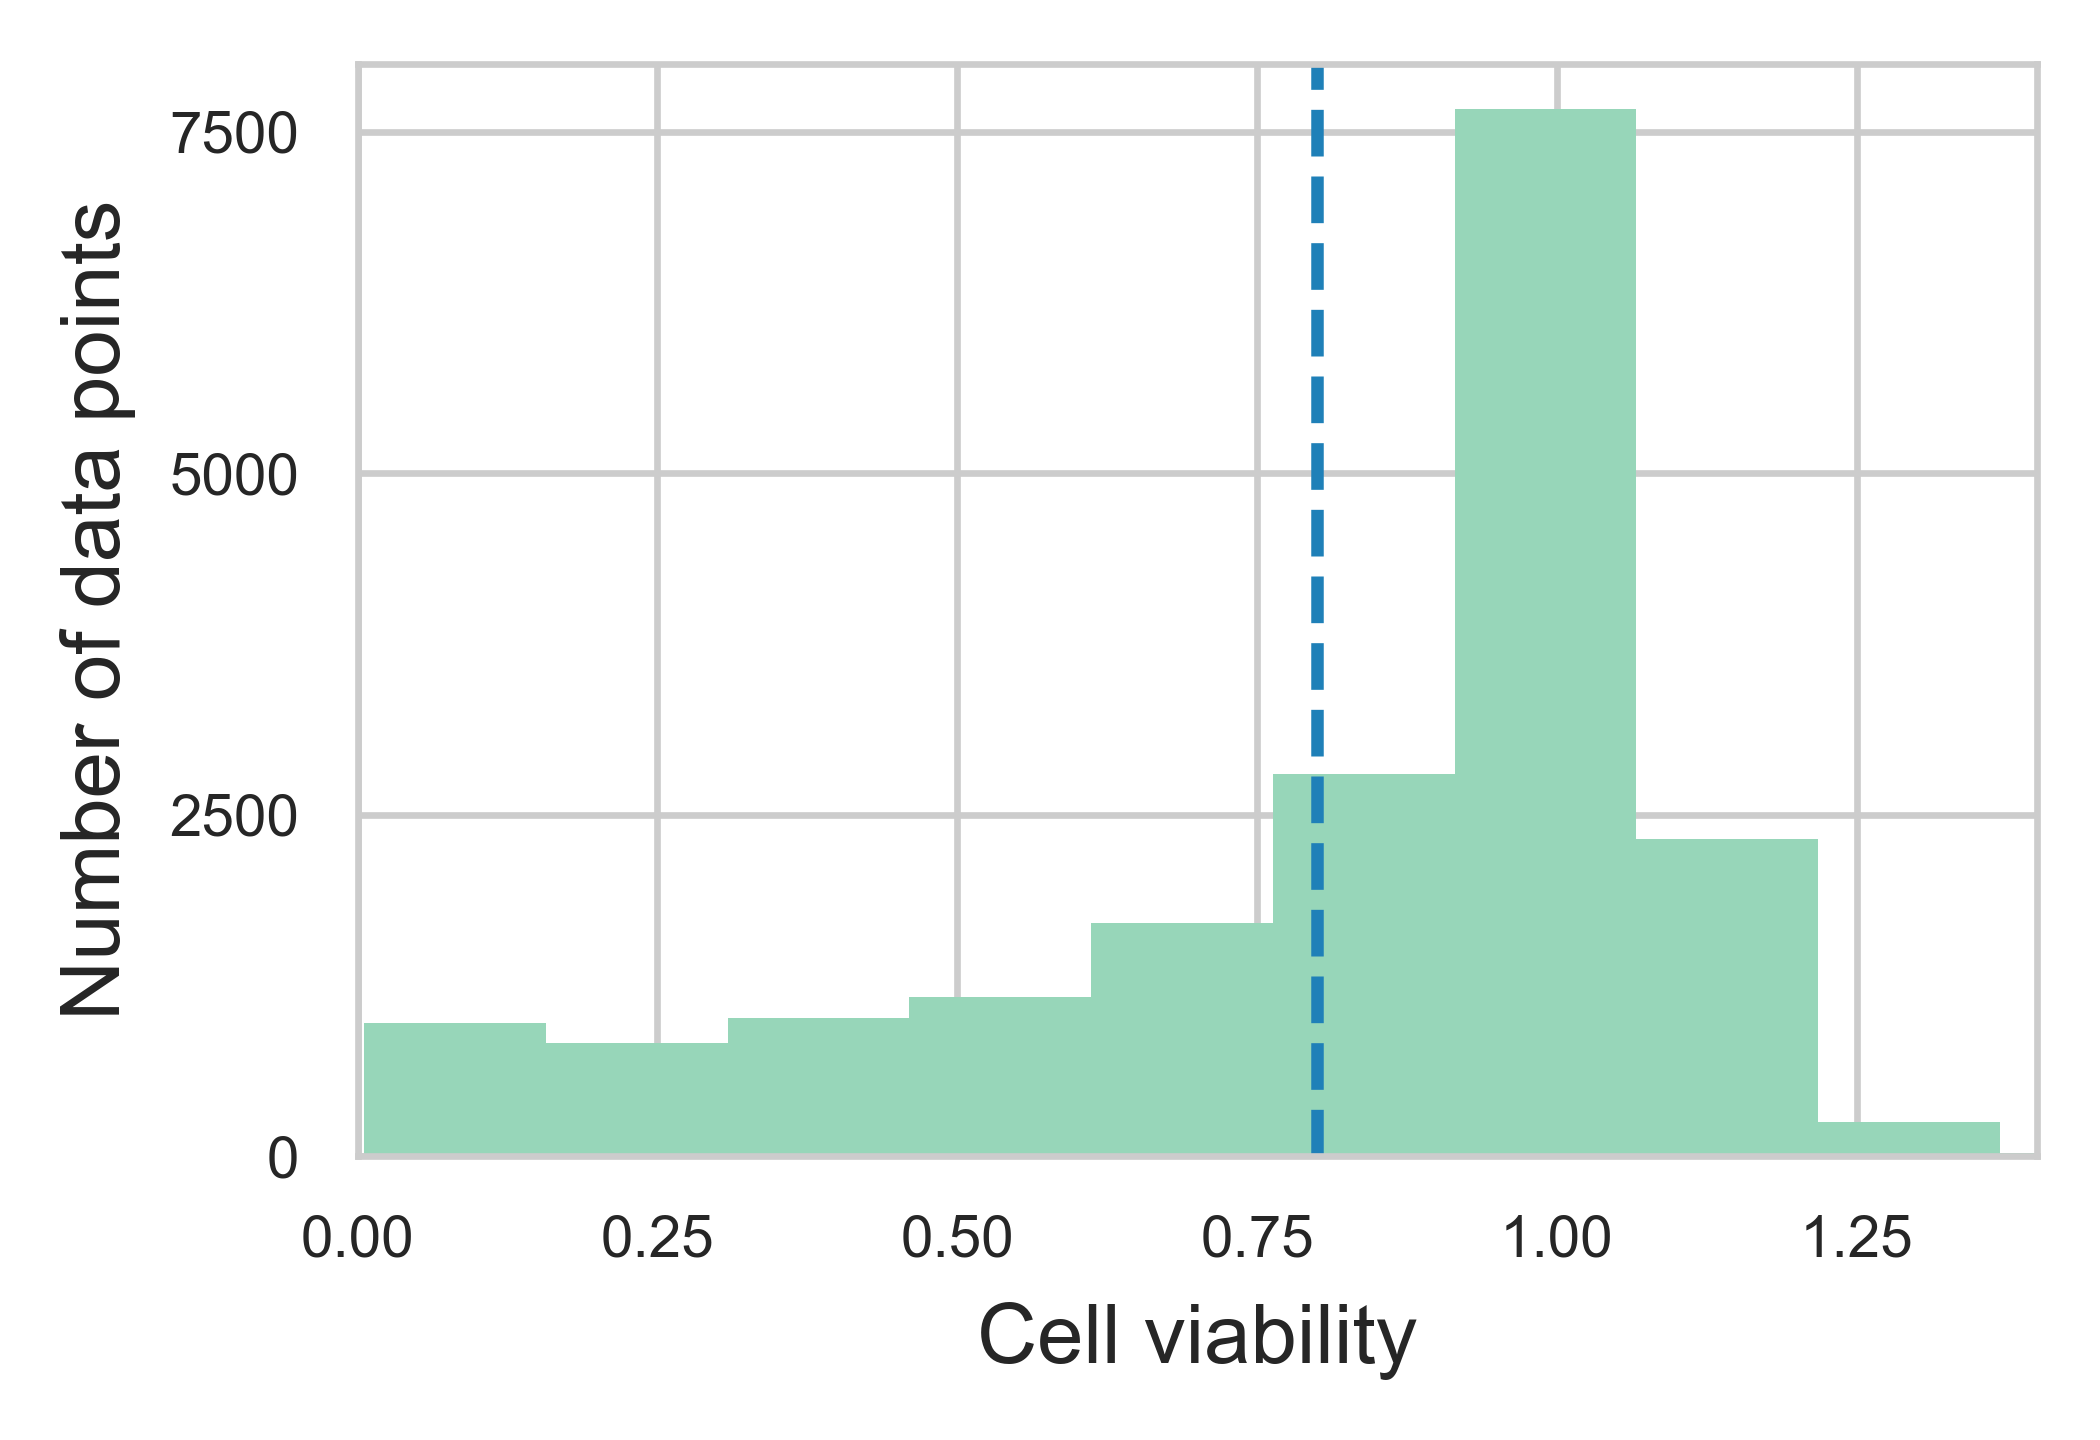

In [3]:
#SFig1D
plt.figure(dpi=600,figsize=(3.6,2.4))
sns.set_palette('YlGnBu',2)
data=pd.read_table('../results/CTRP/sig_info_merged_lm.csv',
                  sep=',',header=0,index_col=[0])
plt.hist(data['cpd_avg_pv'],linewidth=0)
plt.plot([0.8,0.8],[0.0,8000],'--')
plt.xticks(np.arange(0,1.5,0.25),size=7)
plt.yticks(np.arange(0,8000,2500),size=7)
plt.xlabel('Cell viability',size=10)
plt.ylabel('Number of data points',size=10)
plt.xlim(0,1.4)
plt.ylim(0,8000)
plt.tight_layout()
plt.savefig('../figures/raw/SFig1D.pdf')
#fitting two gaussians
model=GaussianMixture(2)
model.fit(data['cpd_avg_pv'].values.reshape((-1,1)))
print('Mean:',model.means_)
print('SD:',np.sqrt(model.covariances_))

In [4]:
sig_data=pd.read_table('../results/model/dimension_reduction/pca.csv',
                       sep=',',header=0,index_col=[0])
sig_info=pd.read_table('../results/CTRP/sig_info_merged_lm.csv',
                       sep=',',header=0,index_col=[0])
sig_info['bin_viability']='Cell viability<=0.8'
fil=sig_info['cpd_avg_pv']>0.8
sig_info.loc[sig_info.index[fil],'bin_viability']='Cell viability>0.8'

Spearman Rho with X: SpearmanrResult(correlation=-0.27815320239408109, pvalue=0.0)
Spearman Rho with Y: SpearmanrResult(correlation=-0.17933387221611252, pvalue=2.787893031404833e-135)


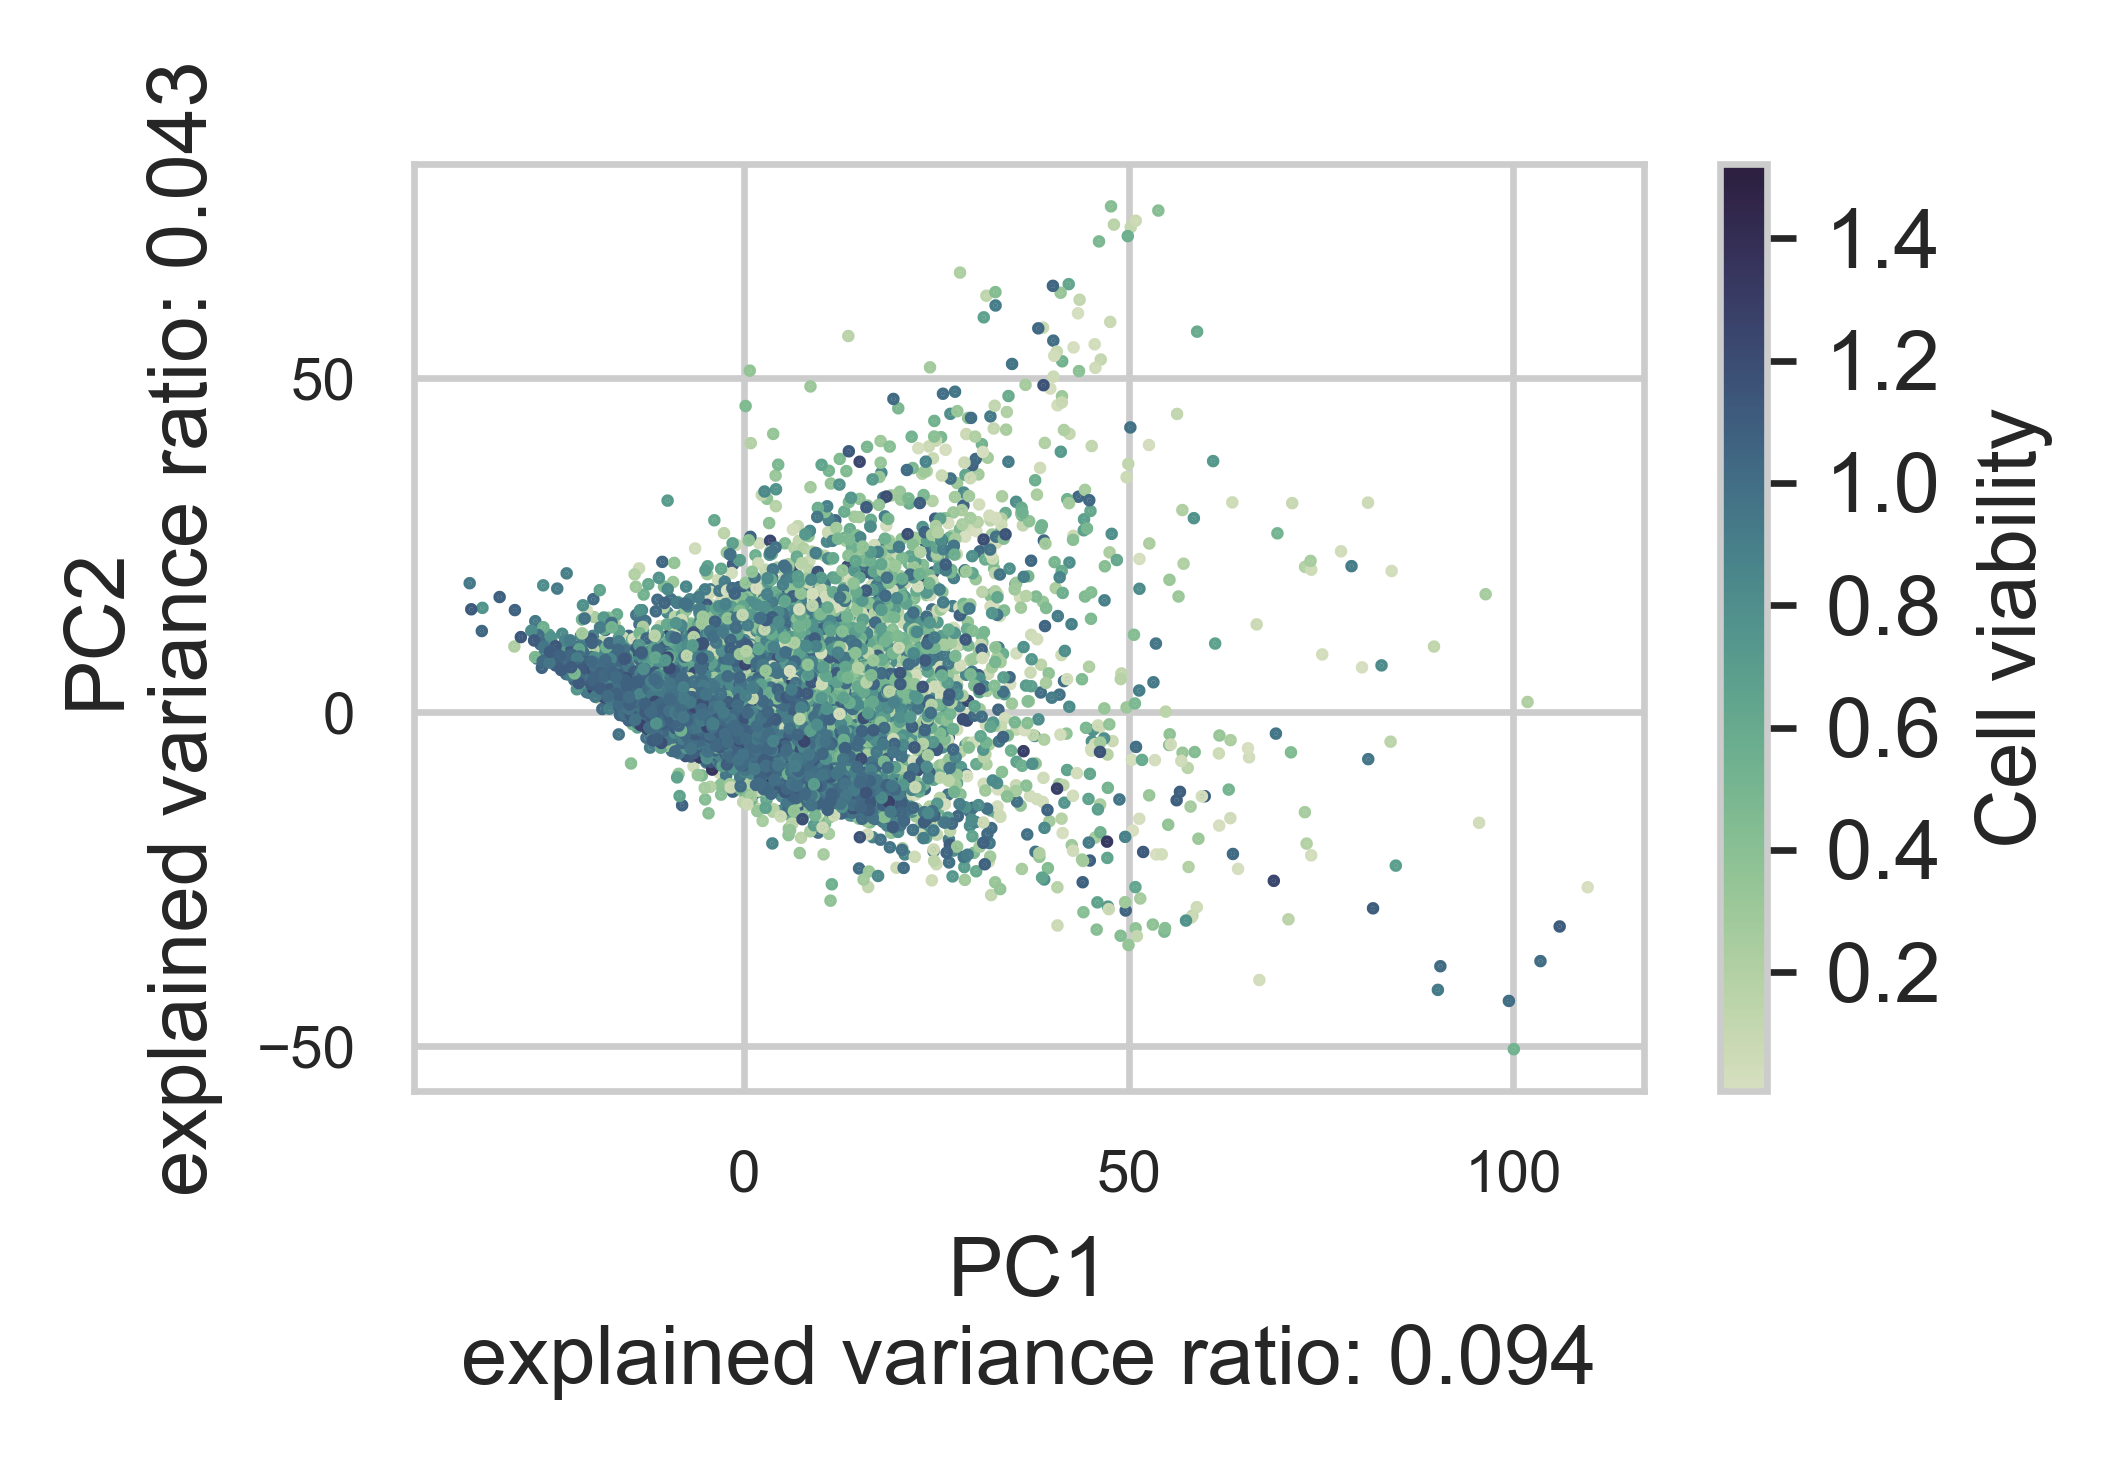

In [5]:
make_dim_reduc_plot(sig_data,sig_info,fname='Fig1B')

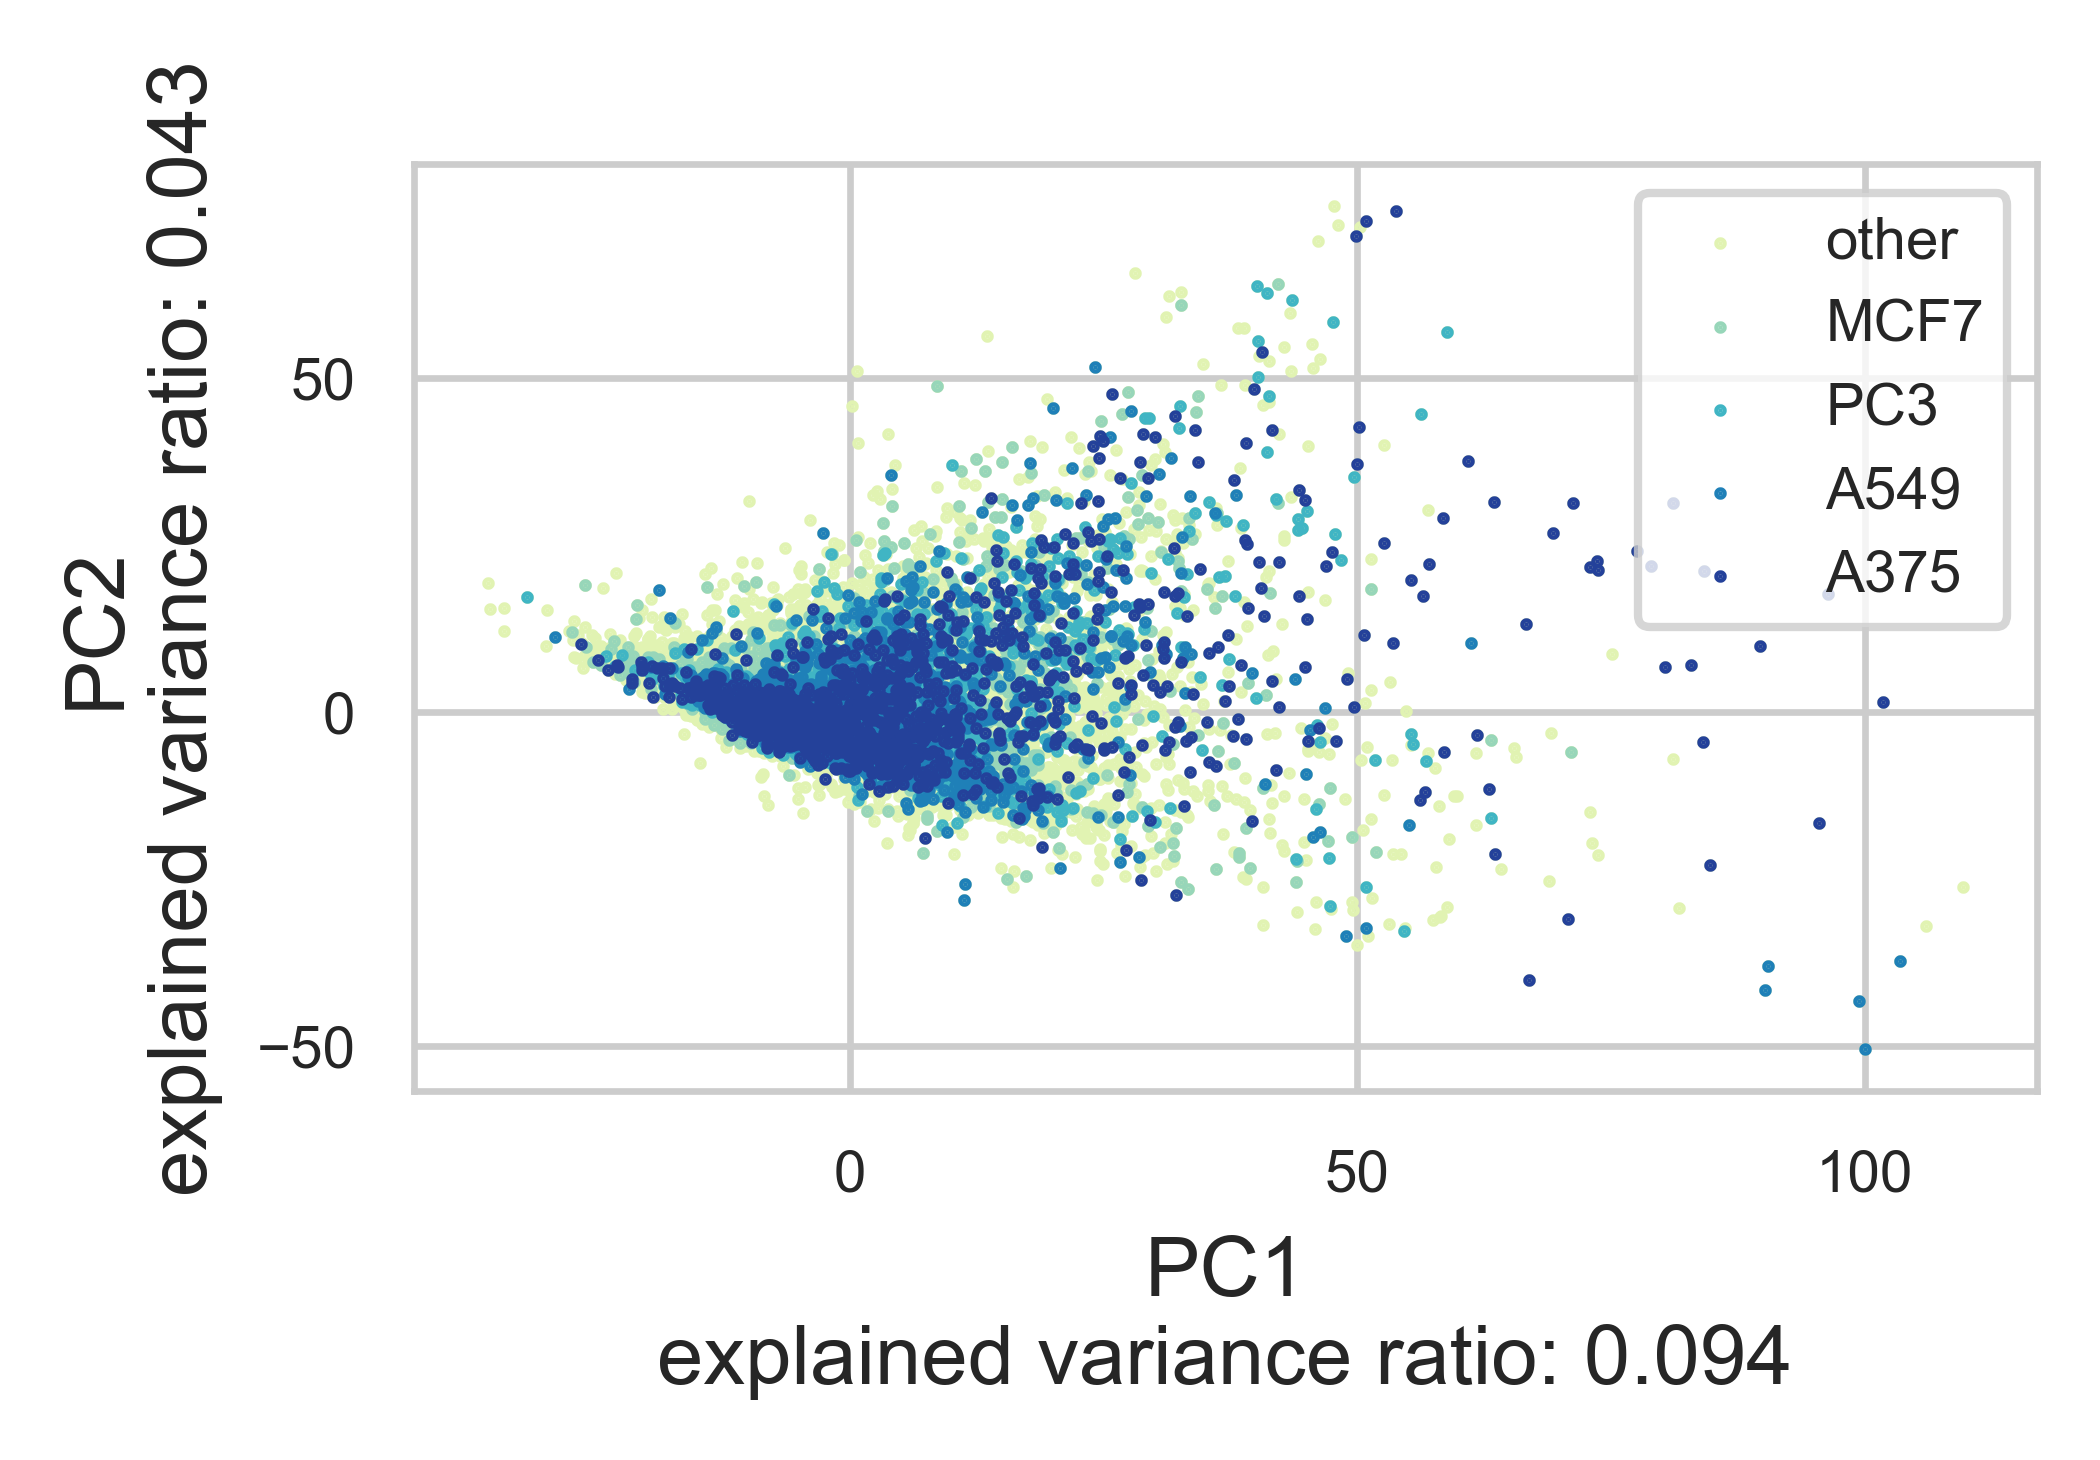

In [6]:
make_dim_reduc_plot(sig_data,sig_info,'cell_id','SFig1A')

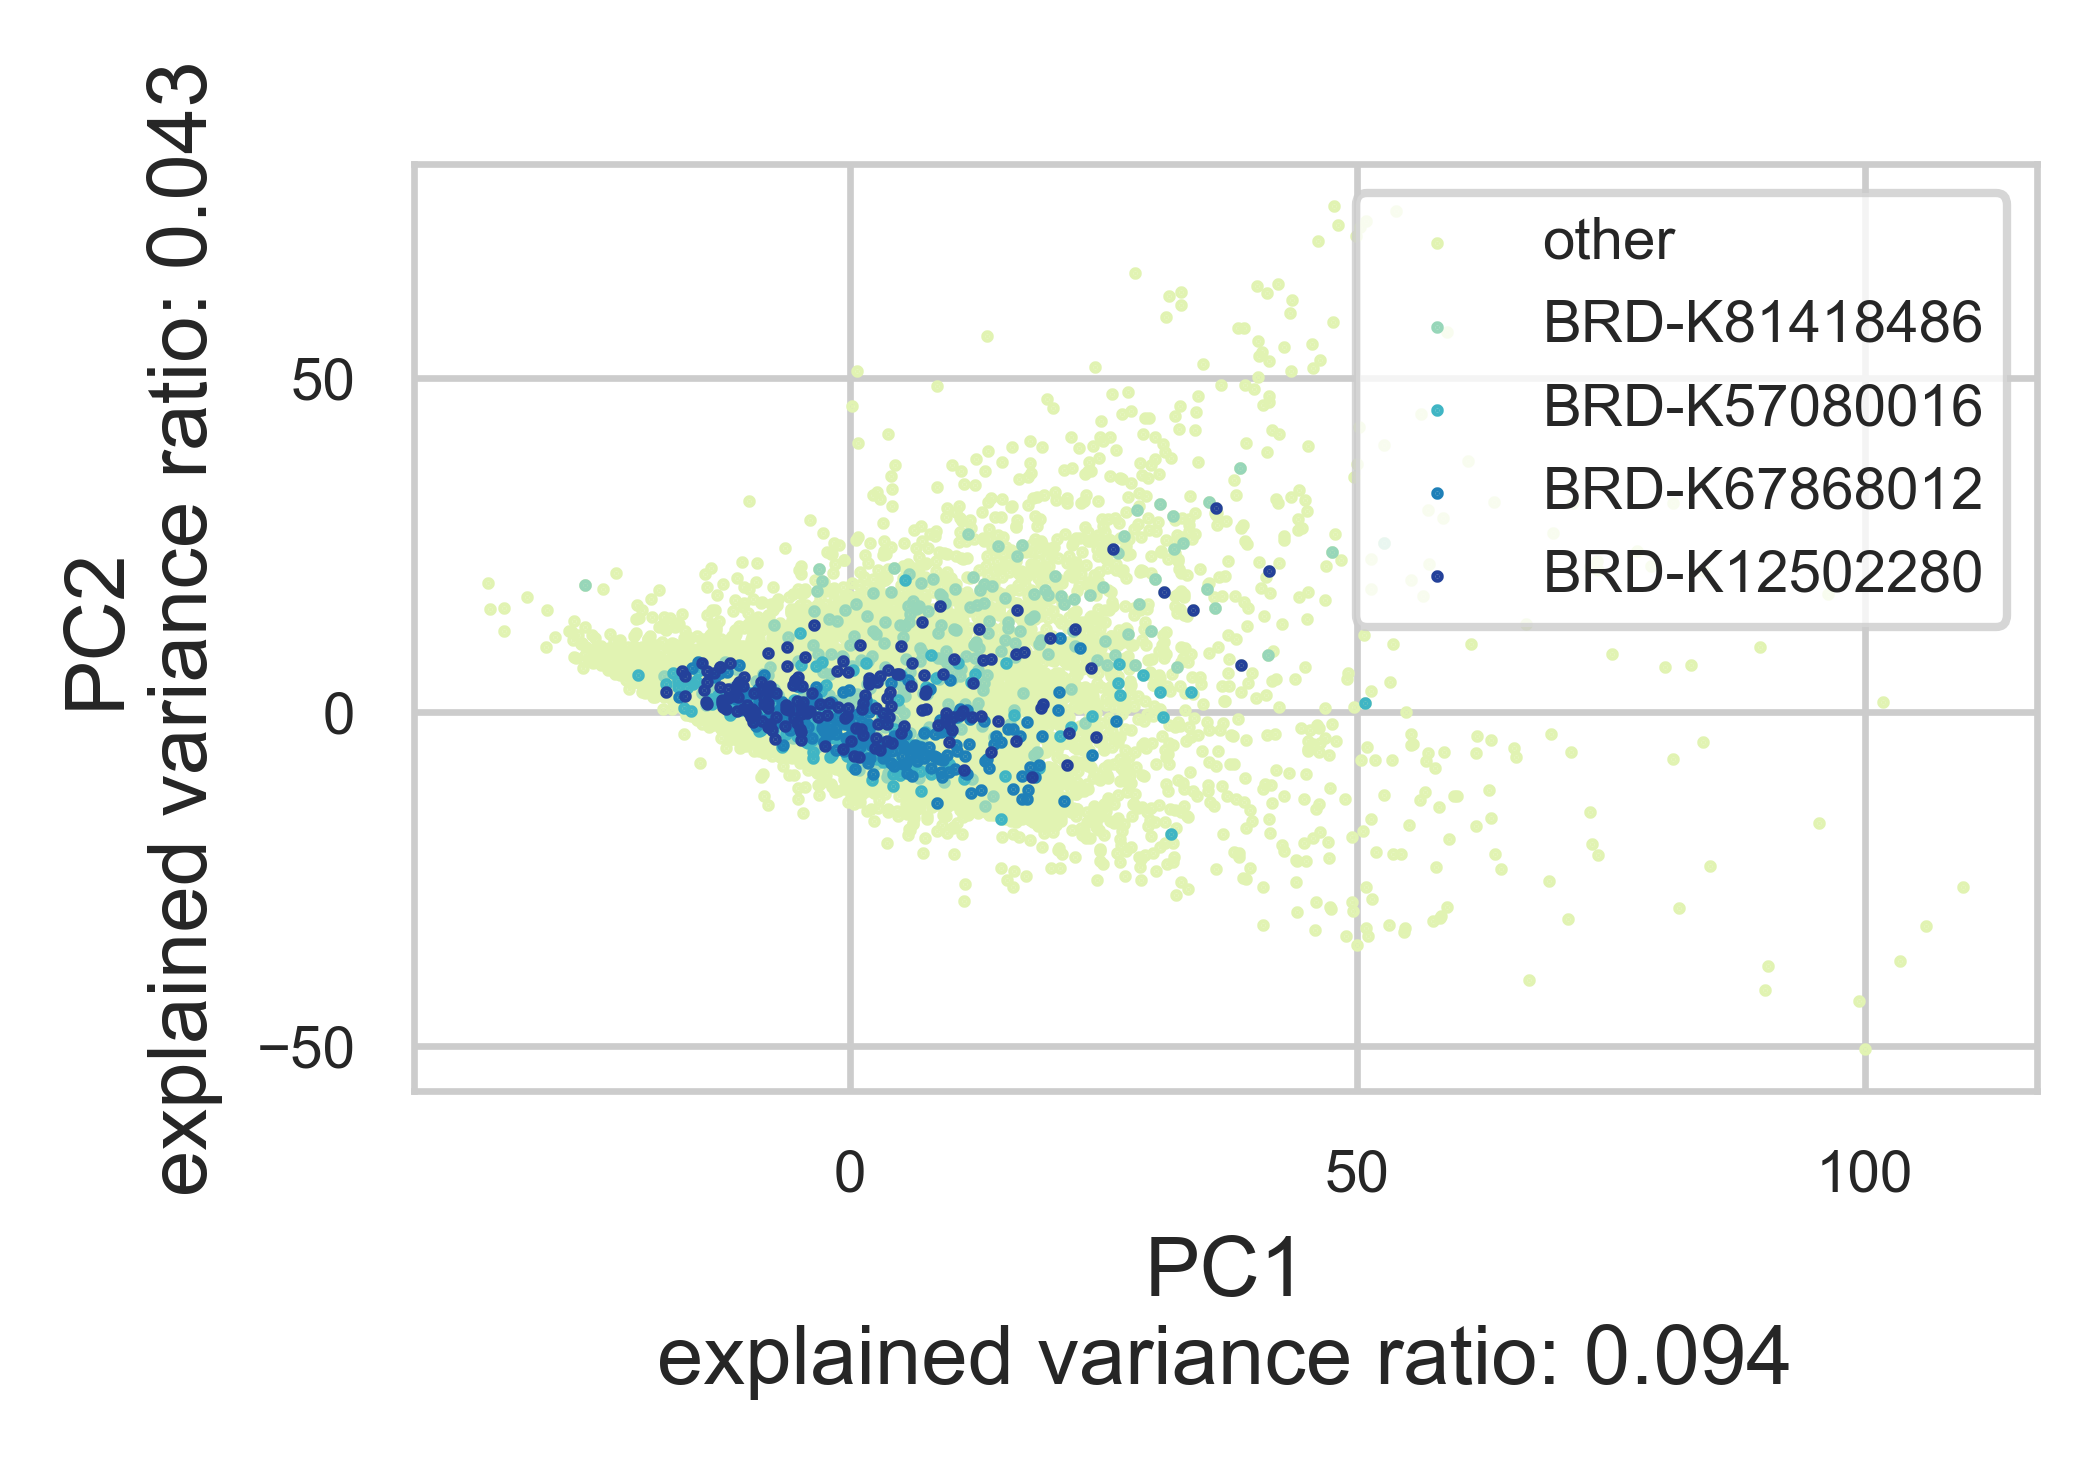

In [7]:
make_dim_reduc_plot(sig_data,sig_info,'pert_id','SFig1B')

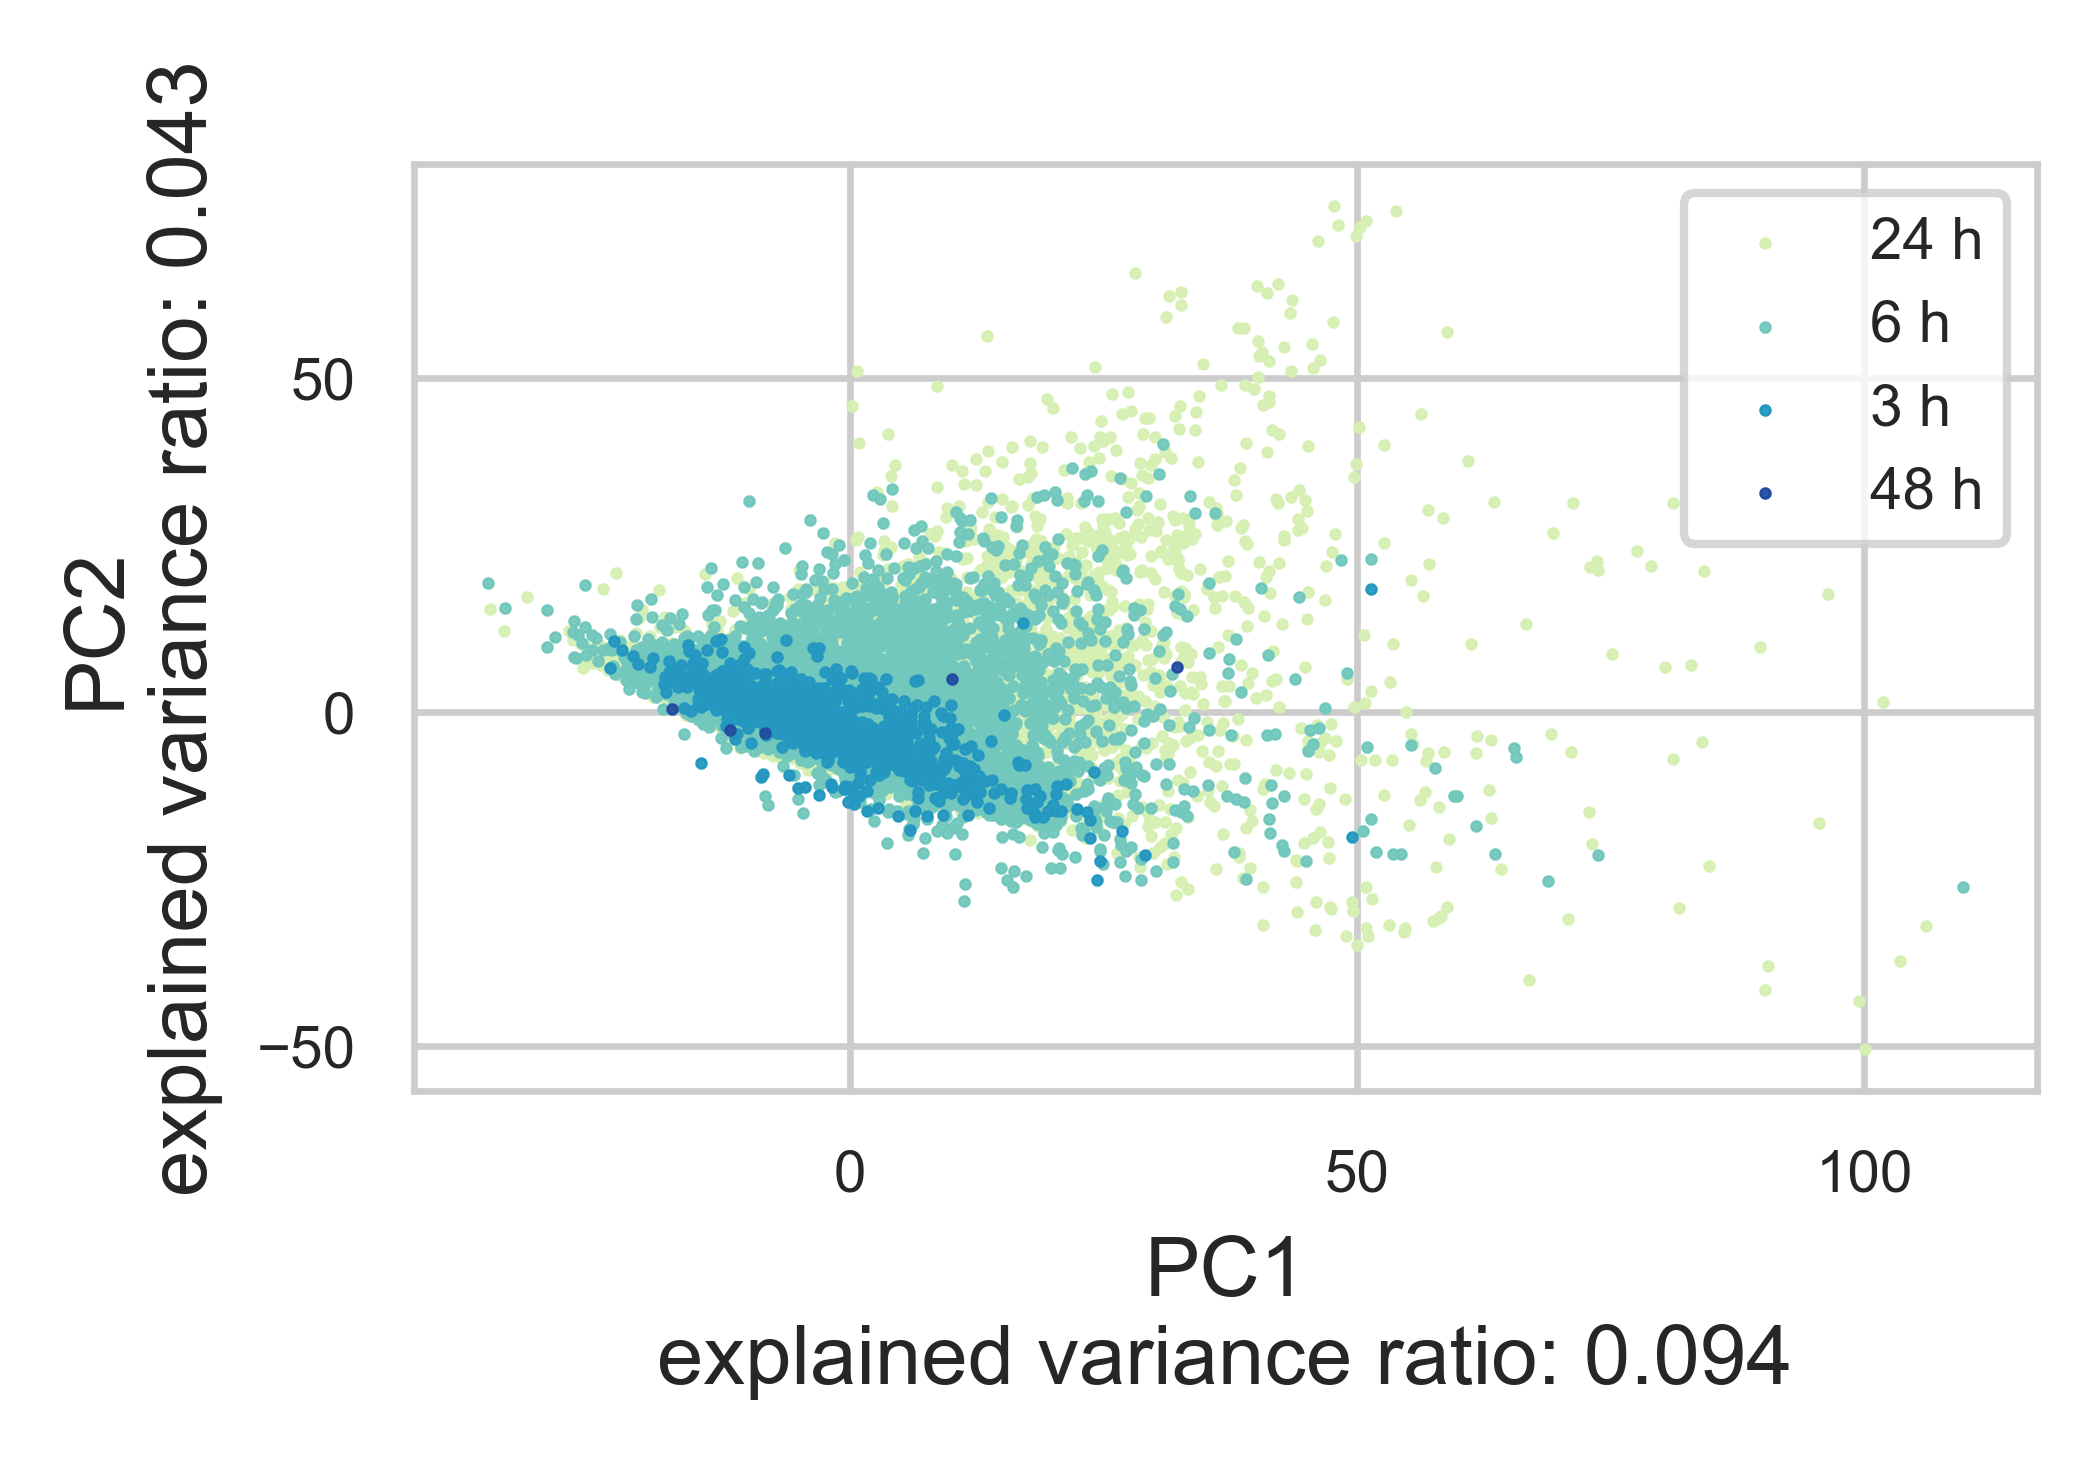

In [8]:
make_dim_reduc_plot(sig_data,sig_info,'pert_itime','SFig1C')

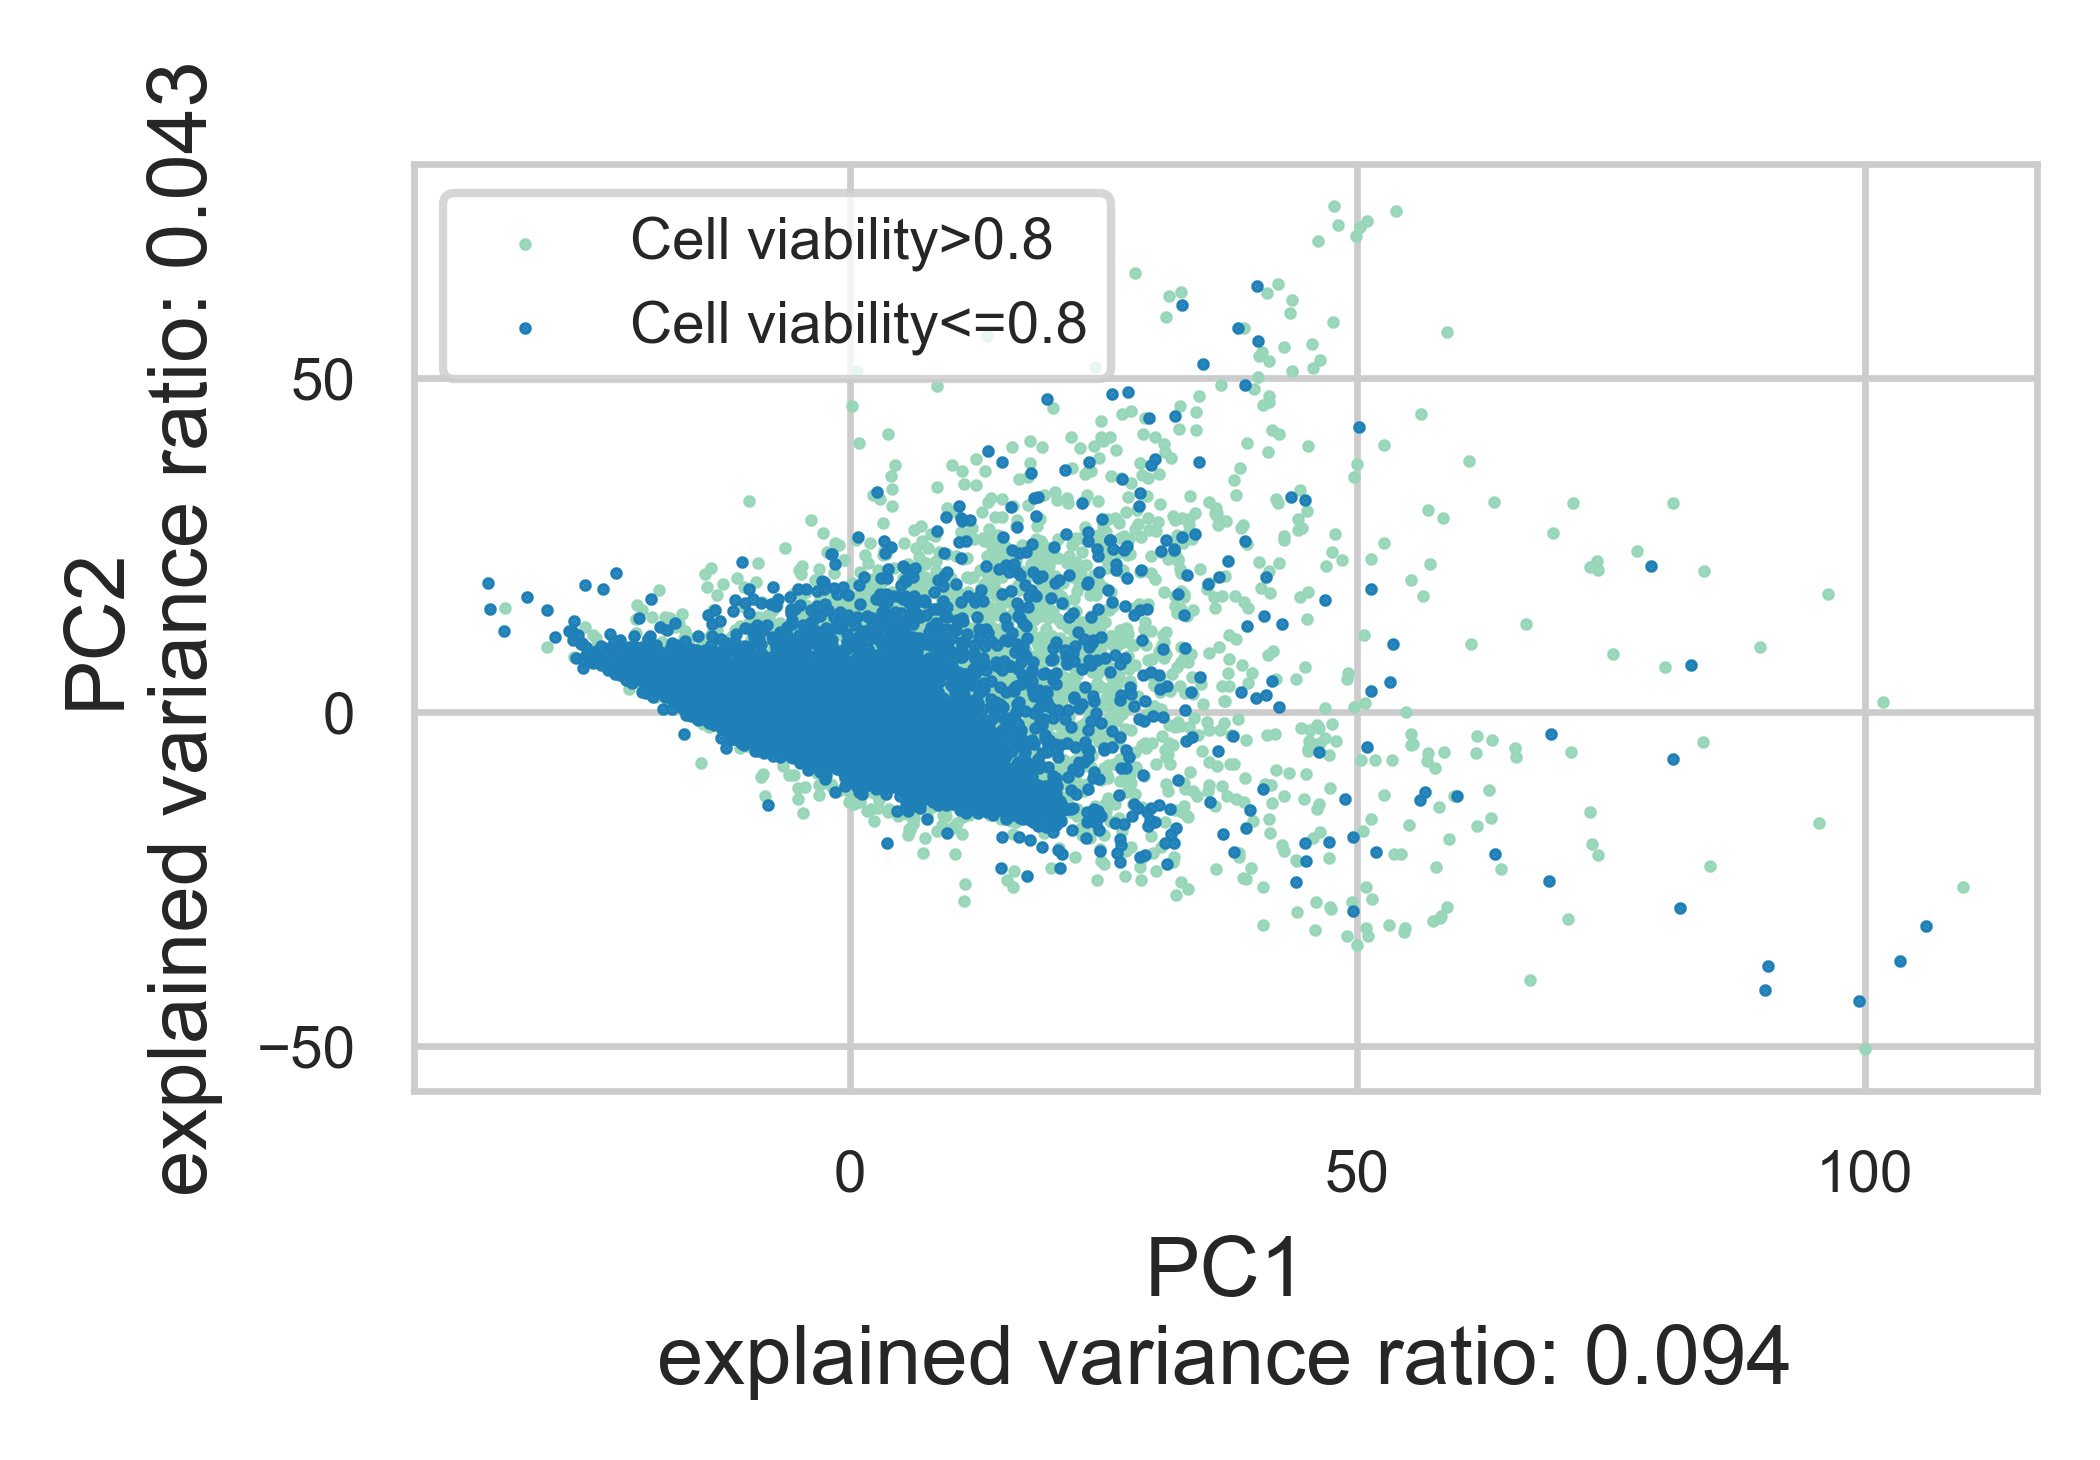

In [9]:
make_dim_reduc_plot(sig_data,sig_info,'bin_viability','SFig1E')

In [10]:
#silhouette analysis based on the previus clusterings, SFig 1F
sig_clustering=sig_info.loc[:,['pert_id','cell_id','bin_viability','pert_itime']].copy()
sig_clustering['PC1']=sig_data.iloc[:,0]
sig_clustering['PC2']=sig_data.iloc[:,1]
sns.set_palette('YlGnBu',4)
clustering_results=pd.DataFrame(index=range(4),columns=['Clustering',
                                                        'Clustering\nbased on','Average silhouette'])
clustering_results.loc[0,:]=['Compound','Compound',
                             silhouette_score(sig_clustering.loc[:,['PC1','PC2']],sig_clustering['pert_id'])]
clustering_results.loc[1,:]=['Cell line','Cell line',
                             silhouette_score(sig_clustering.loc[:,['PC1','PC2']],sig_clustering['cell_id'])]
clustering_results.loc[2,:]=['Time','Time',
                             silhouette_score(sig_clustering.loc[:,['PC1','PC2']],sig_clustering['pert_itime'])]
clustering_results.loc[3,:]=['Cell viability','Cell viability',
                             silhouette_score(sig_clustering.loc[:,['PC1','PC2']],sig_clustering['bin_viability'])]

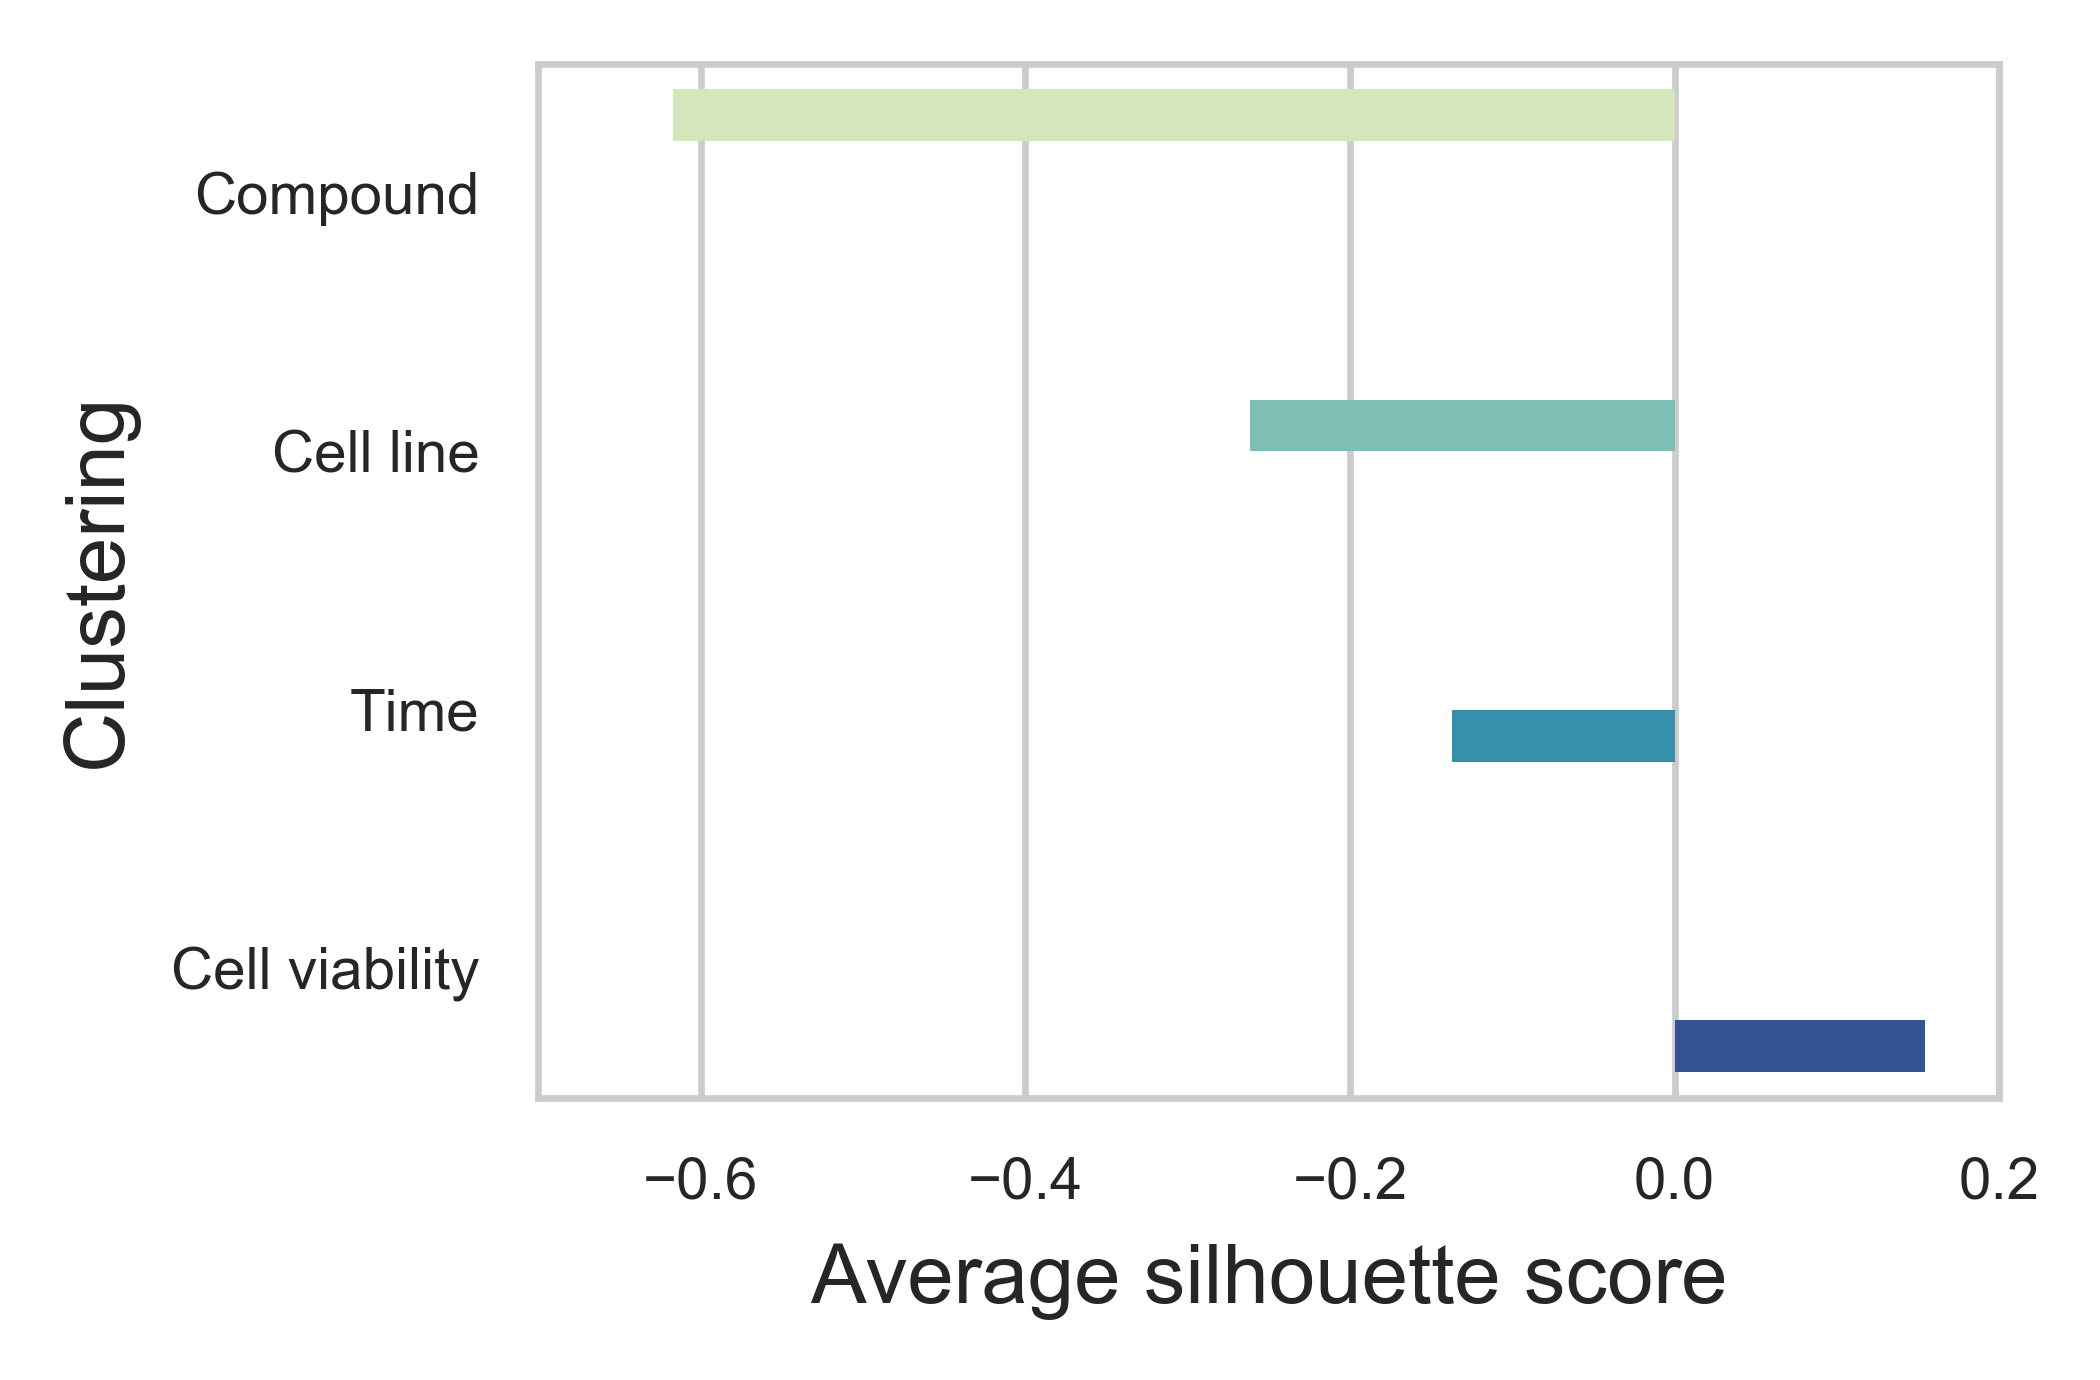

In [13]:
plt.figure(dpi=600,figsize=(3.6,2.4))
sns.barplot(x='Average silhouette',y='Clustering',hue='Clustering\nbased on',
            data=clustering_results,linewidth=0)
plt.legend([],frameon=False)
plt.xlim(-0.7,0.2)
plt.xticks(size=7)
plt.yticks(size=7)
plt.xlabel('Average silhouette score',size=10)
plt.ylabel('Clustering',size=10)
plt.tight_layout()
plt.savefig('../figures/raw/SFig1F.pdf')

/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/ipykernel/__main__.py:21: RuntimeWarning: divide by zero encountered in log10


CTRP-L1000 CTRP-L1000 0.595488469567 -inf
CTRP-L1000 Achilles-L1000 0.191925619497 -inf
Achilles-L1000 CTRP-L1000 0.336333355296 -246.073476646
Achilles-L1000 Achilles-L1000 0.497307285658 -inf


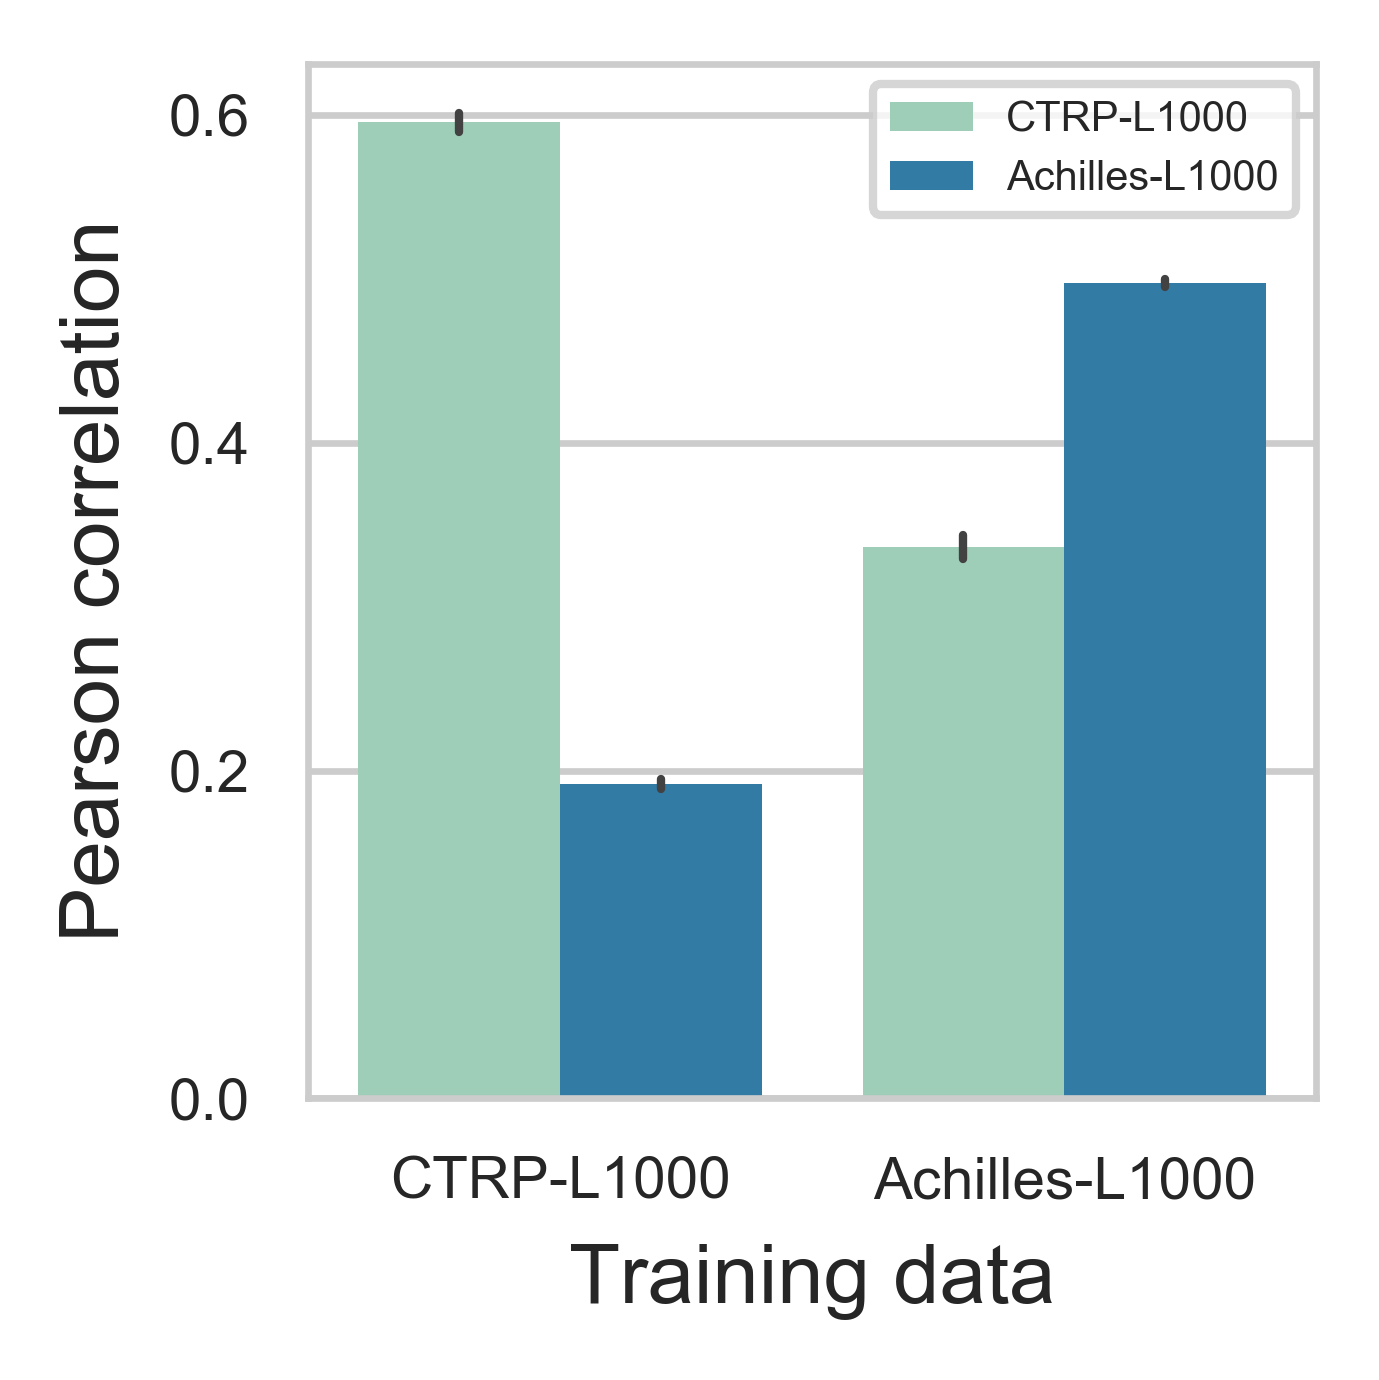

In [19]:
#Figure 1C prediction performance
plt.figure(dpi=600,figsize=(2.4,2.4))
sns.set_palette('YlGnBu',2)
data=pd.read_table('../results/model/cv/achilles_ctrp_all_prediction.csv',
                   sep=',',header=0,index_col=[0])
data.columns=['Training data','Test data','Pearson correlation','p','s']
data['Training data']+='-L1000'
data['Test data']+='-L1000'
sns.barplot(x='Training data',y='Pearson correlation',hue='Test data',
            data=data,errwidth=1,ci='sd',linewidth=0)
plt.xticks(size=7)
plt.yticks(size=7)
plt.xlabel('Training data',size=10)
plt.ylabel('Pearson correlation',size=10)
plt.legend(fontsize=5)
plt.tight_layout()
plt.savefig('../figures/raw/Fig1C.pdf')
for tr in list(set(data['Training data'])):
    for cv in list(set(data['Test data'])):
        fil=(data['Training data']==tr) & (data['Test data']==cv)
        print(tr,cv, np.mean(data[fil]['Pearson correlation']), np.mean(np.log10(data[fil]['p'])))


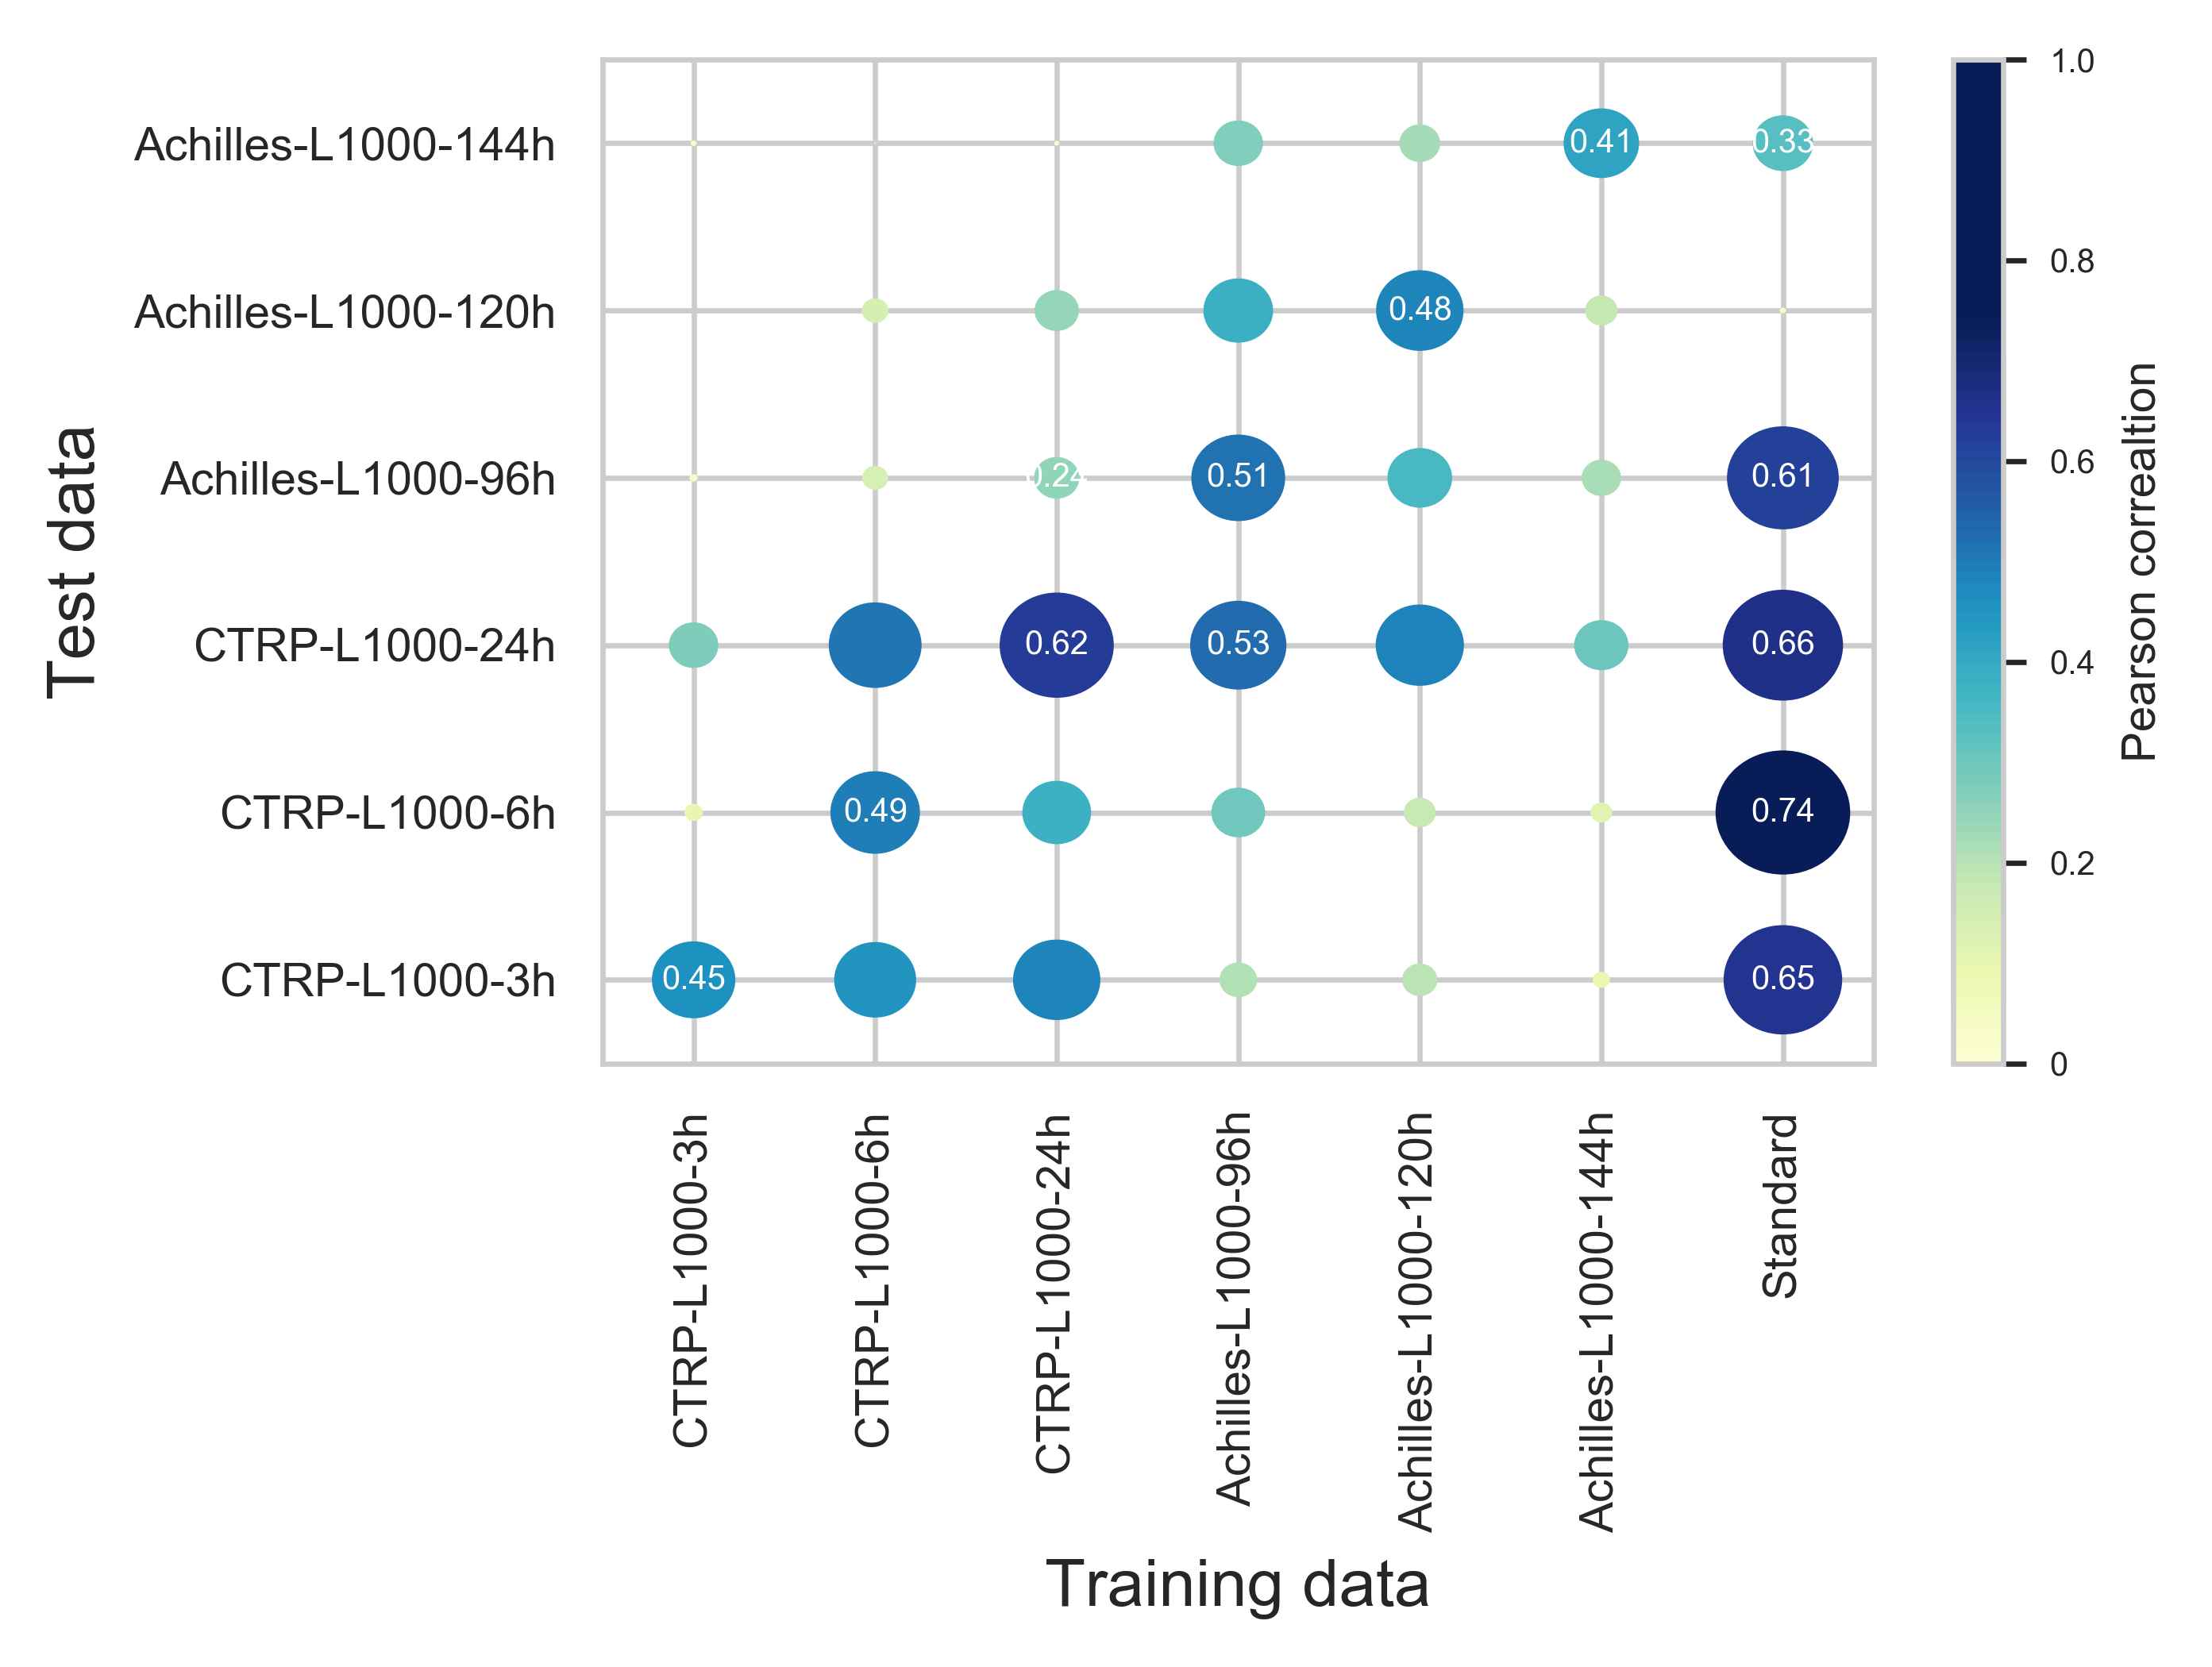

In [6]:
#Figure 1D prediction performance (the plot is a bit complicated...)
sns.set_style("whitegrid")
data_sig=pd.read_table('../results/model/cv/achilles_ctrp_time_prediction.csv',
                       sep=',',header=0,index_col=[0])
data_bl=pd.read_table('../results/model/cv/achilles_ctrp_classical_prediction.csv',
                      sep=',',header=0,index_col=[0])
data=pd.DataFrame(0,index=['CTRP-L1000-3h','CTRP-L1000-6h','CTRP-L1000-24h',
                           'Achilles-L1000-96h','Achilles-L1000-120h',
                           'Achilles-L1000-144h','Standard'],
                  columns=['CTRP-L1000-3h','CTRP-L1000-6h','CTRP-L1000-24h',
                           'Achilles-L1000-96h','Achilles-L1000-120h','Achilles-L1000-144h']).T
for i in data.index:
    d1,dummy,t1=i.split('-')
    t1=t1[:-1]+' h'
    for j in data.index:
        d2,dummy,t2=j.split('-')
        t2=t2[:-1]+' h'
        fil=(data_sig['Train data']==d1)&(data_sig['CV data']==d2)&(data_sig['Train time']==t1)&(data_sig['CV time']==t2)
        data.loc[j,i]=np.mean(data_sig['r'][fil])
for i in data.index:
    d1,dummy,t1=i.split('-')
    t1=t1[:-1]+' h'
    fil=(data_bl['Train data']==d1)&(data_bl['Train time']==t1)
    data.loc[i,'Standard']=np.mean(data_bl['r'][fil])
fig,ax=plt.subplots(figsize=(4.8,3.6))
fig.set_dpi(600)
ax.set_xlim(-0.1,1.3)
ax.set_ylim(-0.1,1.1)
cmap=cmap_builder('YlGnBu')
circles=[]
colors=[]
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        circles.append(plt.Circle((j*0.2,i*0.2),np.abs(data.iloc[i,j])*0.1))
        colors.append((data.iloc[i,j]+1)/2)
p=PatchCollection(circles,array=np.array(colors),cmap=cmap,linewidth=0)
ax.add_collection(p)
for i in range(data.shape[0]):
    ax.text(i*0.2,i*0.2,str(data.iloc[i,i])[:4],color='white',va='center',ha='center',size=5)
    if data.iloc[i,-1]>0.2:
        ax.text(1.2,i*0.2,str(data.iloc[i,-1])[:4],color='white',va='center',ha='center',size=5)
for i,j in [(3,2),(2,3)]:
    ax.text(j*0.2,i*0.2,str(data.iloc[i,j])[:4],color='white',va='center',ha='center',size=5)
ax.set_xticks(np.arange(0.0,1.3,0.2))
ax.set_yticks(np.arange(0.0,1.1,0.2))
ax.set_xticklabels(data.columns,rotation=90,size=7)
ax.set_yticklabels(data.index,size=7)
ax.set_xlabel('Training data',size=10)
ax.set_ylabel('Test data',size=10)

cb=fig.colorbar(p,boundaries= np.linspace(0.5,1,101),ticks=[0.5,0.6,0.7,0.8,0.9,1.0])
cb.ax.set_yticklabels([0,0.2,0.4,0.6,0.8,1.0],size=5)
cb.set_label('Pearson correaltion',size=7)
plt.tight_layout()
plt.savefig('../figures/raw/Fig1D.pdf')

## Figure 2 and associated Supplementary Figures

In [12]:
# expression cell viaibility correlations
sig_info=pd.read_table('../results/Achilles/sig_info_merged_lm.csv',
                      sep=',',header=0,index_col=[0])
signatures=pd.read_table('../results/Achilles/signatures_merged_lm.csv',
                        sep=',',header=0,index_col=[0])
fil=sig_info['pert_itime']=='96 h'
sig_info=sig_info[fil]
signatures=signatures.loc[sig_info.index]

In [13]:
gene_info=pd.read_table('../data/LINCS/GSE92742/GSE92742_Broad_LINCS_gene_info.txt',
                       sep='\t',index_col=[0],header=0)
gene_info.index=gene_info.index.astype(str)
signatures.columns=gene_info.loc[signatures.columns,'pr_gene_symbol']

In [136]:
from scipy.stats import pearsonr as pcor

/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


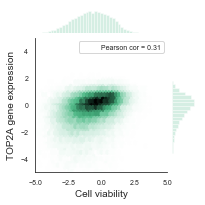

In [141]:
sns.set_palette('YlGnBu',2)
sns.set_style('white')
g=sns.jointplot(sig_info['shRNA_abundance'],signatures['TOP2A'],kind='hex',
                height=3,xlim=(-5,5),ylim=(-5,5))
g.ax_marg_x.set_axis_off()
g.ax_marg_y.set_axis_off()
g.ax_joint.set_xlabel('Cell viability',size=10)
g.ax_joint.set_ylabel('TOP2A gene expression',size=10)
rsquare = lambda a, b: pcor(a, b)[0]
g.annotate(rsquare,stat="Pearson cor", loc="upper right", fontsize=7)
g.ax_joint.set_xticklabels(g.ax_joint.get_xticklabels(),size=7)
g.ax_joint.set_yticklabels(g.ax_joint.get_yticklabels(),size=7)
plt.savefig('../figures/raw/Fig2Atop2a.pdf')

/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


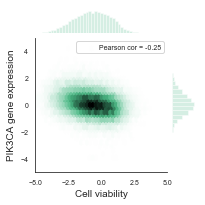

In [142]:
sns.set_palette('YlGnBu',2)
sns.set_style('white')
g=sns.jointplot(sig_info['shRNA_abundance'],signatures['PIK3CA'],kind='hex',
                height=3,xlim=(-5,5),ylim=(-5,5))
g.ax_marg_x.set_axis_off()
g.ax_marg_y.set_axis_off()
g.ax_joint.set_xlabel('Cell viability',size=10)
g.ax_joint.set_ylabel('PIK3CA gene expression',size=10)
rsquare = lambda a, b: pcor(a, b)[0]
g.annotate(rsquare,stat="Pearson cor", loc="upper right", fontsize=7)
g.ax_joint.set_xticklabels(g.ax_joint.get_xticklabels(),size=7)
g.ax_joint.set_yticklabels(g.ax_joint.get_yticklabels(),size=7)
plt.savefig('../figures/raw/Fig2Apik3ca.pdf')

In [75]:
#tf activity - gene essentiality correaltions
tf_activity=pd.read_csv('../results/functional/enrichments/DoRothEA_achilles.csv',sep=',',header=0,index_col=0)
gene_dep=pd.read_table('../data/Achilles/D2_combined_gene_dep_scores.csv',sep=',',
                      header=0,index_col=[0])
genes=pd.Series(gene_dep.index).apply(lambda x :x.split(' (')[0])
gene_dep.index=genes
gene_dep=pd.DataFrame(np.mean(gene_dep,1),columns=['Mean gene essentiality'])
genes=list(set(gene_dep.index) & set(tf_activity.index))
tf_activity=tf_activity.loc[genes,'NES']
tf_activity=-tf_activity #sign of tf_activity changes to be consistent
gene_dep=gene_dep.loc[genes,'Mean gene essentiality']

In [30]:
from adjustText import adjust_text

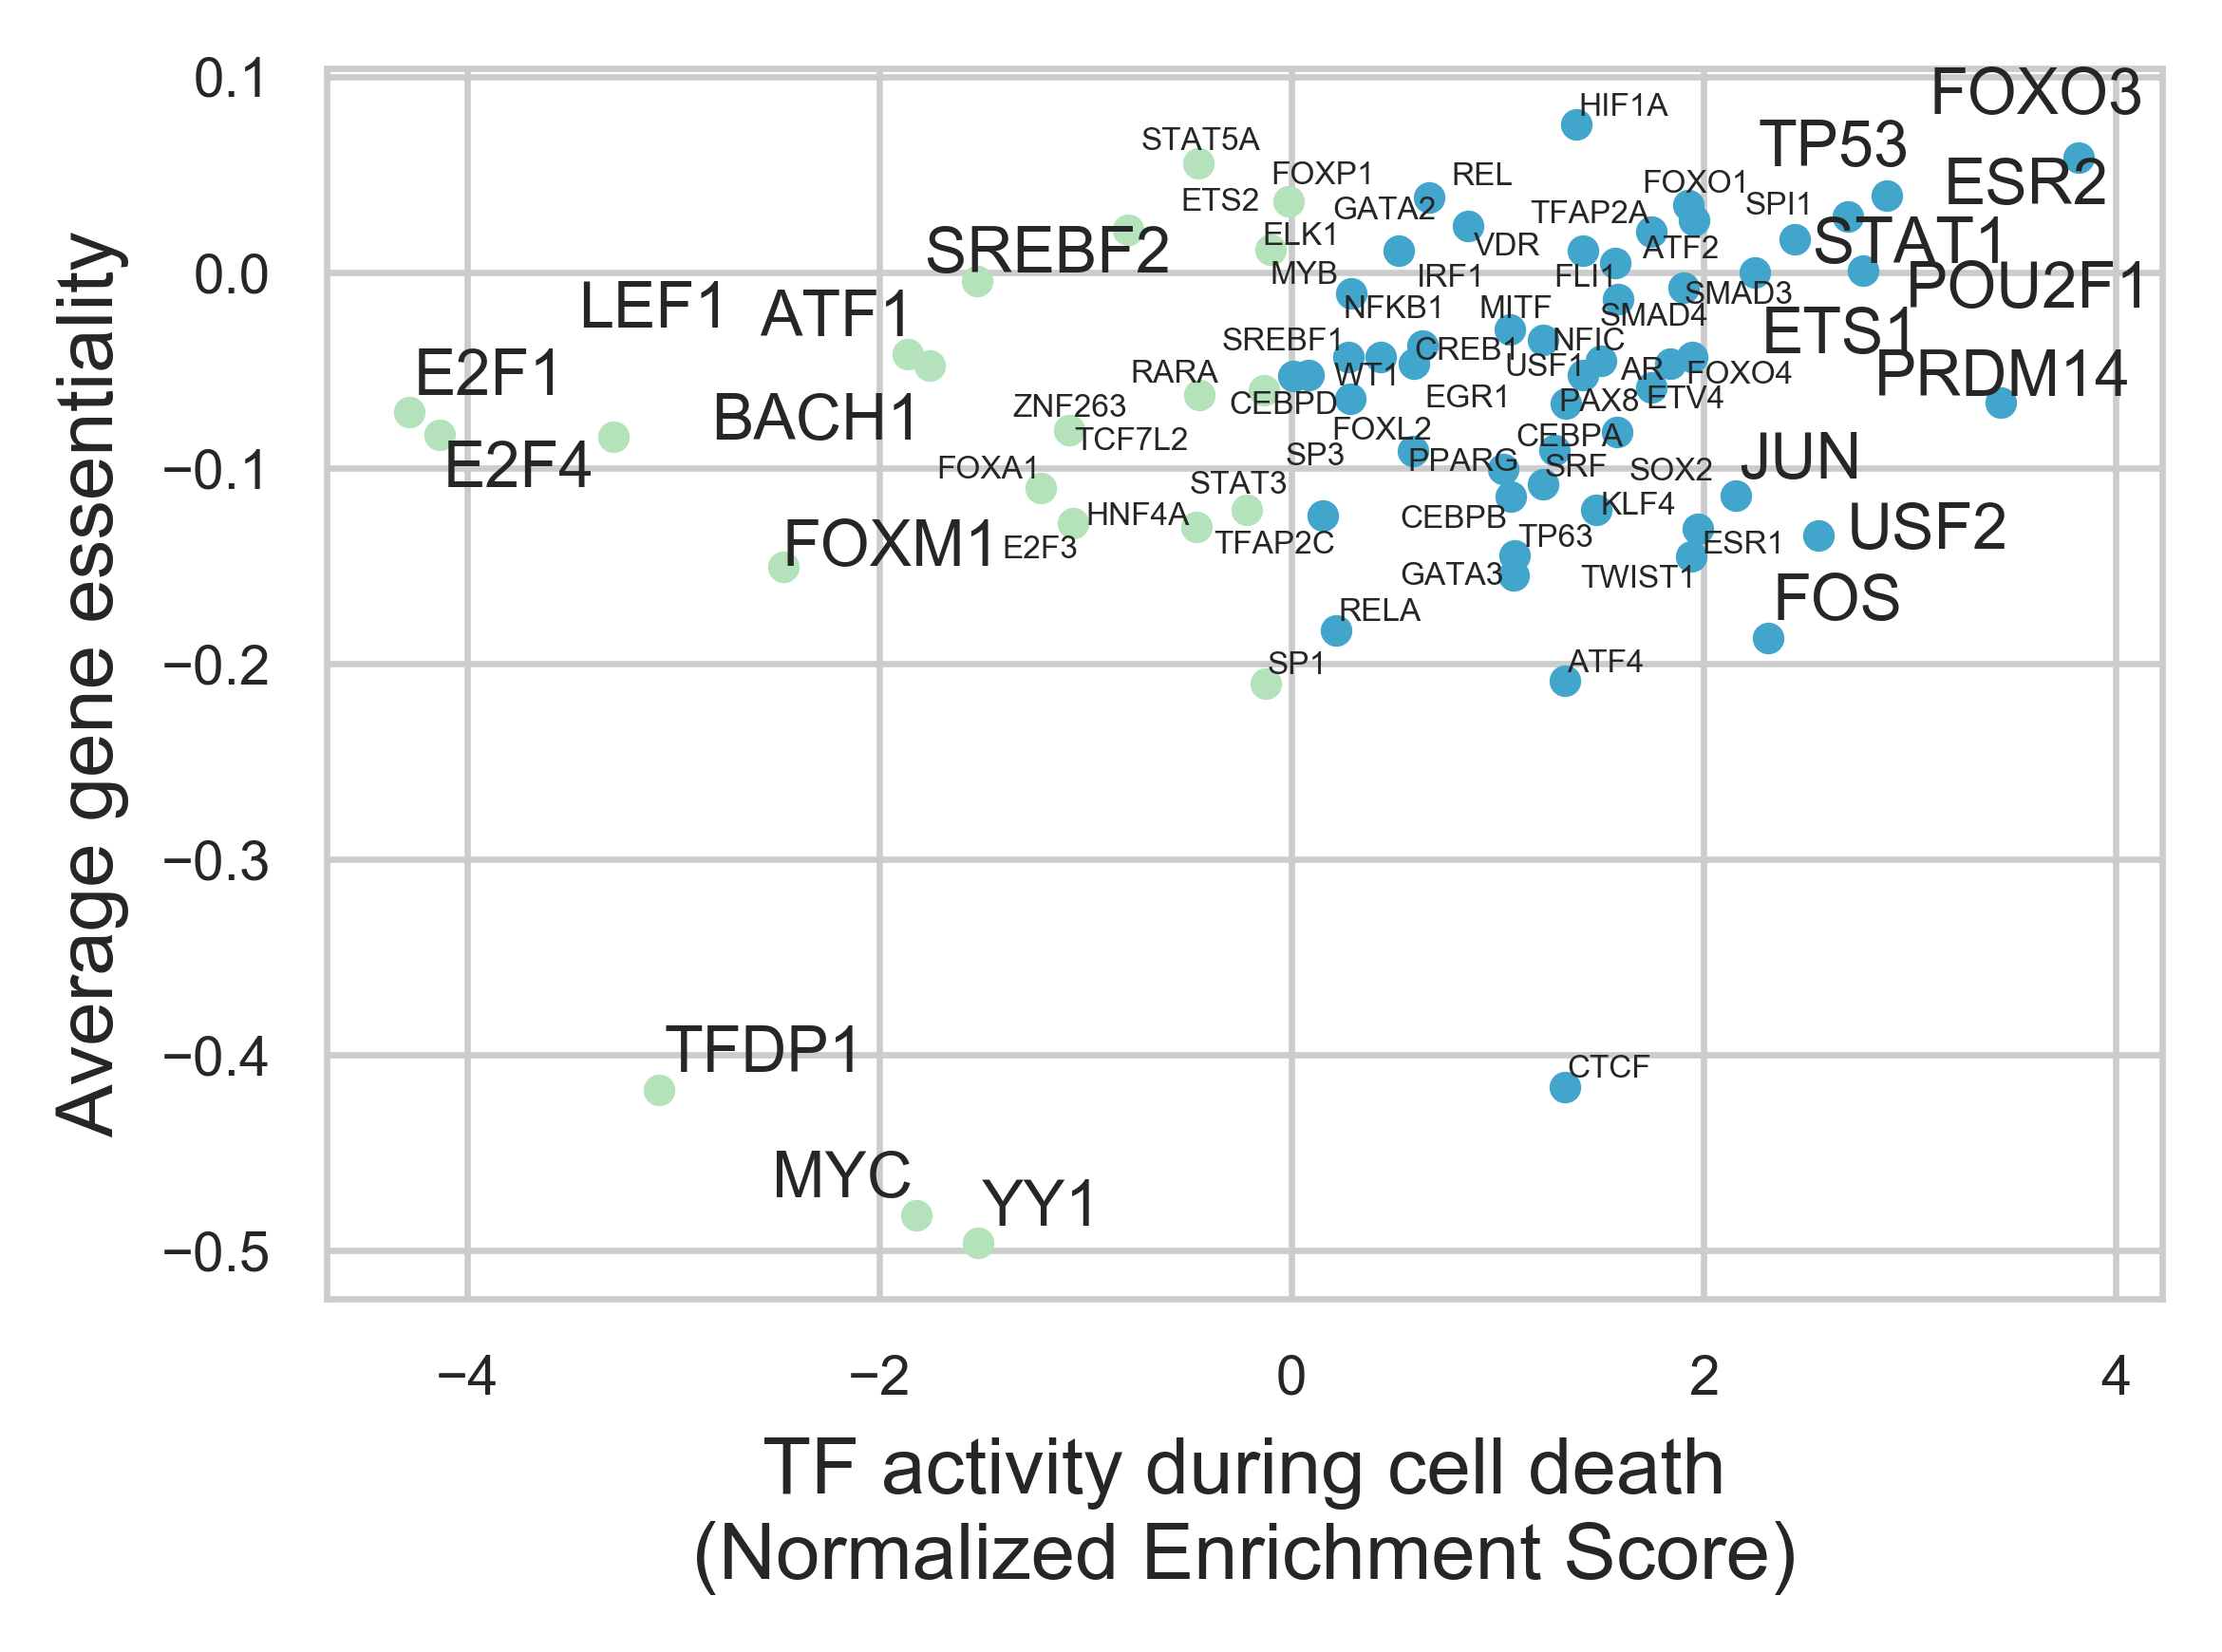

In [76]:
plt.figure(dpi=600,figsize=(4,3))
sns.set_palette('GnBu',2)
fil=tf_activity<0
plt.plot(tf_activity[fil],gene_dep[fil],'.') 
plt.plot(tf_activity[~fil],gene_dep[~fil],'.')
texts=[]
for tf in tf_activity.index:
    if (tf_activity[tf]<-1.5) | (tf_activity[tf]>2):
        texts.append(plt.text(tf_activity[tf],gene_dep[tf],tf,size=8,
                    horizontalalignment='center'))
    else:
        texts.append(plt.text(tf_activity[tf],gene_dep[tf],tf,size=4,
                    horizontalalignment='center'))
adjust_text(texts)
plt.xticks(size=7)
plt.yticks(size=7)
plt.xlabel('TF activity during cell death\n(Normalized Enrichment Score)',size=10)
plt.ylabel('Average gene essentiality',size=10)
plt.tight_layout()
plt.savefig('../figures/raw/Fig2B.pdf')

In [48]:
from scipy.stats import pearsonr as pcor
print(pcor(tf_activity,gene_dep))

(0.32240971682023012, 0.0050868259666471431)


In [3]:
from statsmodels.sandbox.stats.multicomp import multipletests

In [106]:
# drug sensitivity
sens_eff=pd.read_csv('../results/functional/linear_models/all_scores_lm_coef.csv',sep=',',
                    header=0,index_col=0)['real_model']
sens_pval=pd.read_csv('../results/functional/linear_models/all_scores_lm_pval.csv',sep=',',
                     header=0,index_col=0)['real_model']
assert np.sum(sens_eff.index!=sens_pval.index)==0
#multiple hypotesis testing correction
sens_pval=pd.Series(multipletests(sens_pval,method='fdr_bh')[1],index=sens_pval.index)
sens_pval=-np.log10(sens_pval)
anno=pd.read_excel('../data/GDSC/Screened_Compounds.xlsx')
anno.index=anno['DRUG_ID']
sens_pval.index=anno.loc[sens_pval.index,'DRUG_NAME']
sens_eff.index=anno.loc[sens_eff.index,'DRUG_NAME']

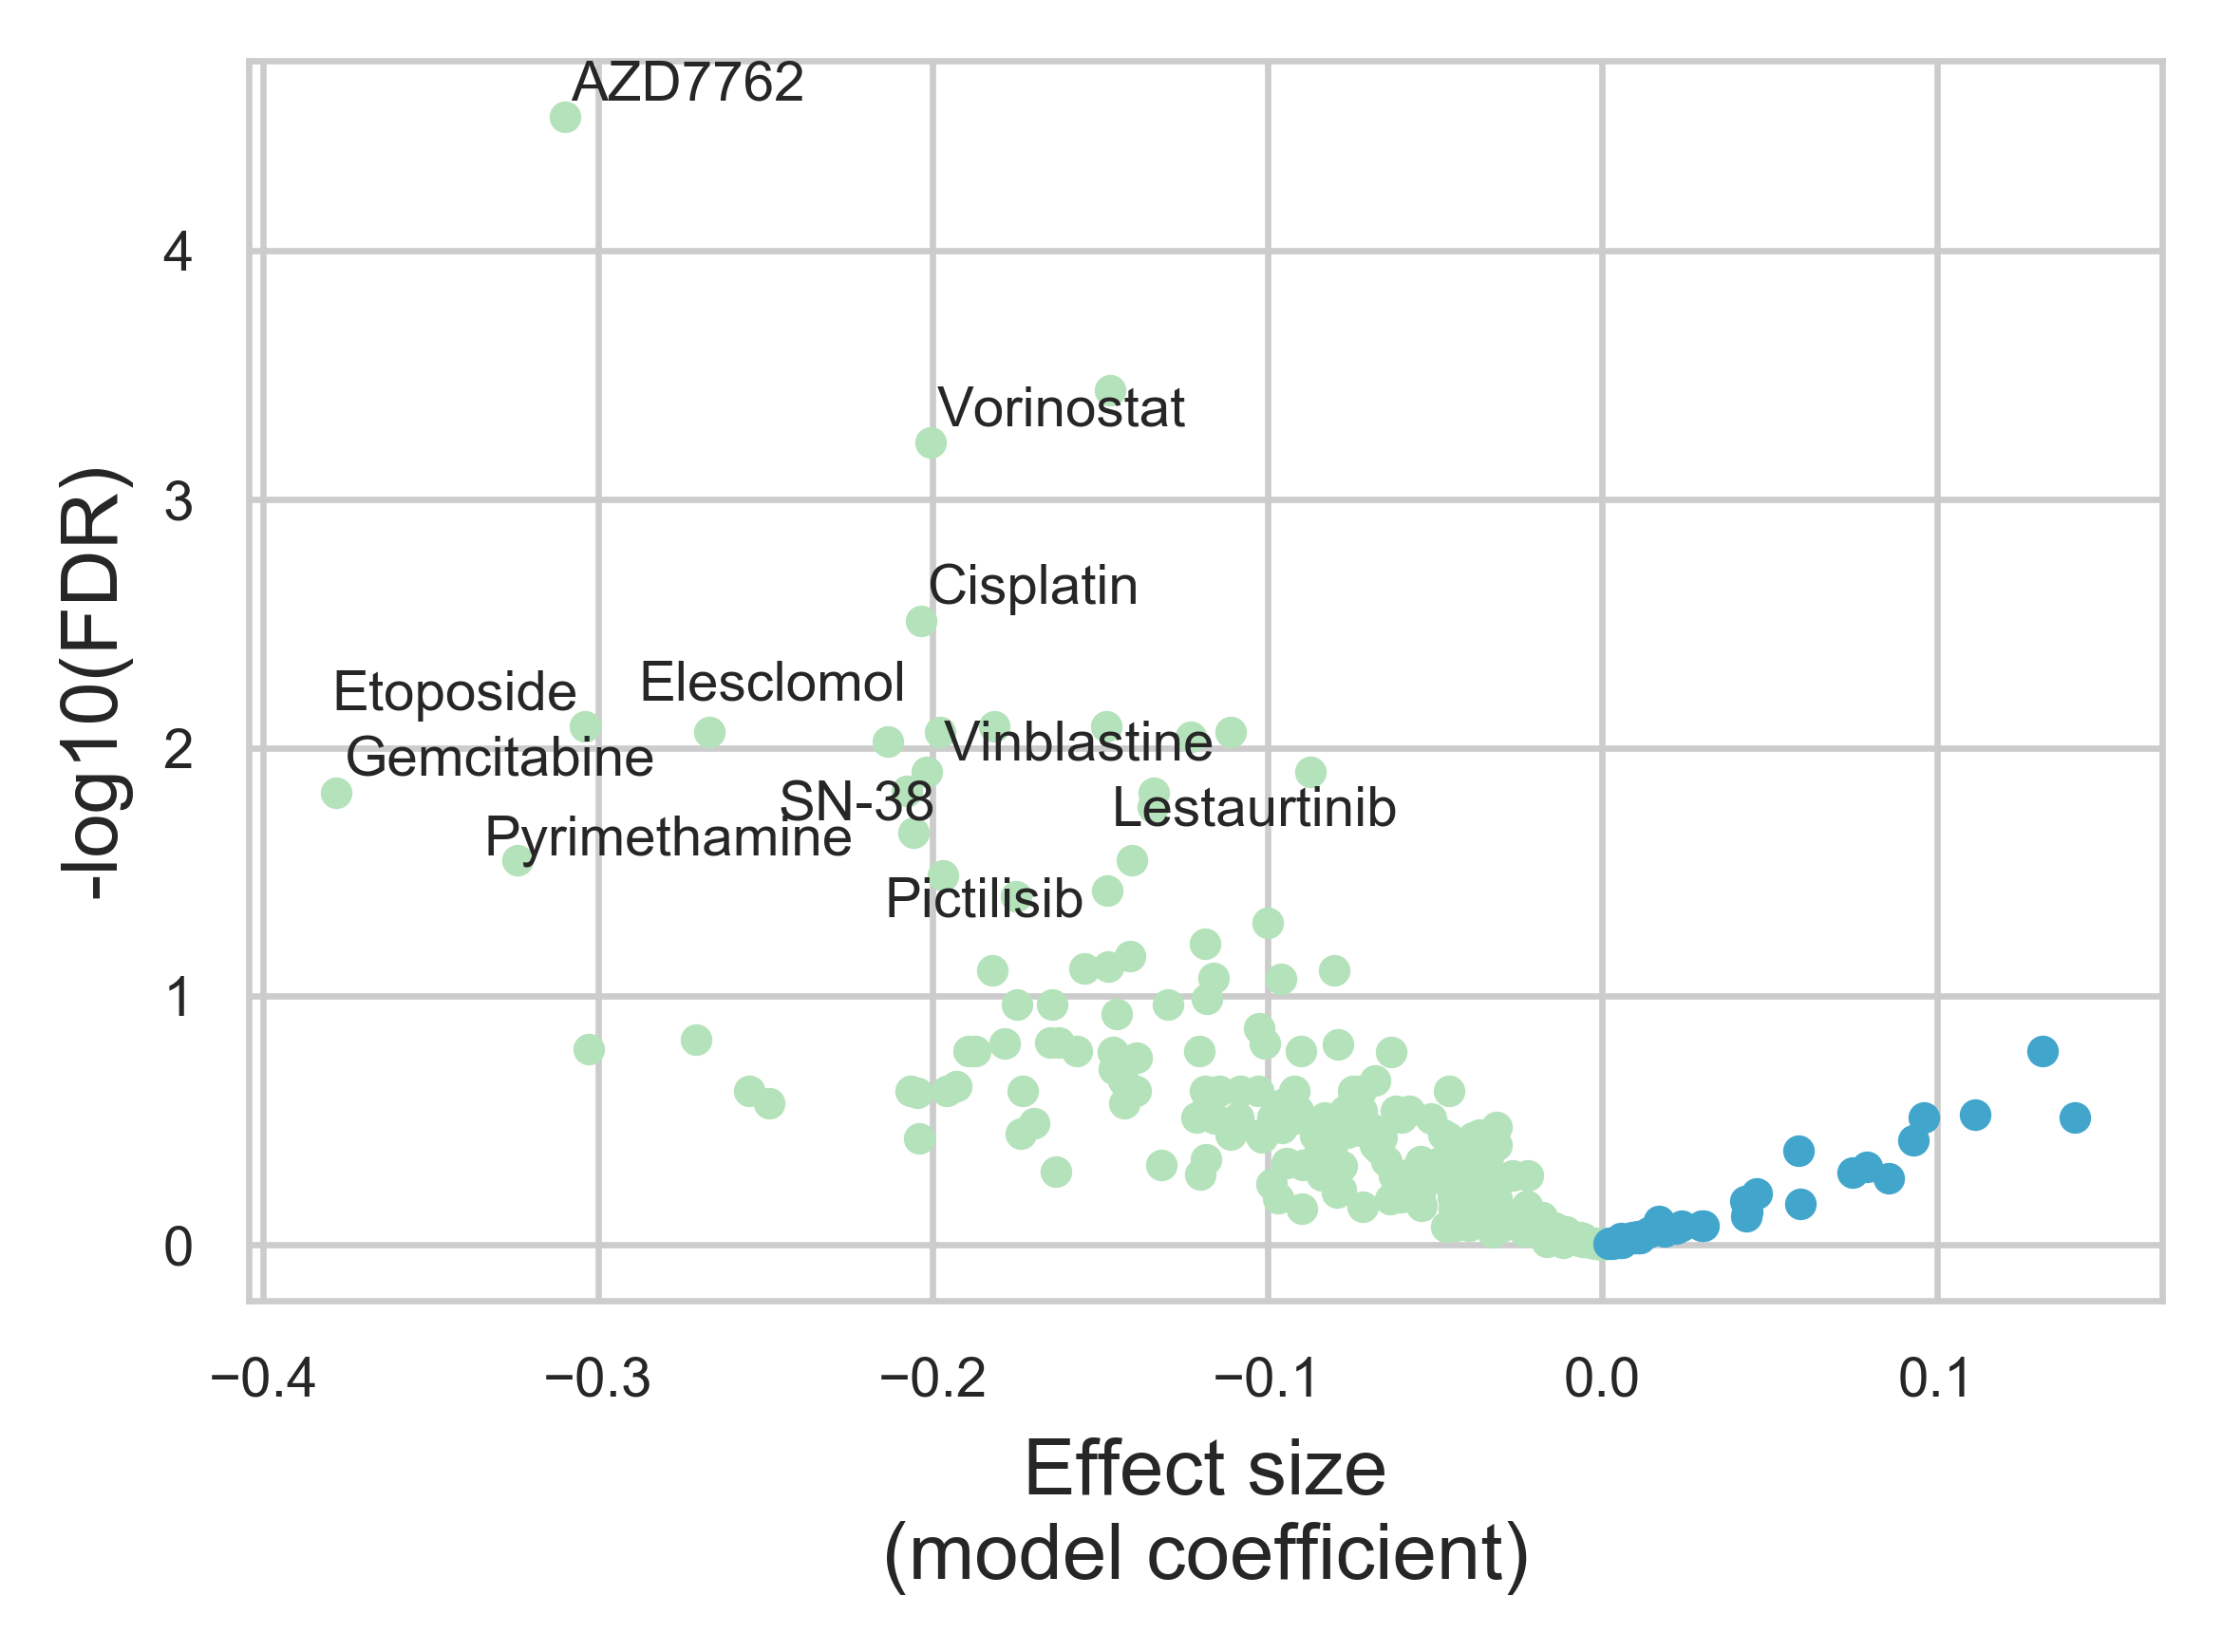

In [131]:
plt.figure(dpi=600,figsize=(4,3))
sns.set_palette('GnBu',2)
fil=sens_eff<0
plt.plot(sens_eff[fil],sens_pval[fil],'.') 
plt.plot(sens_eff[~fil],sens_pval[~fil],'.')
texts=[]
for drug in range(len(sens_pval.index)):
    if (sens_pval[drug]>1.3) & (sens_eff[drug]<-0.2):
        texts.append(plt.text(sens_eff[drug],sens_pval[drug],sens_pval.index[drug],size=7,
                    horizontalalignment='center'))
adjust_text(texts)#,arrowprops=dict(color='black',width=0.01,headwidth=0.01))
plt.xticks(size=7)
plt.yticks(size=7)
plt.xlabel('Effect size\n(model coefficient)',size=10)
plt.ylabel('-log10(FDR)',size=10)
plt.tight_layout()
plt.savefig('../figures/raw/Fig2C.pdf')

In [9]:
#compare to random signatures
sens_pval=pd.read_csv('../results/functional/linear_models/all_scores_lm_pval.csv',sep=',',
                     header=0,index_col=0)
#mulriple hypotesis testing correction
for c in sens_pval.columns:
    sens_pval[c]=multipletests(sens_pval[c],method='fdr_bh')[1]
real=['real_model']
gene_perm=sens_pval.columns[1:1001]
samp_perm=sens_pval.columns[1001:2001]
single_gene=sens_pval.columns[2001:]

In [10]:
print('Significant associations: ',np.sum(sens_pval[real]<0.05))

Significant associations:  real_model    24
dtype: int64


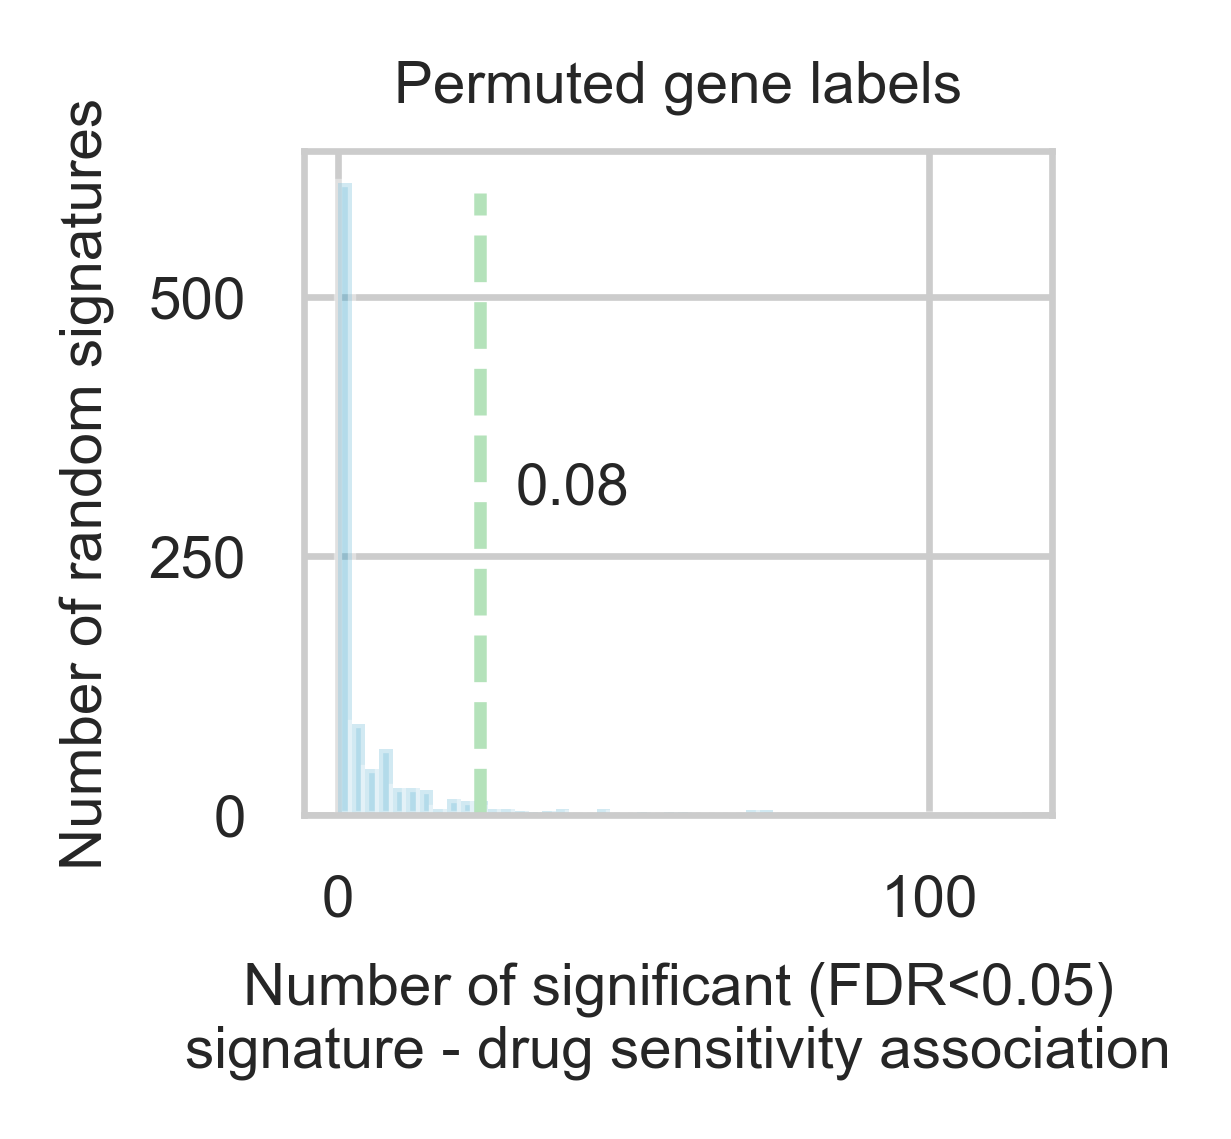

In [12]:
plt.figure(dpi=600,figsize=(2,2))
sns.set_palette('GnBu_r',2)
sns.distplot(np.sum(sens_pval[gene_perm]<0.05),kde=False)
plt.plot([24,24],[0,600],'--')
t=str(np.round(np.sum(np.sum(sens_pval[gene_perm]<0.05)>=24)/len(gene_perm),3))
plt.text(30,300,t,size=7)
plt.xticks(size=7)
plt.yticks(size=7)
plt.title('Permuted gene labels',size=7)
plt.ylabel('Number of random signatures',size=7)
plt.xlabel('Number of significant (FDR<0.05)\nsignature - drug sensitivity association',size=7)
plt.tight_layout()
plt.savefig('../figures/raw/SFig3A1.pdf')

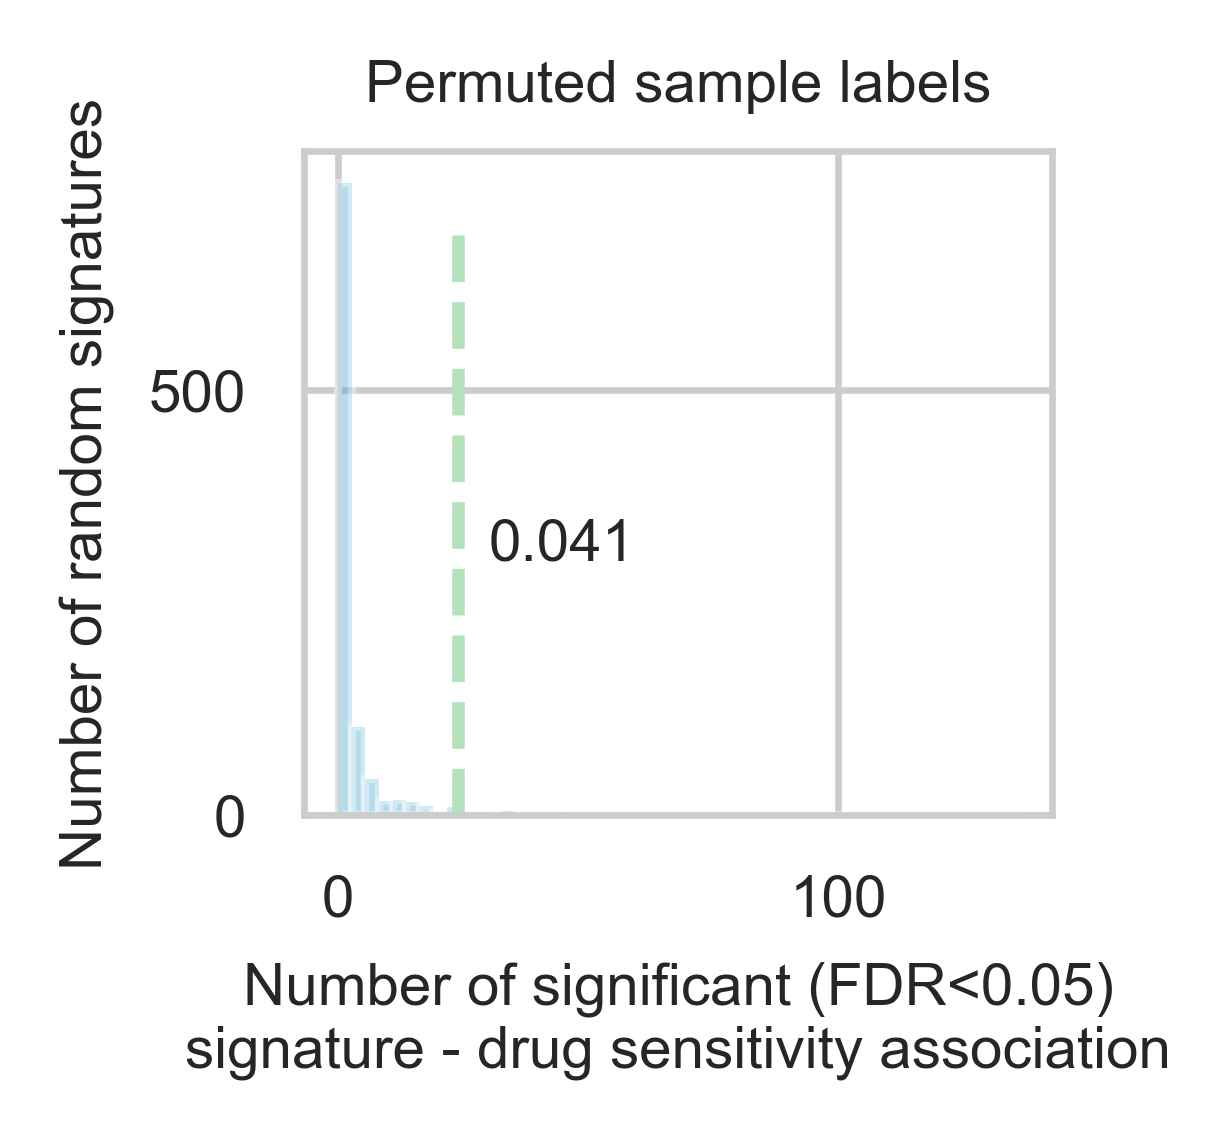

In [13]:
plt.figure(dpi=600,figsize=(2,2))
sns.set_palette('GnBu_r',2)
sns.distplot(np.sum(sens_pval[samp_perm]<0.05),kde=False)
plt.plot([24,24],[0,700],'--')
t=str(np.round(np.sum(np.sum(sens_pval[samp_perm]<0.05)>=24)/len(samp_perm),3))
plt.text(30,300,t,size=7)
plt.xticks(size=7)
plt.yticks(size=7)
plt.title('Permuted sample labels',size=7)
plt.ylabel('Number of random signatures',size=7)
plt.xlabel('Number of significant (FDR<0.05)\nsignature - drug sensitivity association',size=7)
plt.tight_layout()
plt.savefig('../figures/raw/SFig3A2.pdf')

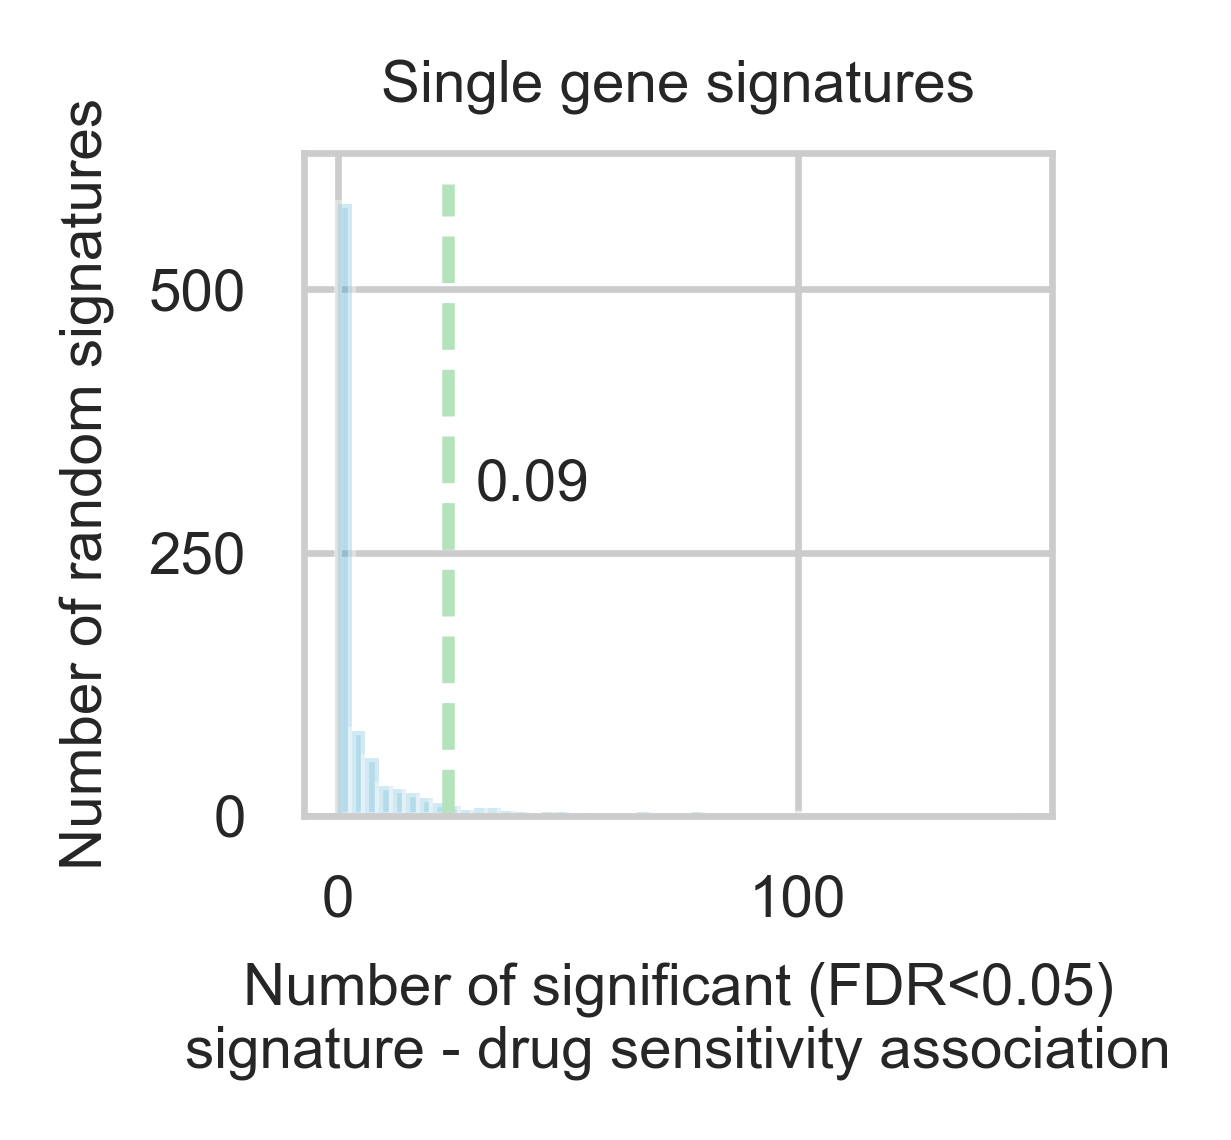

In [14]:
plt.figure(dpi=600,figsize=(2,2))
sns.set_palette('GnBu_r',2)
sns.distplot(np.sum(sens_pval[single_gene]<0.05),kde=False)
plt.plot([24,24],[0,600],'--')
t=str(np.round(np.sum(np.sum(sens_pval[single_gene]<0.05)>=24)/len(single_gene),3))
plt.text(30,300,t,size=7)
plt.xticks(size=7)
plt.yticks(size=7)
plt.title('Single gene signatures',size=7)
plt.ylabel('Number of random signatures',size=7)
plt.xlabel('Number of significant (FDR<0.05)\nsignature - drug sensitivity association',size=7)
plt.tight_layout()
plt.savefig('../figures/raw/SFig3A3.pdf')

In [2]:
# cell doubling time
scores=pd.read_csv('../results/functional/linear_models/gCSI_data.csv',sep=',',header=0,
                  index_col=0)

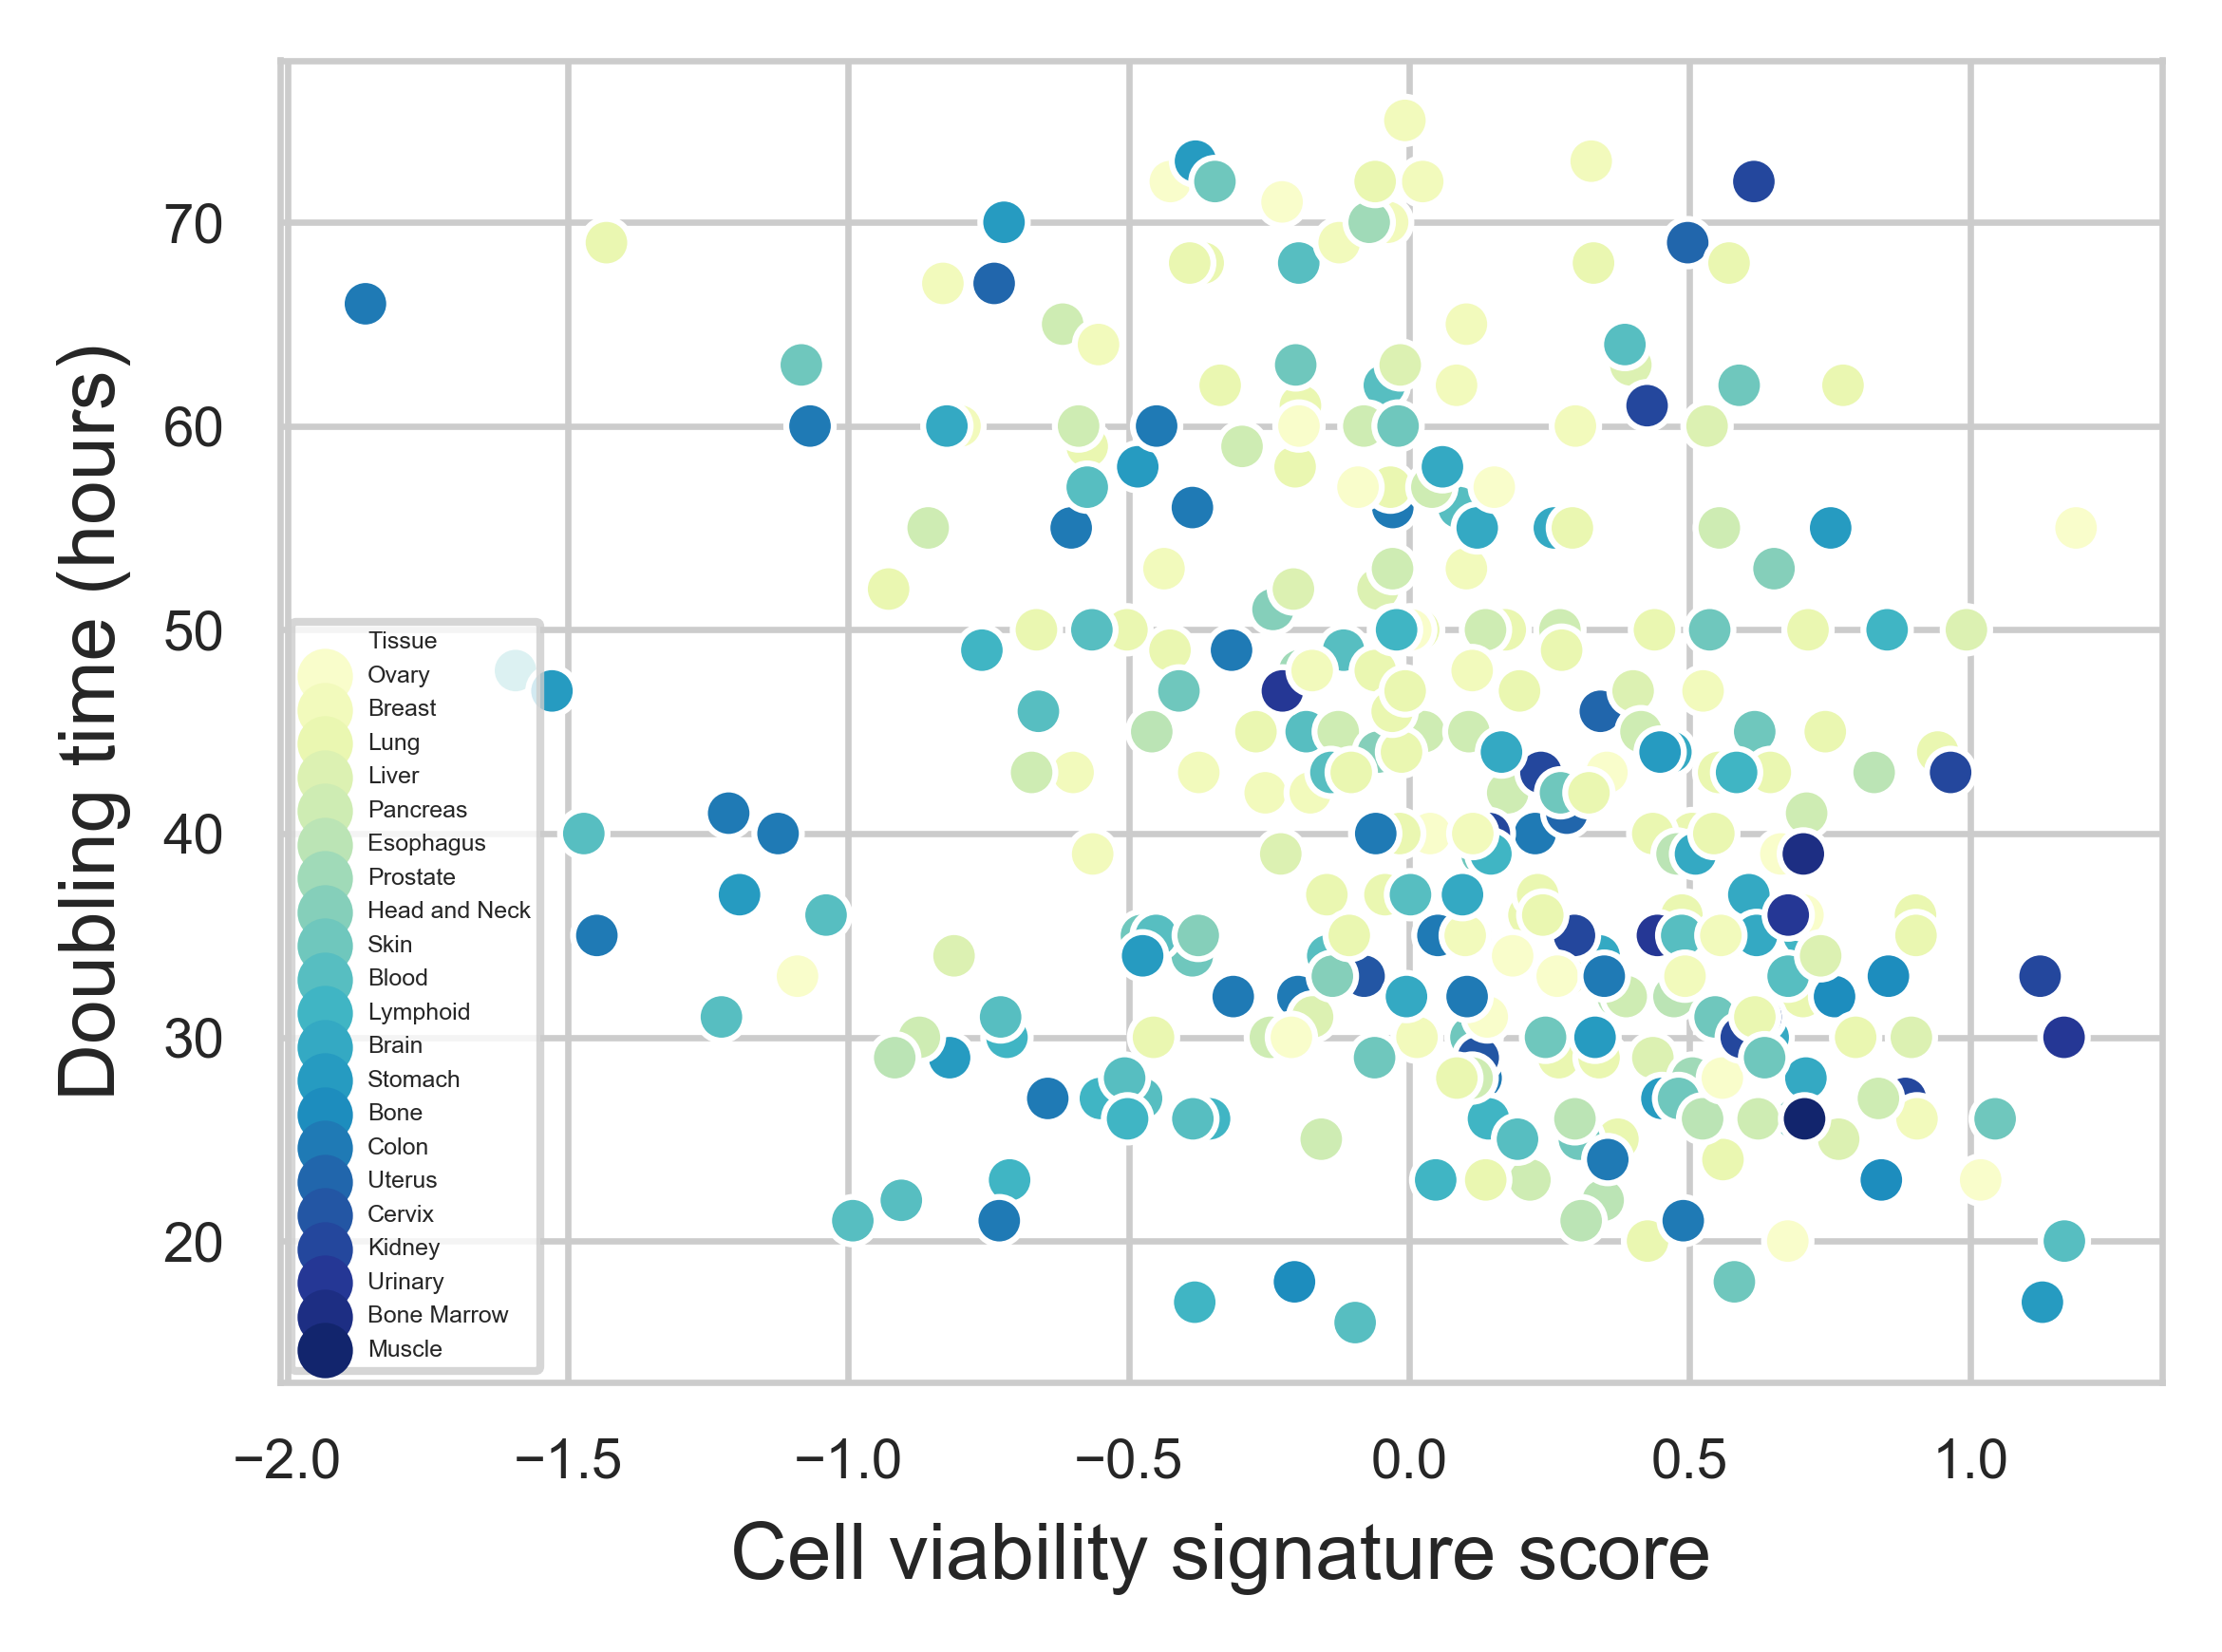

In [5]:
plt.figure(dpi=600,figsize=(4,3))
sns.set_palette('YlGnBu',len(set(scores['Tissue'])))
g=sns.scatterplot('real_model','DoublingTime',hue='Tissue',data=scores)
g.legend(loc=3, prop={'size': 3})
plt.xticks(size=7)
plt.yticks(size=7)
plt.xlabel('Cell viability signature score',size=10)
plt.ylabel('Doubling time (hours)',size=10)
plt.tight_layout()
plt.savefig('../figures/raw/Fig2E.pdf')

In [7]:
from scipy.stats import pearsonr as pcor
pcor(scores['real_model'],scores['DoublingTime'])

(-0.23485077077516023, 2.4715020523317983e-05)

In [15]:
#compare to random signatures
data=pd.read_csv('../results/functional/linear_models/gCSI_cor.csv',sep=',',
                     header=0,index_col=0)
real=['real_model']
gene_perm=data.index[1:1001]
samp_perm=data.index[1001:2001]
single_gene=data.index[2001:]

In [16]:
data.head()

cor      pcor
real_model -0.234851 -0.275201
gene_0      0.071910  0.047369
gene_1      0.052681  0.014339
gene_2     -0.049263 -0.023577
gene_3     -0.247299 -0.218360

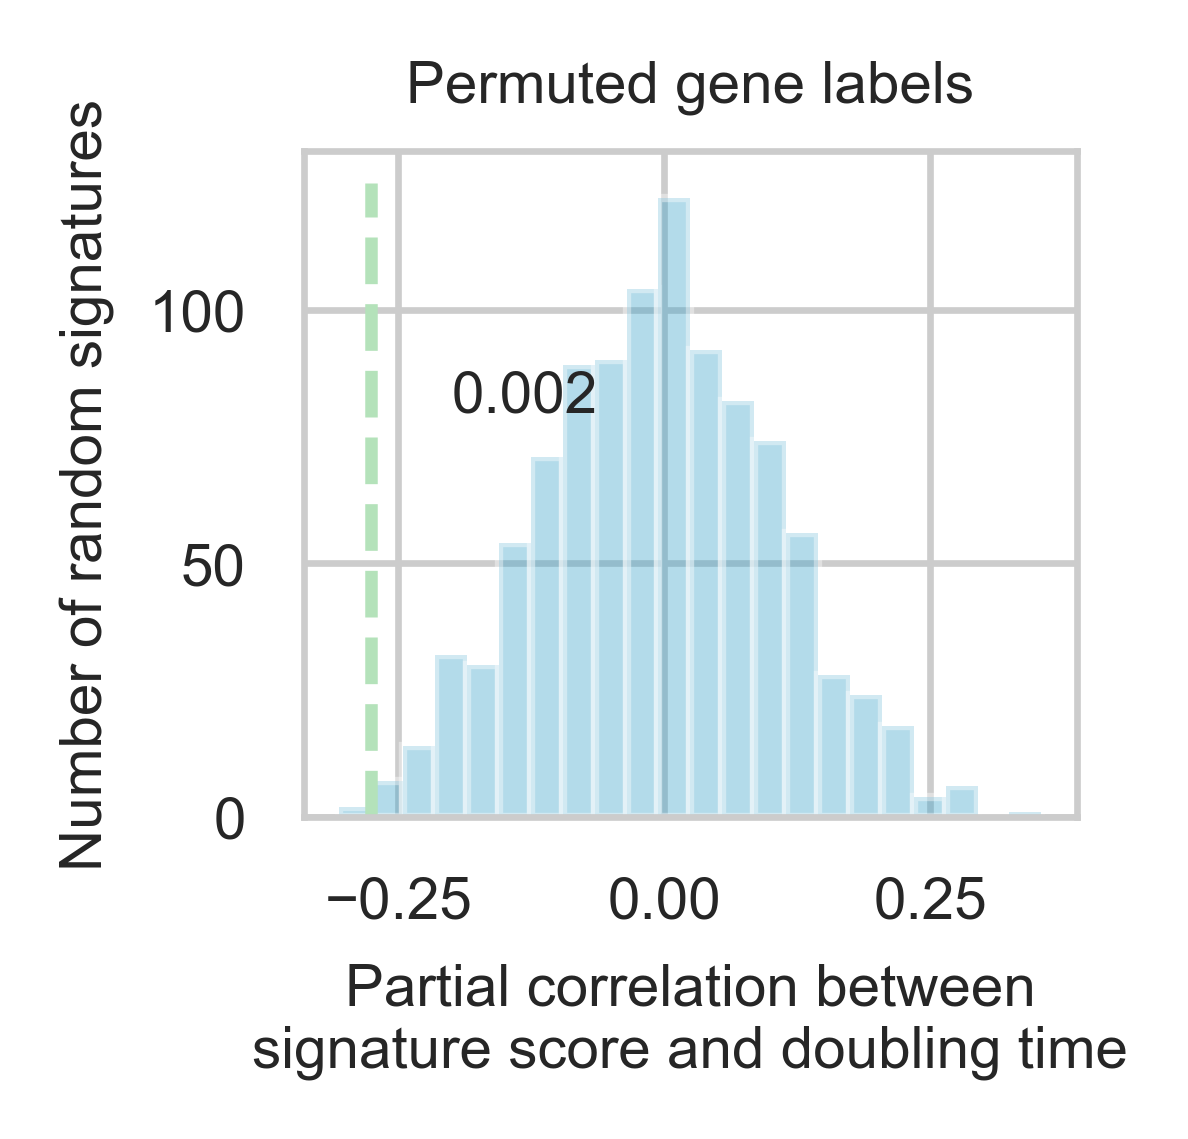

In [17]:
plt.figure(dpi=600,figsize=(2,2))
r=data.loc['real_model','pcor']
sns.set_palette('GnBu_r',2)
sns.distplot(data.loc[gene_perm,'pcor'],kde=False)
plt.plot([r,r],[0,125],'--')
t=str(np.round((np.sum(data.loc[gene_perm,'pcor']<=r)/len(gene_perm)),3))
plt.text(-0.2,80,t,size=7)
plt.xticks(size=7)
plt.yticks(size=7)
plt.title('Permuted gene labels',size=7)
plt.ylabel('Number of random signatures',size=7)
plt.xlabel('Partial correlation between\nsignature score and doubling time',size=7)
plt.tight_layout()
plt.savefig('../figures/raw/SFig3E1.pdf')

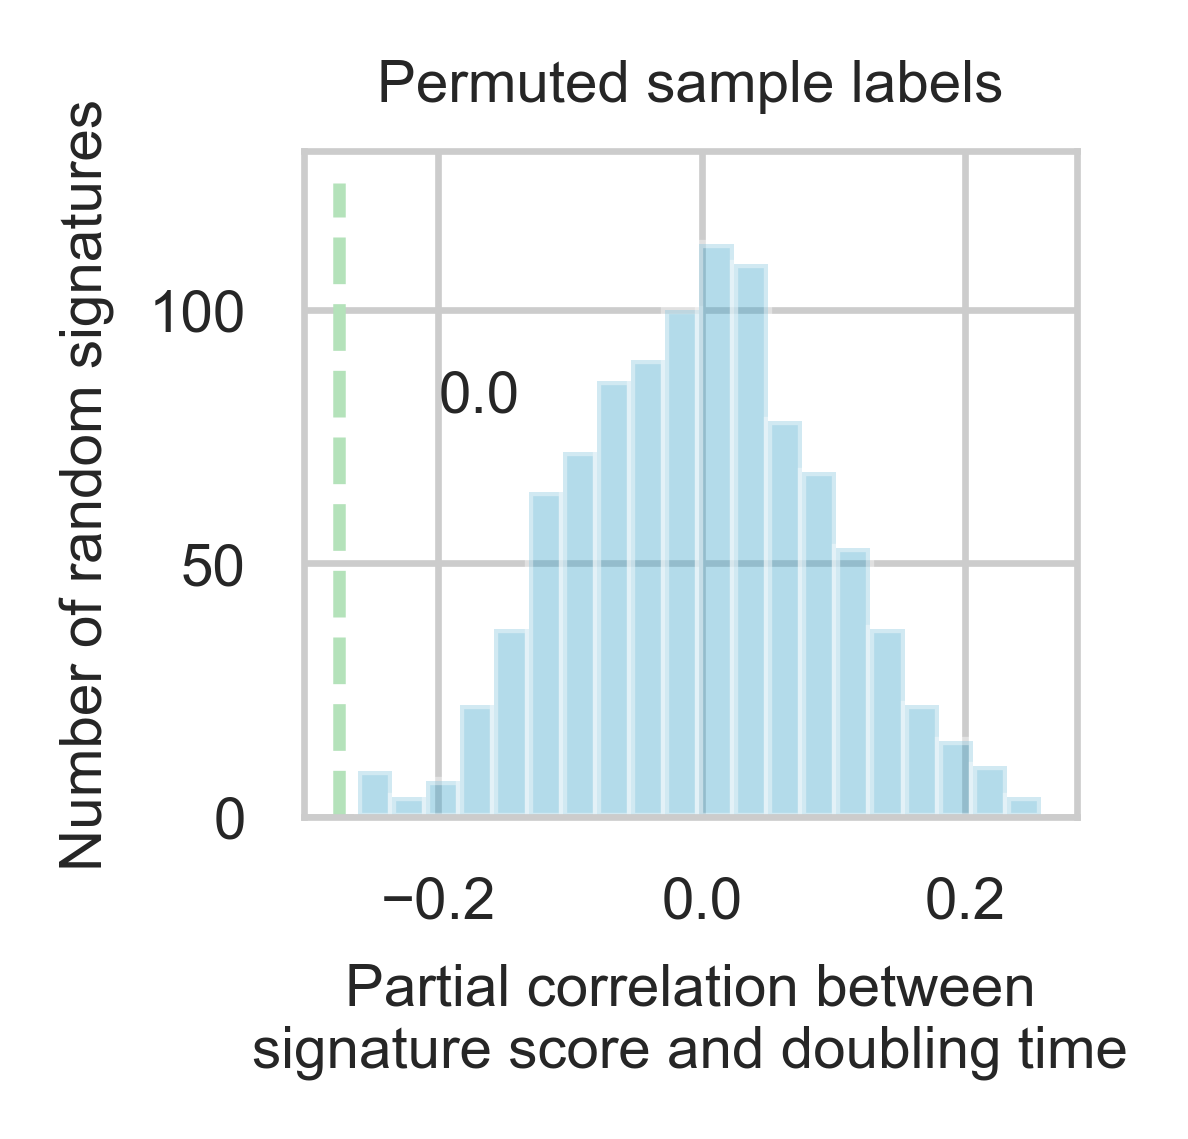

In [18]:
plt.figure(dpi=600,figsize=(2,2))
r=data.loc['real_model','pcor']
sns.set_palette('GnBu_r',2)
sns.distplot(data.loc[samp_perm,'pcor'],kde=False)
plt.plot([r,r],[0,125],'--')
t=str(np.round((np.sum(data.loc[samp_perm,'pcor']<=r)/len(samp_perm)),3))
plt.text(-0.2,80,t,size=7)
plt.xticks(size=7)
plt.yticks(size=7)
plt.title('Permuted sample labels',size=7)
plt.ylabel('Number of random signatures',size=7)
plt.xlabel('Partial correlation between\nsignature score and doubling time',size=7)
plt.tight_layout()
plt.savefig('../figures/raw/SFig3E2.pdf')

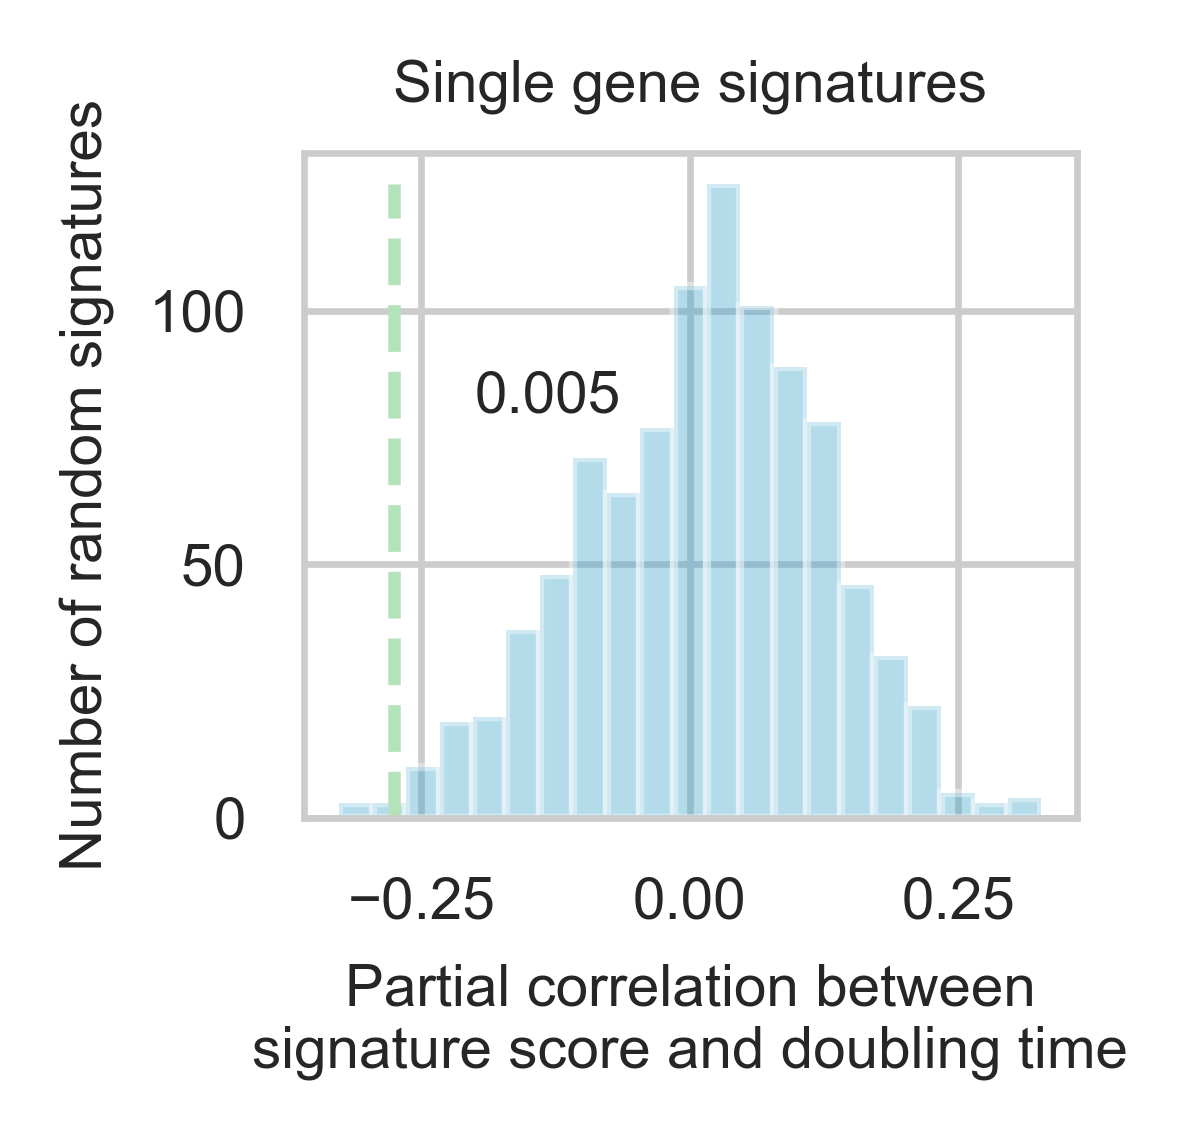

In [19]:
plt.figure(dpi=600,figsize=(2,2))
r=data.loc['real_model','pcor']
sns.set_palette('GnBu_r',2)
sns.distplot(data.loc[single_gene,'pcor'],kde=False)
plt.plot([r,r],[0,125],'--')
t=str(np.round((np.sum(data.loc[single_gene,'pcor']<=r)/len(single_gene)),3))
plt.text(-0.2,80,t,size=7)
plt.xticks(size=7)
plt.yticks(size=7)
plt.title('Single gene signatures',size=7)
plt.ylabel('Number of random signatures',size=7)
plt.xlabel('Partial correlation between\nsignature score and doubling time',size=7)
plt.tight_layout()
plt.savefig('../figures/raw/SFig3E3.pdf')

In [75]:
#histology histogram
scores=pd.read_csv('../results/functional/linear_models/gCSI_data.csv',sep=',',header=0,
                  index_col=0)

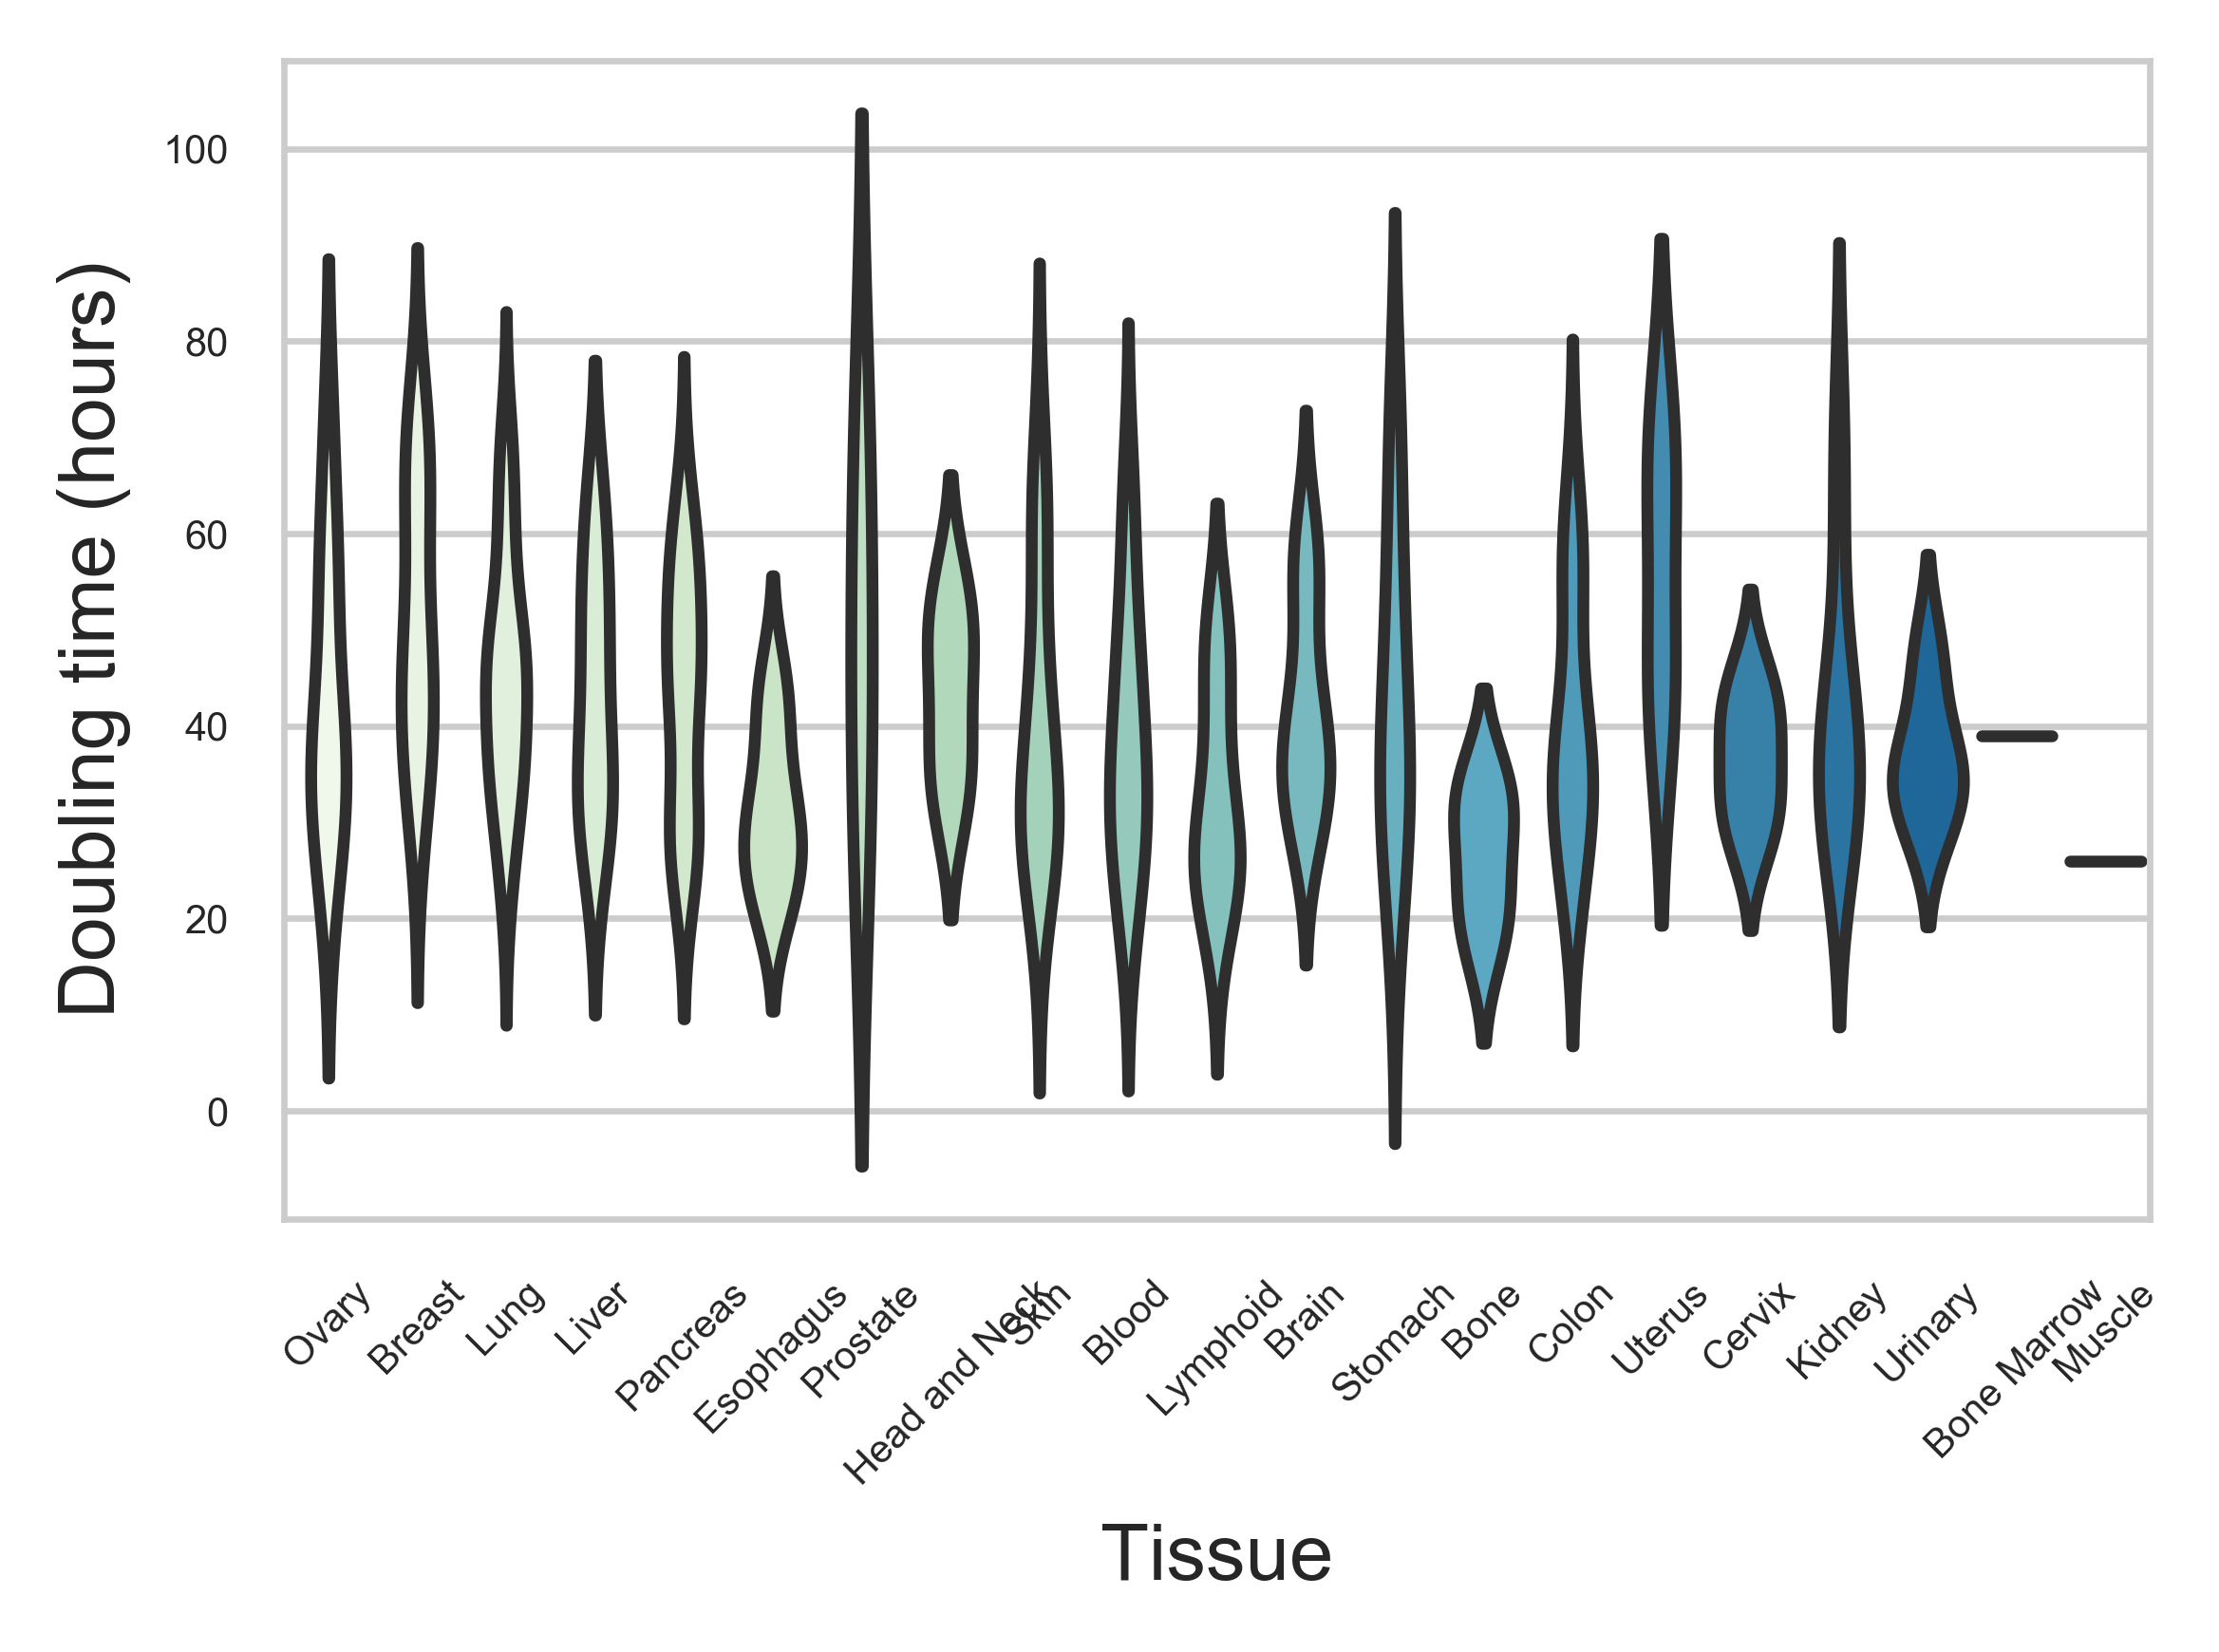

In [81]:
plt.figure(dpi=600,figsize=(4,3))
sns.set_palette('GnBu',len(set(scores['Tissue'])))
sns.violinplot(x='Tissue',y='DoublingTime',data=scores,inner=None)
plt.xticks(rotation=45)
plt.xticks(size=5)
plt.yticks(size=5)
plt.xlabel('Tissue',size=10)
plt.ylabel('Doubling time (hours)',size=10)
plt.tight_layout()
plt.savefig('../figures/raw/SFig3C.pdf')

In [10]:
#General level of drug sensitivity
scores=pd.read_csv('../results/functional/linear_models/GLDS_data.csv',sep=',',header=0,
                  index_col=0)

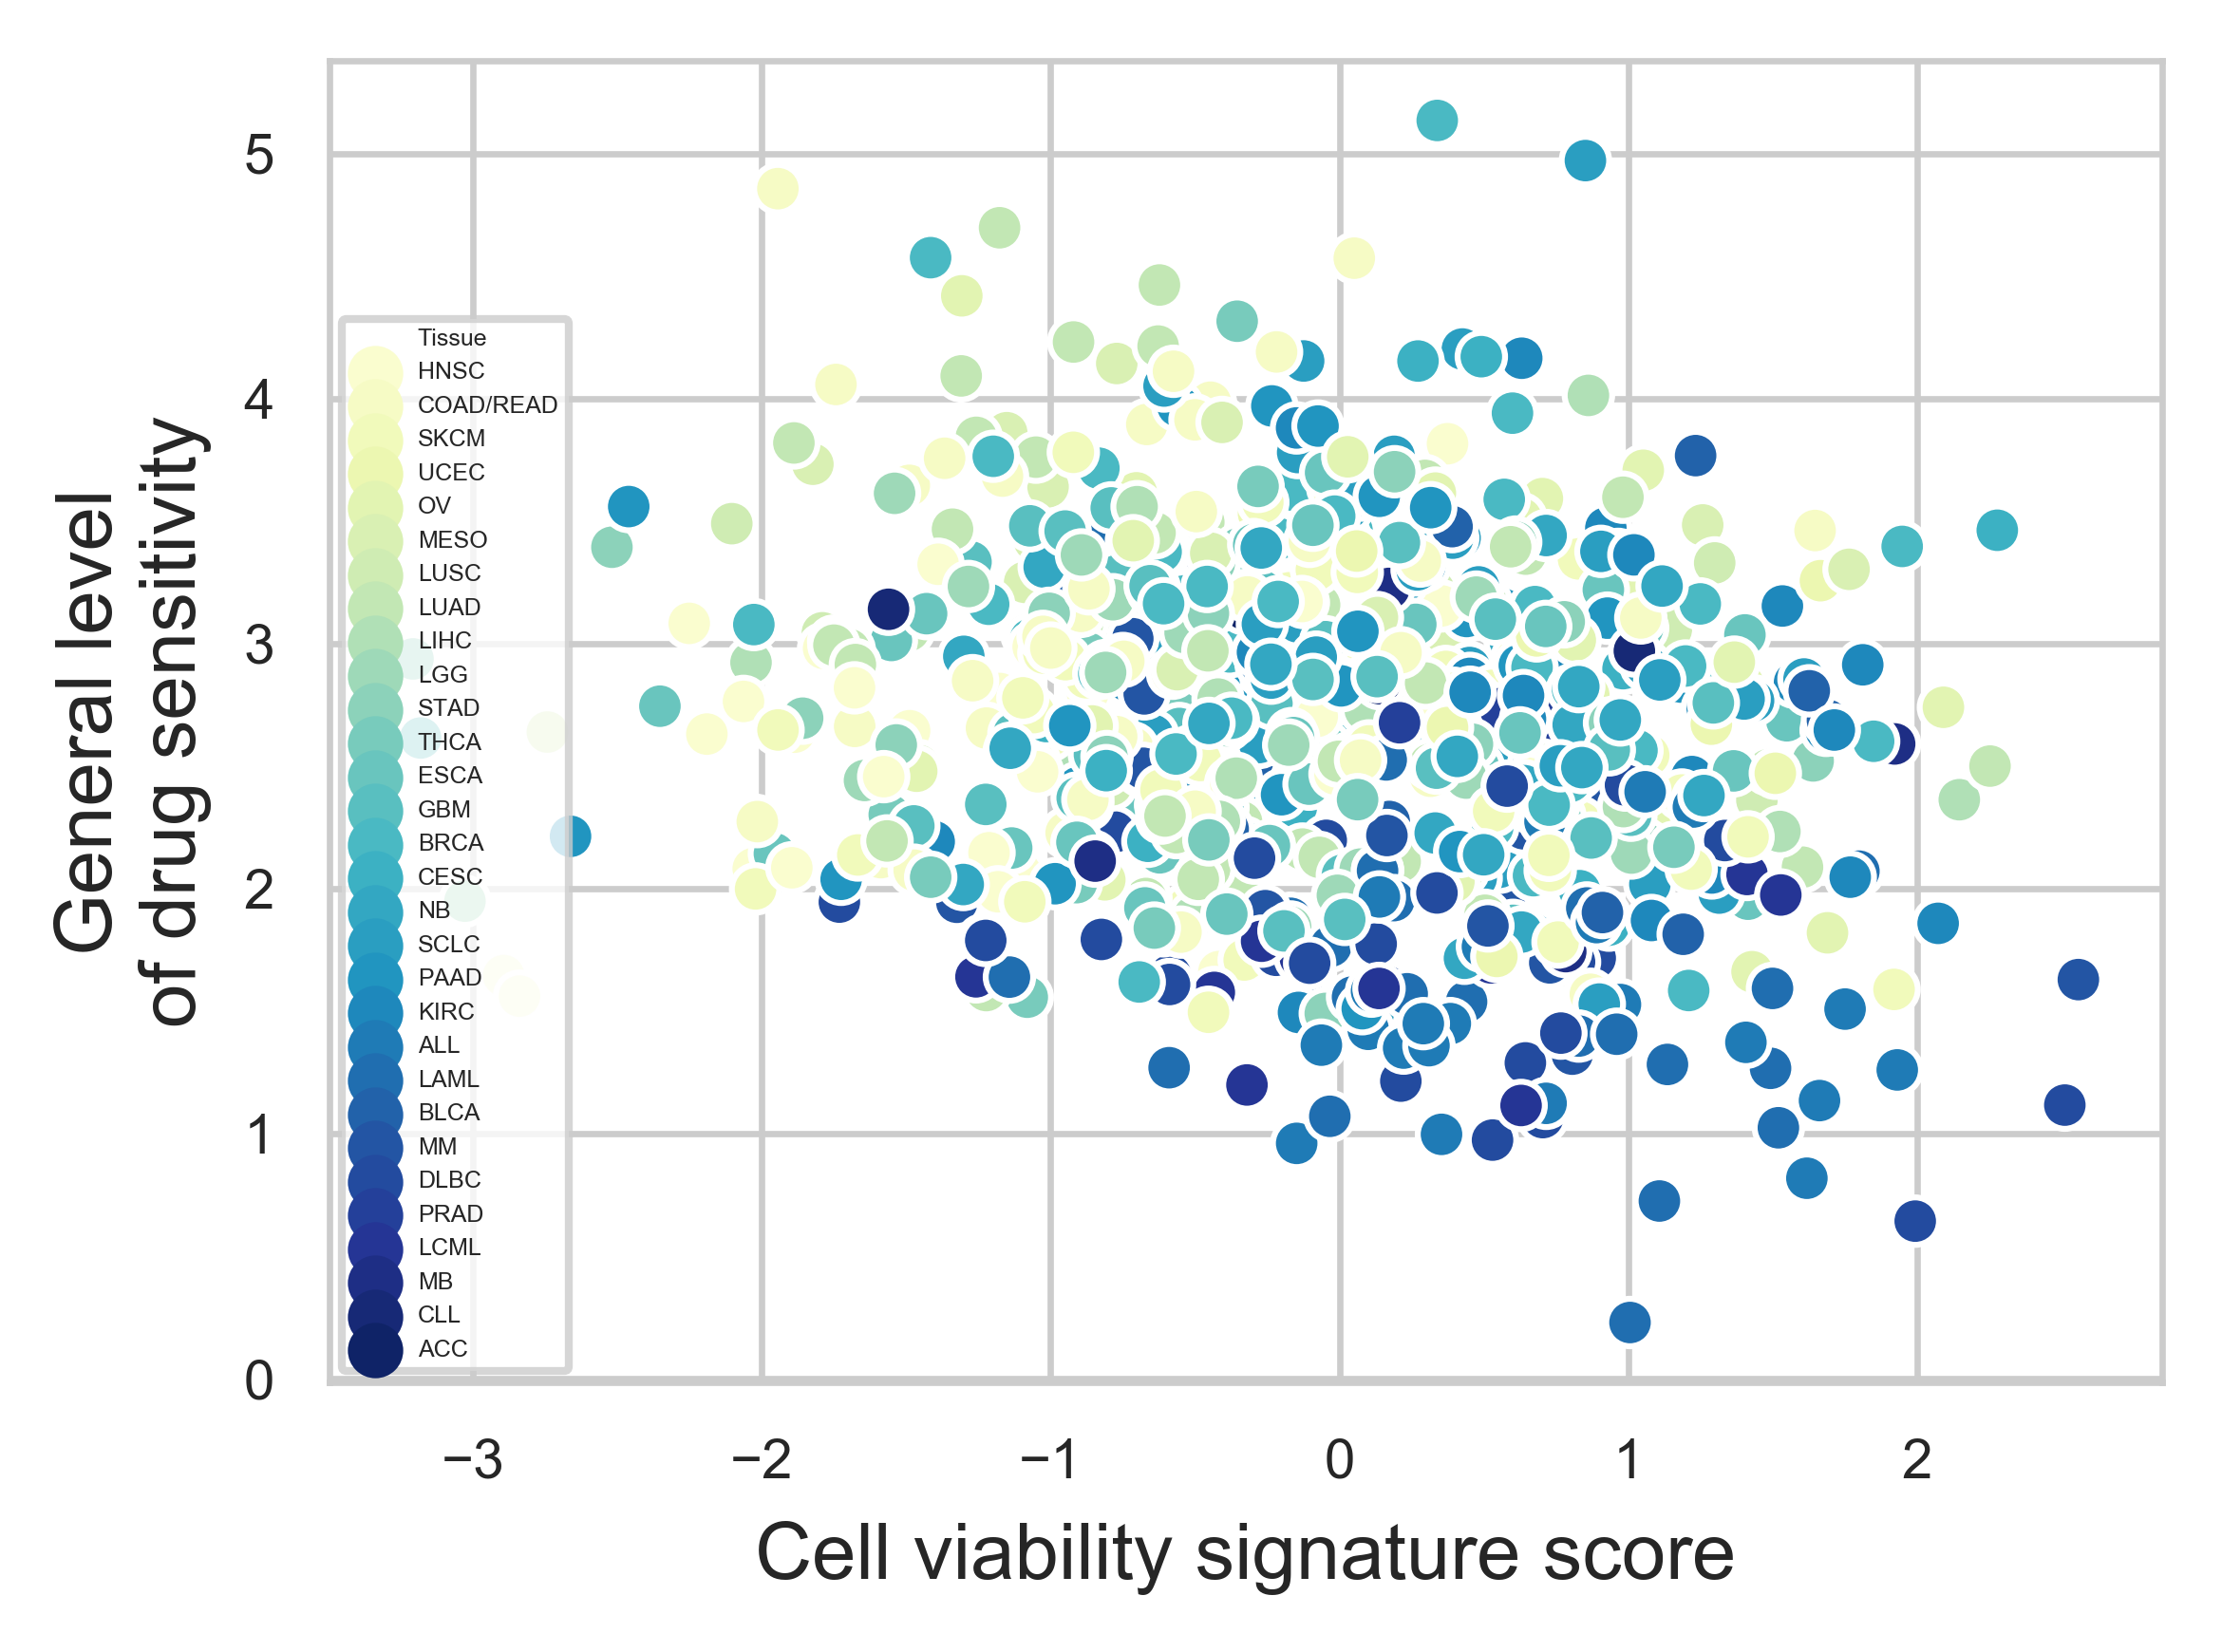

In [11]:
plt.figure(dpi=600,figsize=(4,3))
sns.set_palette('YlGnBu',len(set(scores['Tissue'])))
g=sns.scatterplot('real_model','GLDS',hue='Tissue',data=scores)
g.legend(loc=3, prop={'size': 3})
plt.xticks(size=7)
plt.yticks(size=7)
plt.xlabel('Cell viability signature score',size=10)
plt.ylabel('General level\nof drug sensitivity',size=10)
plt.tight_layout()
plt.savefig('../figures/raw/Fig2D.pdf')

In [17]:
pcor(scores['real_model'],scores['GLDS'])

(-0.18002249818215119, 5.0299695851395447e-07)

In [20]:
#compare to random signatures
data=pd.read_csv('../results/functional/linear_models/GLDS_cor.csv',sep=',',
                     header=0,index_col=0)
real=['real_model']
gene_perm=data.index[1:1001]
samp_perm=data.index[1001:2001]
single_gene=data.index[2001:]

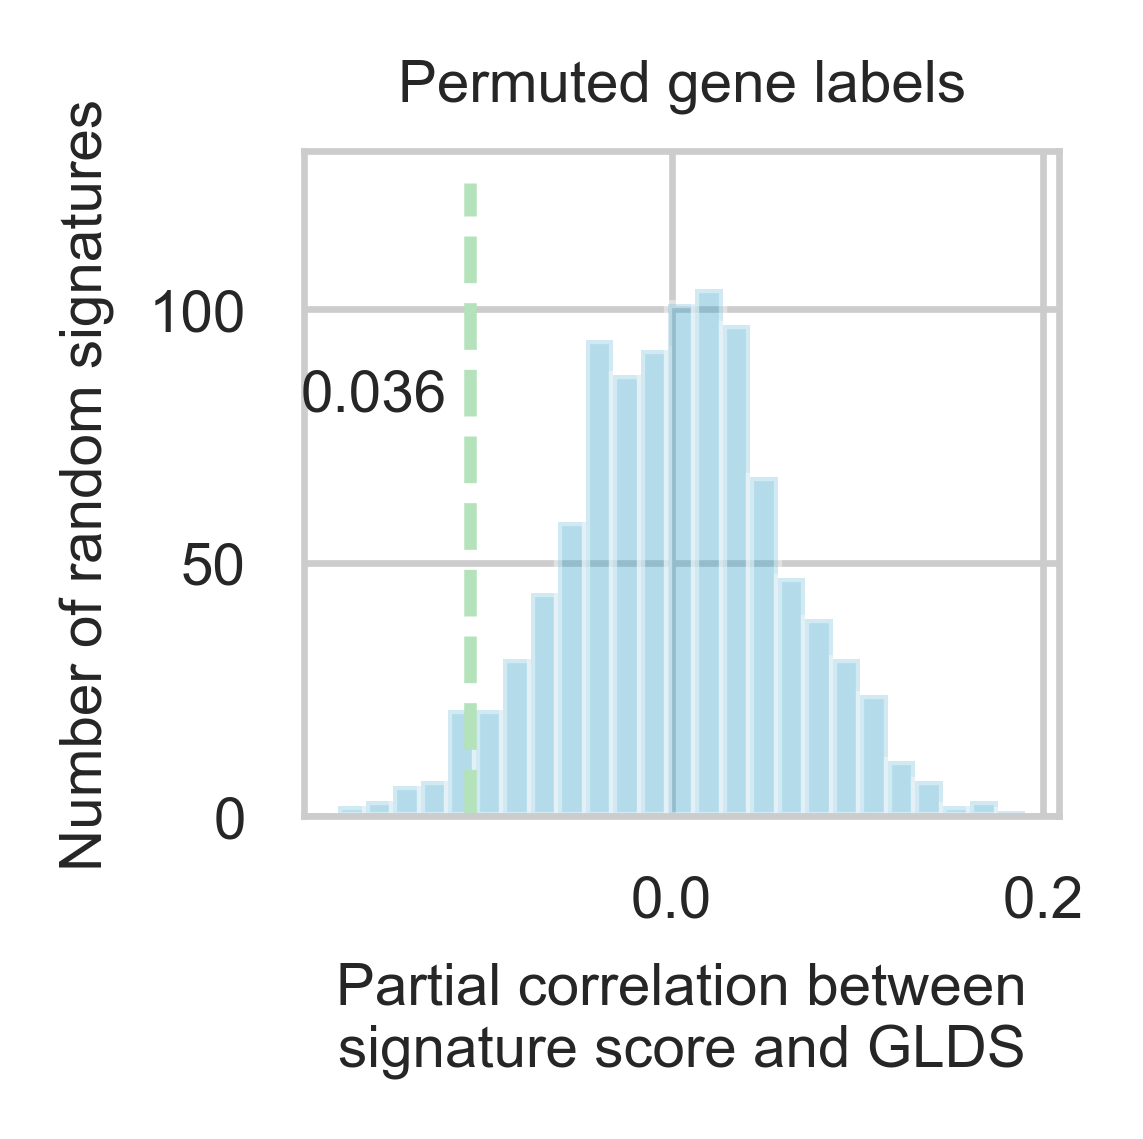

In [21]:
plt.figure(dpi=600,figsize=(2,2))
r=data.loc['real_model','pcor']
sns.set_palette('GnBu_r',2)
sns.distplot(data.loc[gene_perm,'pcor'],kde=False)
plt.plot([r,r],[0,125],'--')
t=str(np.round((np.sum(data.loc[gene_perm,'pcor']<=r)/len(gene_perm)),3))
plt.text(-0.2,80,t,size=7)
plt.xticks(size=7)
plt.yticks(size=7)
plt.title('Permuted gene labels',size=7)
plt.ylabel('Number of random signatures',size=7)
plt.xlabel('Partial correlation between\nsignature score and GLDS',size=7)
plt.tight_layout()
plt.savefig('../figures/raw/SFig3D1.pdf')

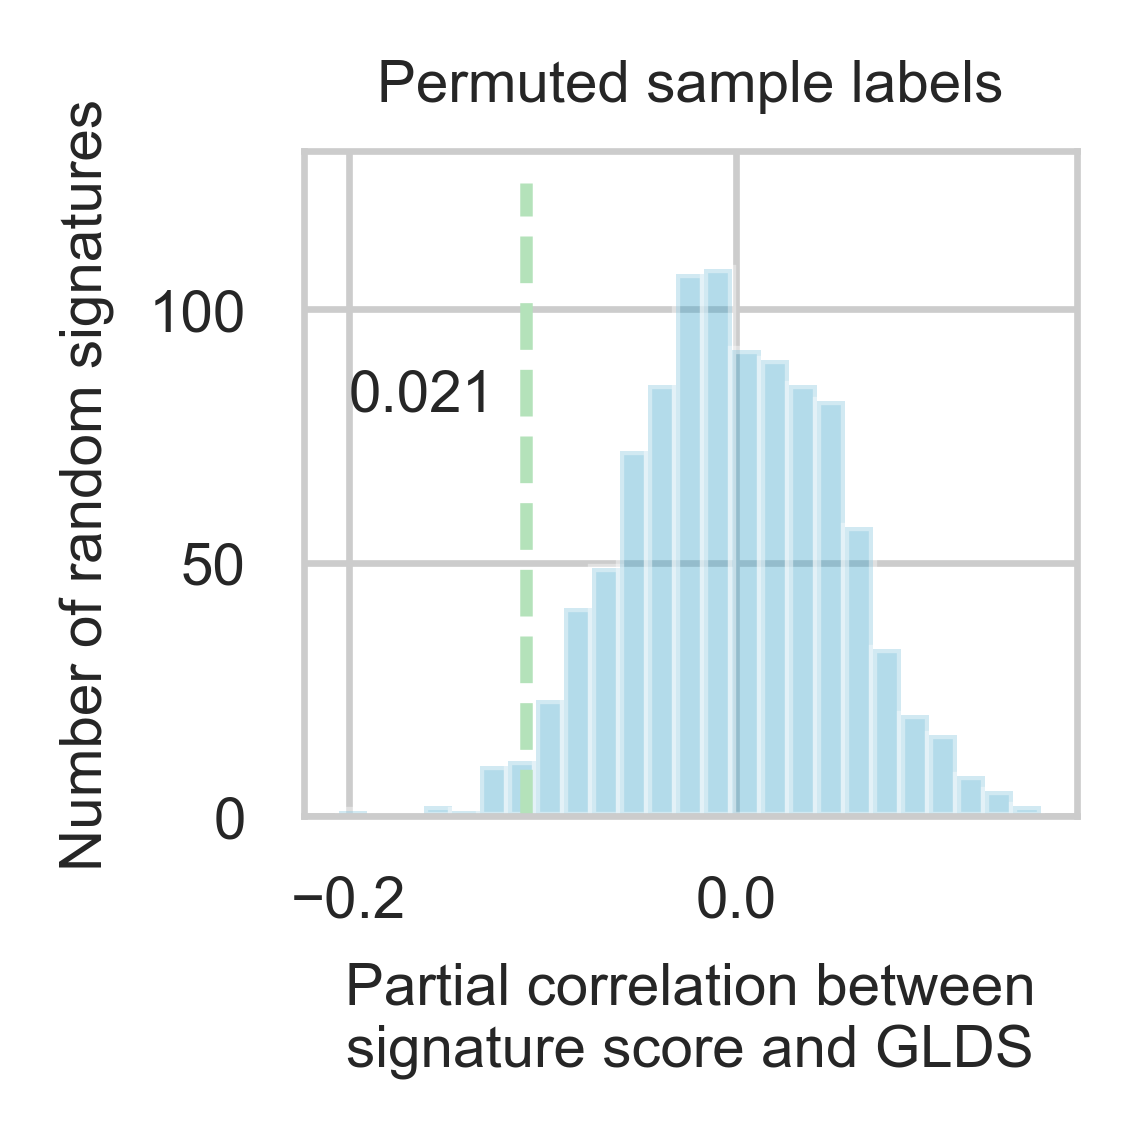

In [22]:
plt.figure(dpi=600,figsize=(2,2))
r=data.loc['real_model','pcor']
sns.set_palette('GnBu_r',2)
sns.distplot(data.loc[samp_perm,'pcor'],kde=False)
plt.plot([r,r],[0,125],'--')
t=str(np.round((np.sum(data.loc[samp_perm,'pcor']<=r)/len(samp_perm)),3))
plt.text(-0.2,80,t,size=7)
plt.xticks(size=7)
plt.yticks(size=7)
plt.title('Permuted sample labels',size=7)
plt.ylabel('Number of random signatures',size=7)
plt.xlabel('Partial correlation between\nsignature score and GLDS',size=7)
plt.tight_layout()
plt.savefig('../figures/raw/SFig3D2.pdf')

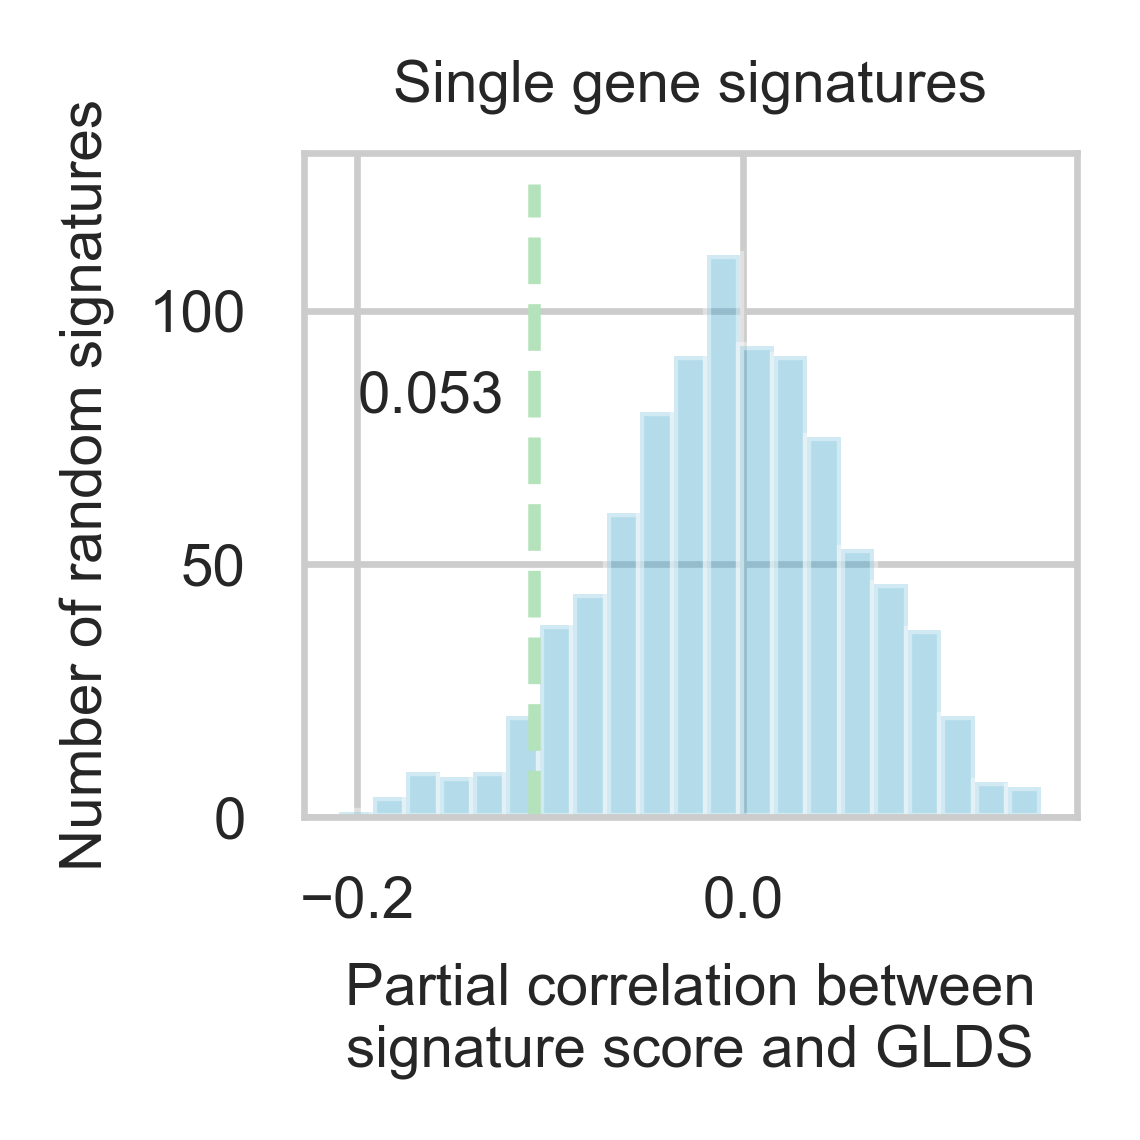

In [23]:
plt.figure(dpi=600,figsize=(2,2))
r=data.loc['real_model','pcor']
sns.set_palette('GnBu_r',2)
sns.distplot(data.loc[single_gene,'pcor'],kde=False)
plt.plot([r,r],[0,125],'--')
t=str(np.round((np.sum(data.loc[single_gene,'pcor']<=r)/len(single_gene)),3))
plt.text(-0.2,80,t,size=7)
plt.xticks(size=7)
plt.yticks(size=7)
plt.title('Single gene signatures',size=7)
plt.ylabel('Number of random signatures',size=7)
plt.xlabel('Partial correlation between\nsignature score and GLDS',size=7)
plt.tight_layout()
plt.savefig('../figures/raw/SFig3D3.pdf')

In [82]:
#histology histogram
scores=pd.read_csv('../results/functional/linear_models/GLDS_data.csv',sep=',',header=0,
                  index_col=0)

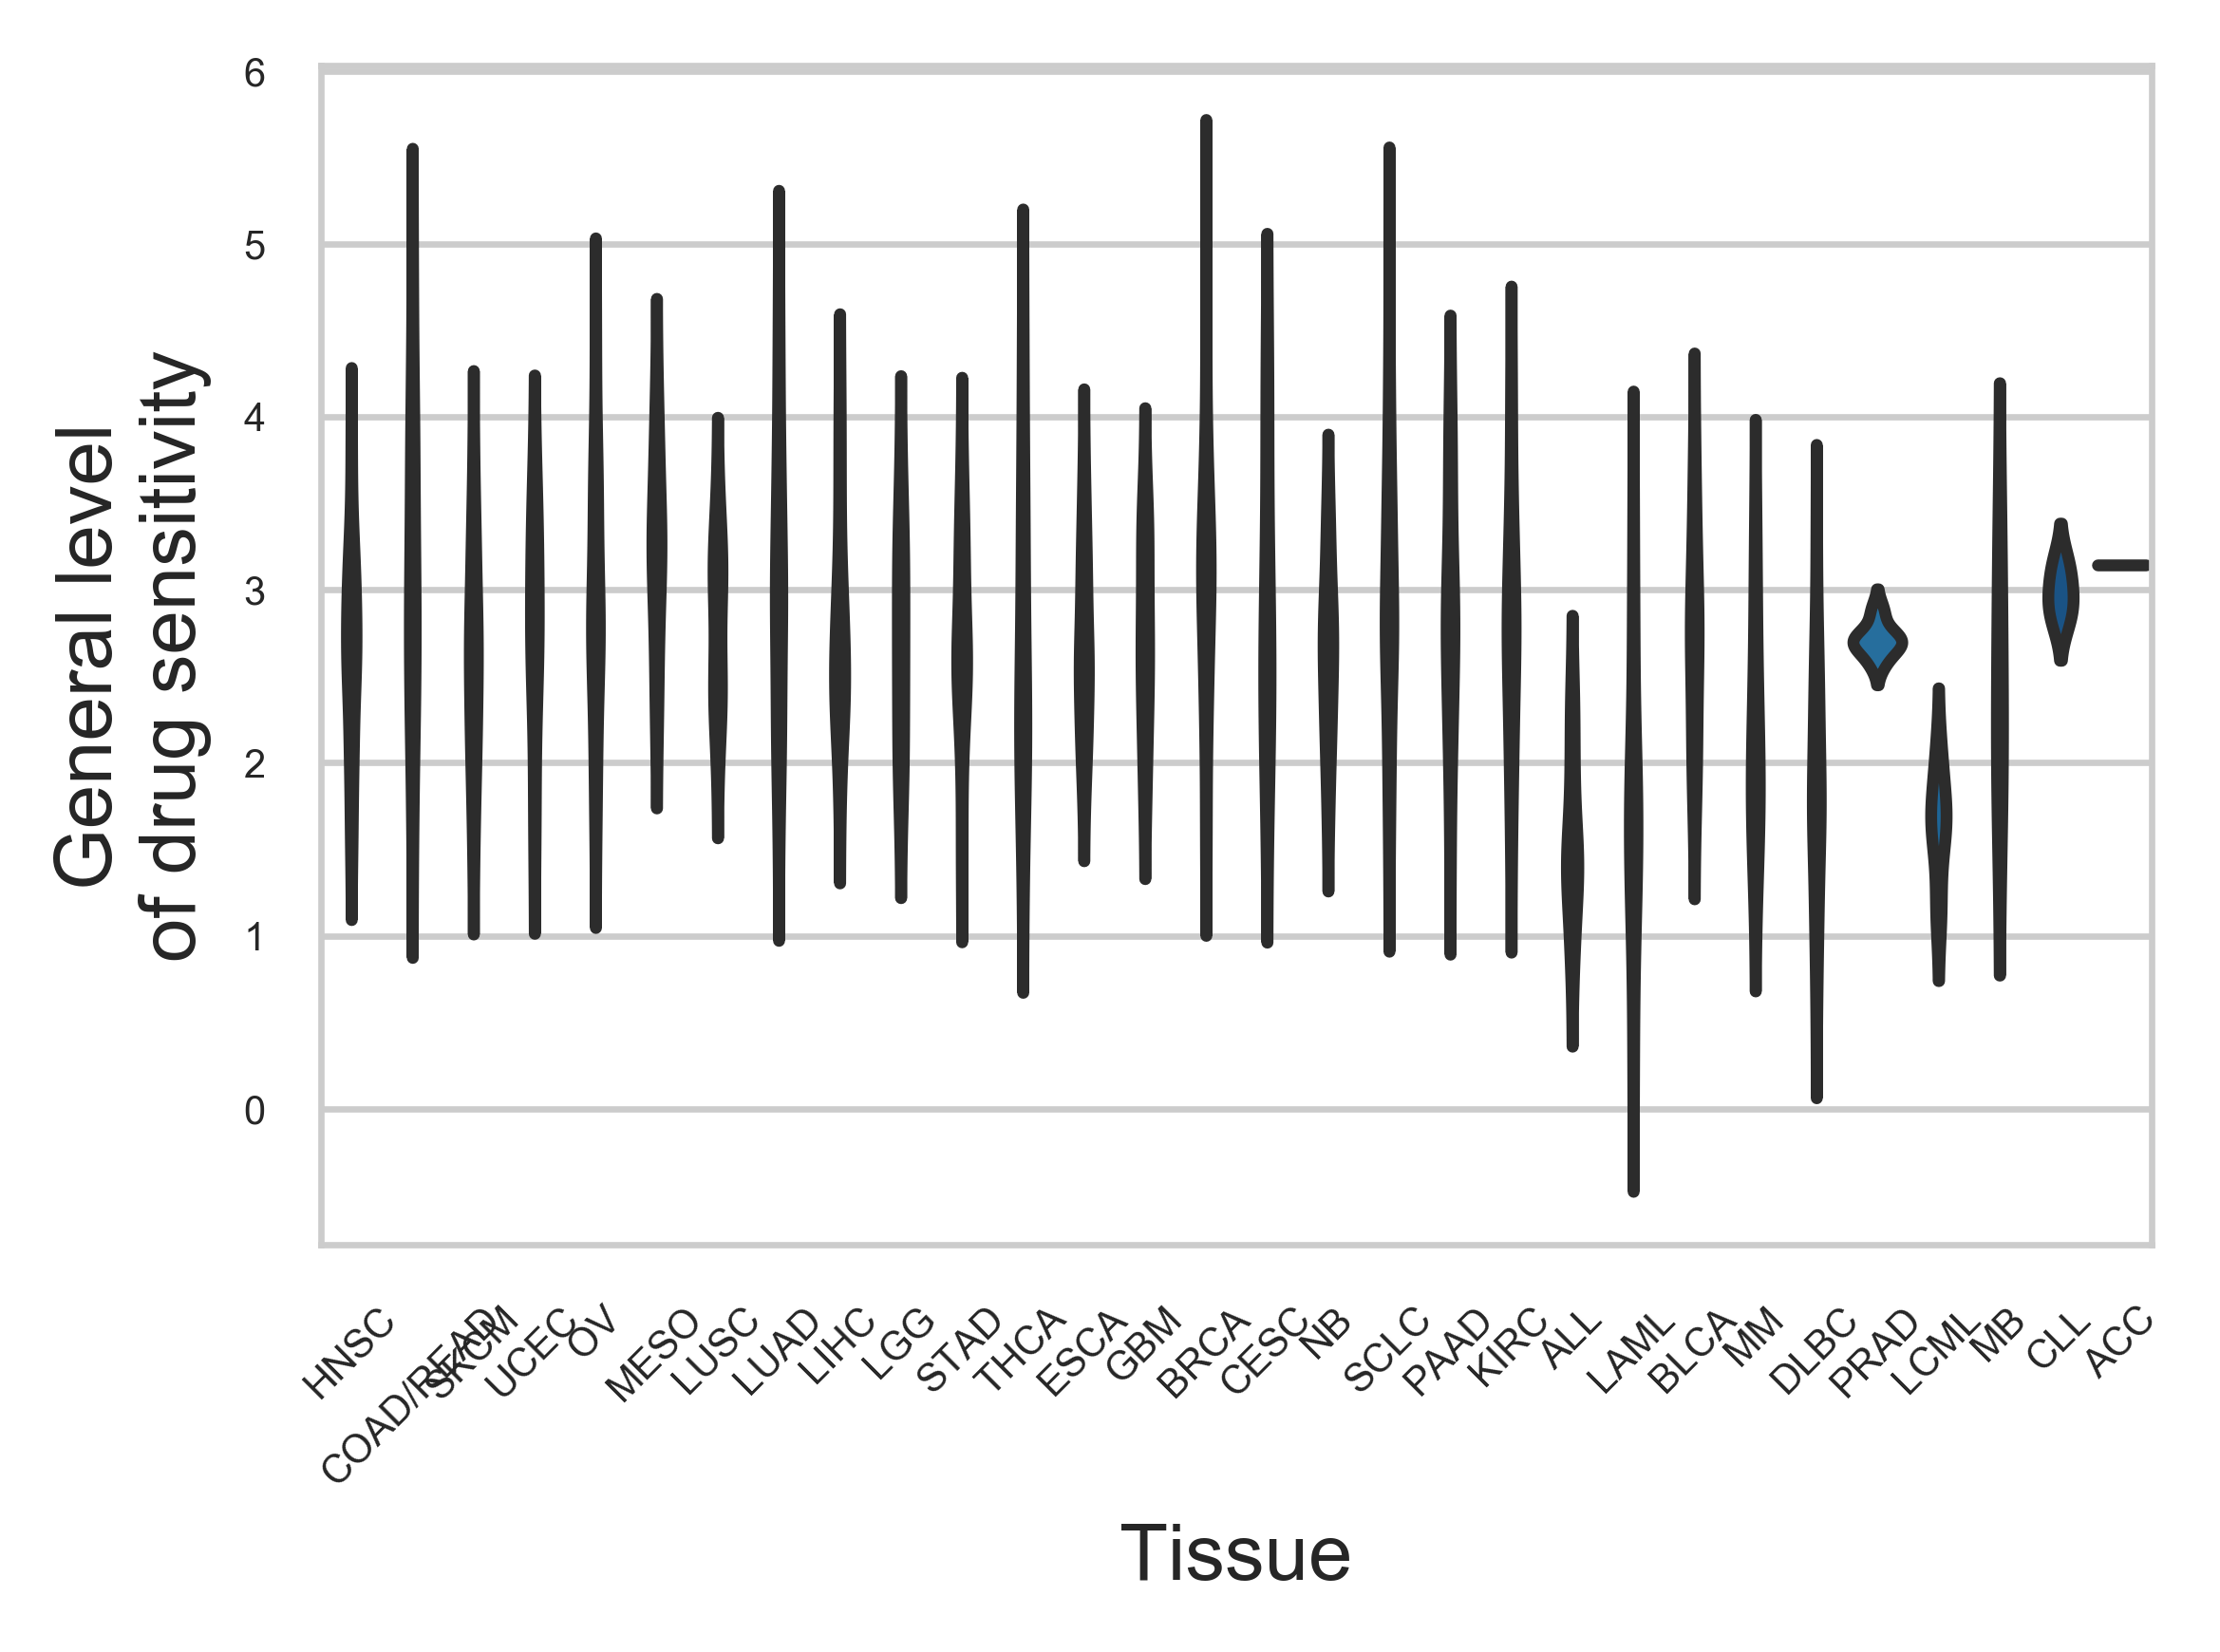

In [83]:
plt.figure(dpi=600,figsize=(4,3))
sns.set_palette('GnBu',len(set(scores['Tissue'])))
sns.violinplot(x='Tissue',y='GLDS',data=scores,inner=None)
plt.xticks(rotation=45)
plt.xticks(size=5)
plt.yticks(size=5)
plt.xlabel('Tissue',size=10)
plt.ylabel('General level\nof drug sensitivity',size=10)
plt.tight_layout()
plt.savefig('../figures/raw/SFig3B.pdf')

In [28]:
from scipy.stats import pearsonr as pcor

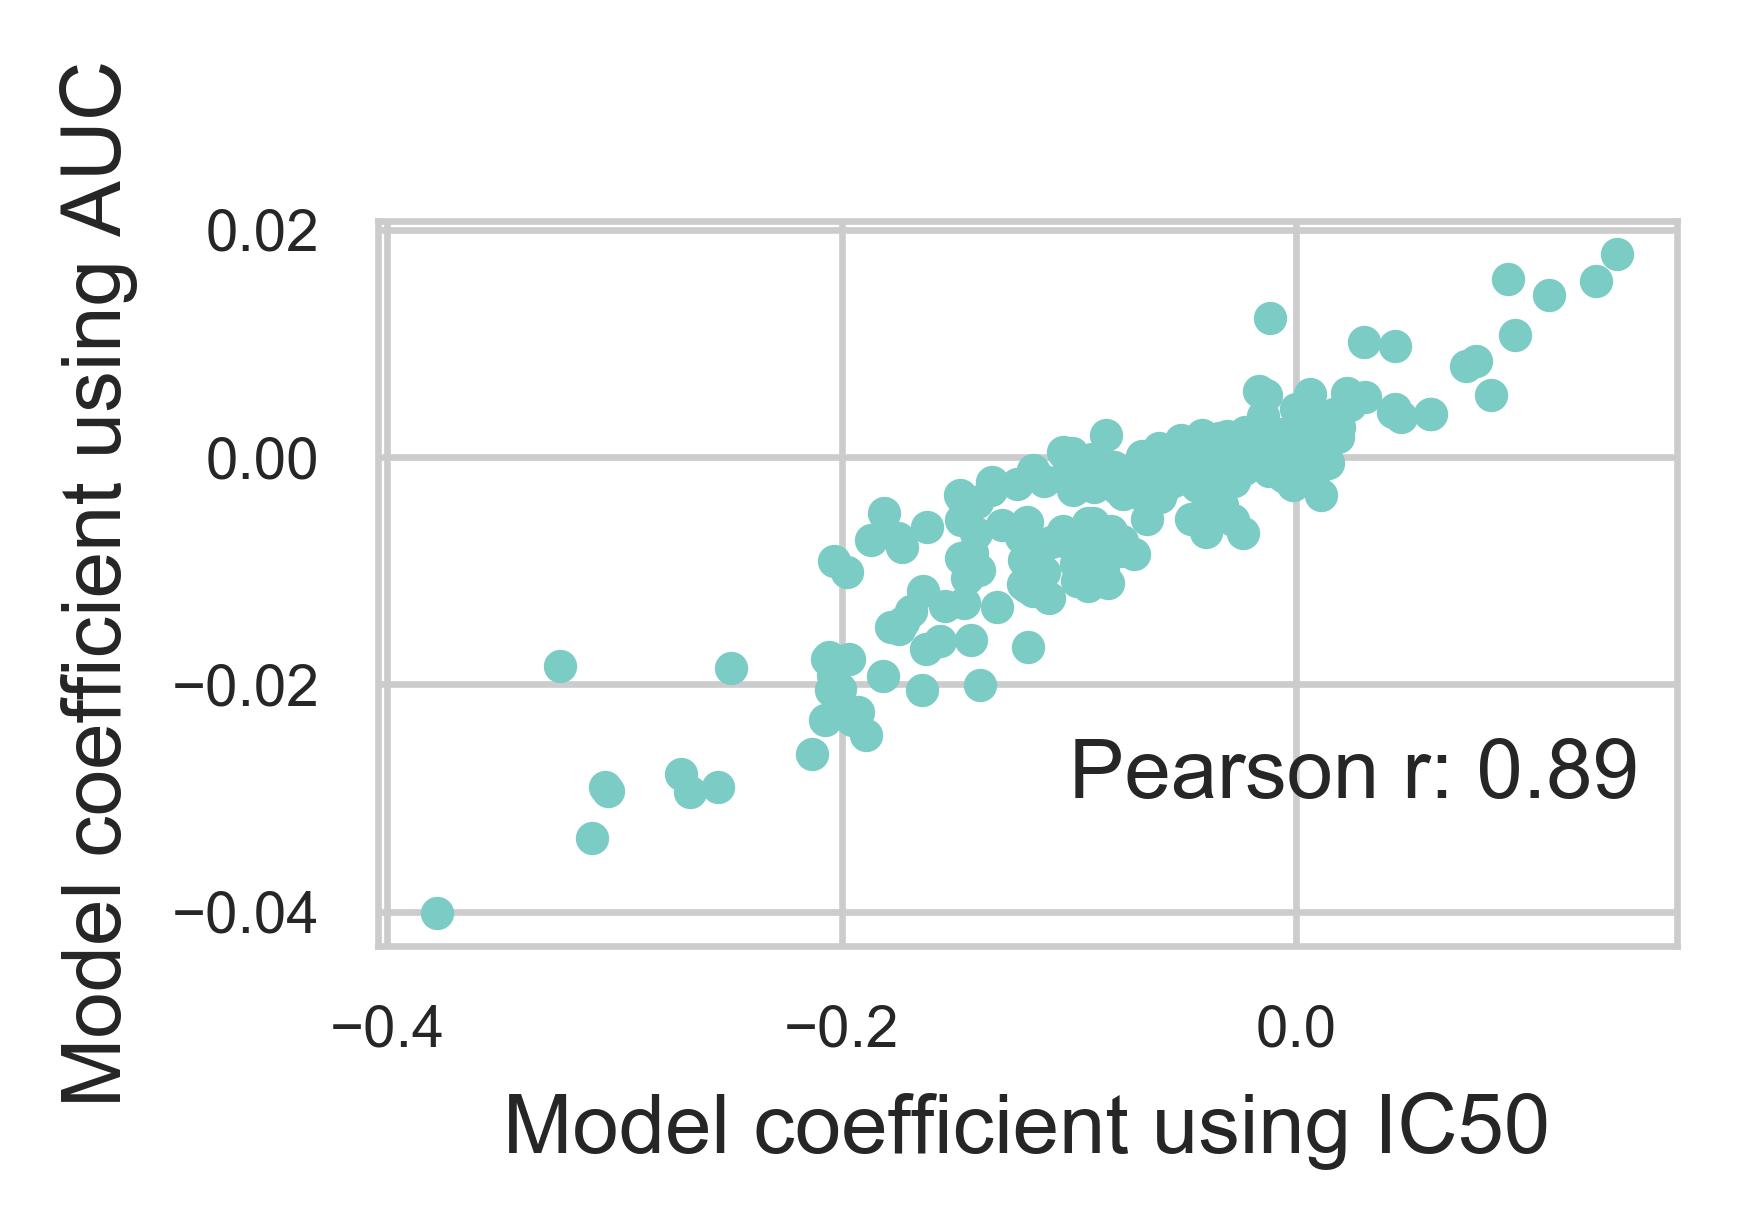

In [39]:
auc=pd.read_csv('../results/functional/linear_models/all_scores_lm_coef_auc.csv',sep=',',header=0,index_col=0)
ic50=pd.read_csv('../results/functional/linear_models/all_scores_lm_coef.csv',sep=',',header=0,index_col=0)
plt.figure(dpi=600,figsize=(3,2))
sns.set_palette('GnBu',1)
plt.plot(ic50['real_model'],auc['real_model'],'.')
r=str(pcor(ic50['real_model'],auc['real_model'])[0])[:4]
plt.xticks(size=7)
plt.yticks(size=7)
plt.xlabel('Model coefficient using IC50',size=10)
plt.ylabel('Model coefficient using AUC',size=10)
plt.text(-0.1,-0.03,'Pearson r: '+r)
plt.tight_layout()
plt.savefig('../figures/raw/SFig3Bnew1.pdf')

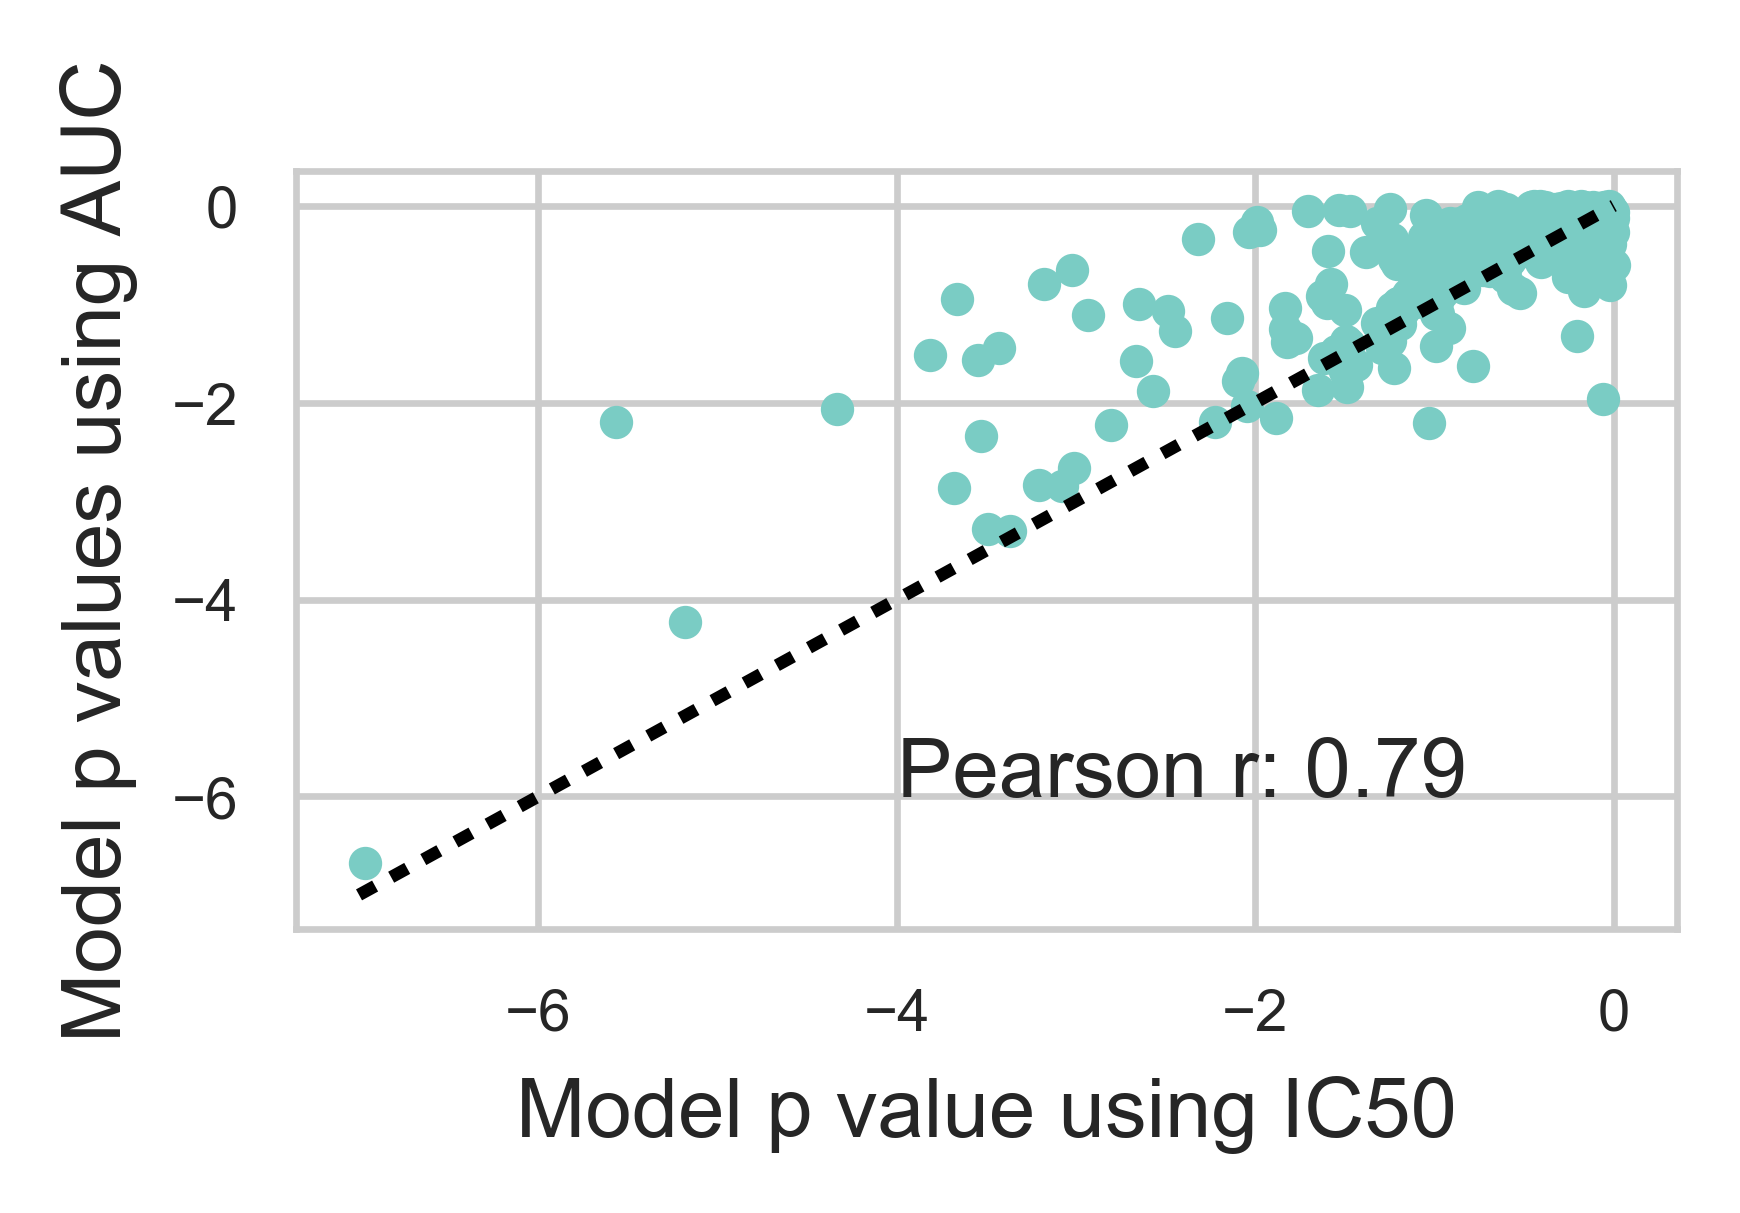

In [40]:
auc=pd.read_csv('../results/functional/linear_models/all_scores_lm_pval_auc.csv',sep=',',header=0,index_col=0)
ic50=pd.read_csv('../results/functional/linear_models/all_scores_lm_pval.csv',sep=',',header=0,index_col=0)
auc['real_model']=np.log10(auc['real_model'])
ic50['real_model']=np.log10(ic50['real_model'])
plt.figure(dpi=600,figsize=(3,2))
sns.set_palette('GnBu',1)
plt.plot(ic50['real_model'],auc['real_model'],'.')
plt.plot([-7,0],[-7,0],':k')
r=str(pcor(ic50['real_model'],auc['real_model'])[0])[:4]
plt.xticks(size=7)
plt.yticks(size=7)
plt.xlabel('Model p value using IC50',size=10)
plt.ylabel('Model p values using AUC',size=10)
plt.text(-4,-6,'Pearson r: '+r)
plt.tight_layout()
plt.savefig('../figures/raw/SFig3Bnew2.pdf')

## Figure 3 and associated Supplementary Figures
A bit un-intuitevely these figures are included into the analysis code of cell_death_4_moa.

## Figure 4 and associated Supplementary Figures

In [2]:
from sklearn.metrics import roc_curve as ROC
from sklearn.metrics import precision_recall_curve as PRC
from sklearn.metrics import auc as AUC

In [26]:
def make_roc_or_prc(dname,fname,plot_type='ROC',ctrp_metric='area_under_curve'):
    plt.figure(dpi=600,figsize=(4,3))
    sns.set_palette('GnBu',5)
    data=pd.read_table('../results/NCI60/'+dname,sep=',',header=0,index_col=[0])
    y_true=(data['DELTA']<-0.1).astype(int)
    if plot_type=='ROC':
        fil_ctrp=~pd.isnull(data[ctrp_metric])
        fpr,tpr,d=ROC(y_true,-data['CTRP_prediction'])
        auc1=str(AUC(fpr,tpr))[:4]
        plt.plot(fpr,tpr,lw=1)
        fpr,tpr,d=ROC(y_true,-data['Achilles_prediction'])
        auc2=str(AUC(fpr,tpr))[:4]
        plt.plot(fpr,tpr,lw=1)
        fpr,tpr,d=ROC(y_true[fil_ctrp],-data[fil_ctrp]['CTRP_prediction'])
        auc3=str(AUC(fpr,tpr))[:4]
        plt.plot(fpr,tpr,lw=1)
        fpr,tpr,d=ROC(y_true[fil_ctrp],-data[fil_ctrp]['Achilles_prediction'])
        auc4=str(AUC(fpr,tpr))[:4]
        plt.plot(fpr,tpr,lw=1)
        fpr,tpr,d=ROC(y_true[fil_ctrp],-data[fil_ctrp][ctrp_metric])
        auc5=str(AUC(fpr,tpr))[:4]
        plt.plot(fpr,tpr,lw=1)
    else:
        fil_ctrp=~pd.isnull(data[ctrp_metric])
        pre,rec,d=PRC(y_true,-data['CTRP_prediction'])
        auc1=str(AUC(rec,pre))[:4]
        plt.plot(rec,pre,lw=1)
        pre,rec,d=PRC(y_true,-data['Achilles_prediction'])
        auc2=str(AUC(rec,pre))[:4]
        plt.plot(rec,pre,lw=1)
        pre,rec,d=PRC(y_true[fil_ctrp],-data[fil_ctrp]['CTRP_prediction'])
        auc3=str(AUC(rec,pre))[:4]
        plt.plot(rec,pre,lw=1)
        pre,rec,d=PRC(y_true[fil_ctrp],-data[fil_ctrp]['Achilles_prediction'])
        auc4=str(AUC(rec,pre))[:4]
        plt.plot(rec,pre,lw=1)
        pre,rec,d=PRC(y_true[fil_ctrp],-data[fil_ctrp][ctrp_metric])
        auc5=str(AUC(rec,pre))[:4]
        plt.plot(rec,pre,lw=1)
    plt.legend(['Predicted (CTRP-L1000-24h model) NCI60-L1000-24h: AUC='+auc1,
        'Predicted (Achilles-L1000-96h model) NCI60-L1000-24h: AUC='+auc2,
        'Predicted (CTRP-L1000-24h model) NCI60-CTRP-L1000-24h: AUC='+auc3,
        'Predicted (Achilles-L1000-96h model) NCI60-CTRP-L1000-24h: AUC='+auc4,
        'Ground truth (CTRP AUC) NCI60-CTRP-L1000-24h: AUC='+auc5],loc=0, prop={'size': 5})
    if plot_type=='ROC':
        plt.xlabel('FPR',size=10)
        plt.ylabel('TPR',size=10)
    else:
        random_model=np.sum(y_true)/len(y_true)
        plt.plot([0,1],[random_model,random_model],'k--')
        random_model=np.sum(y_true[fil_ctrp])/np.sum(fil_ctrp)
        plt.plot([0,1],[random_model,random_model],'k:')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
    plt.ylim(0,1.1)
    plt.xticks(size=7)
    plt.yticks(size=7)
    plt.tight_layout()
    if fname:
        plt.savefig('../figures/raw/'+fname)

In [20]:
def make_hist(dname,fname):
    sns.set_palette('GnBu',2)
    plt.figure(dpi=600,figsize=(2.4,2.4))
    data=pd.read_table('../results/NCI60/'+dname,sep=',',header=0,index_col=[0])
    fil_ctrp=~pd.isnull(data['area_under_curve'])
    plt.hist(data['DELTA'],rwidth=1,bins=50,linewidth=0)
    plt.hist(data['DELTA'][fil_ctrp],rwidth=1,bins=50,linewidth=0)
    plt.legend(['NCI60-L1000-24h','NCI60-CTRP-L1000-24h'],fontsize=5)
    plt.xlabel('Delta concetration',size=7)
    plt.ylabel('No. cell line - compound pairs',size=7)
    plt.xticks(size=7)
    plt.yticks(size=7)
    plt.tight_layout()
    if fname:
        plt.savefig('../figures/raw/'+fname)

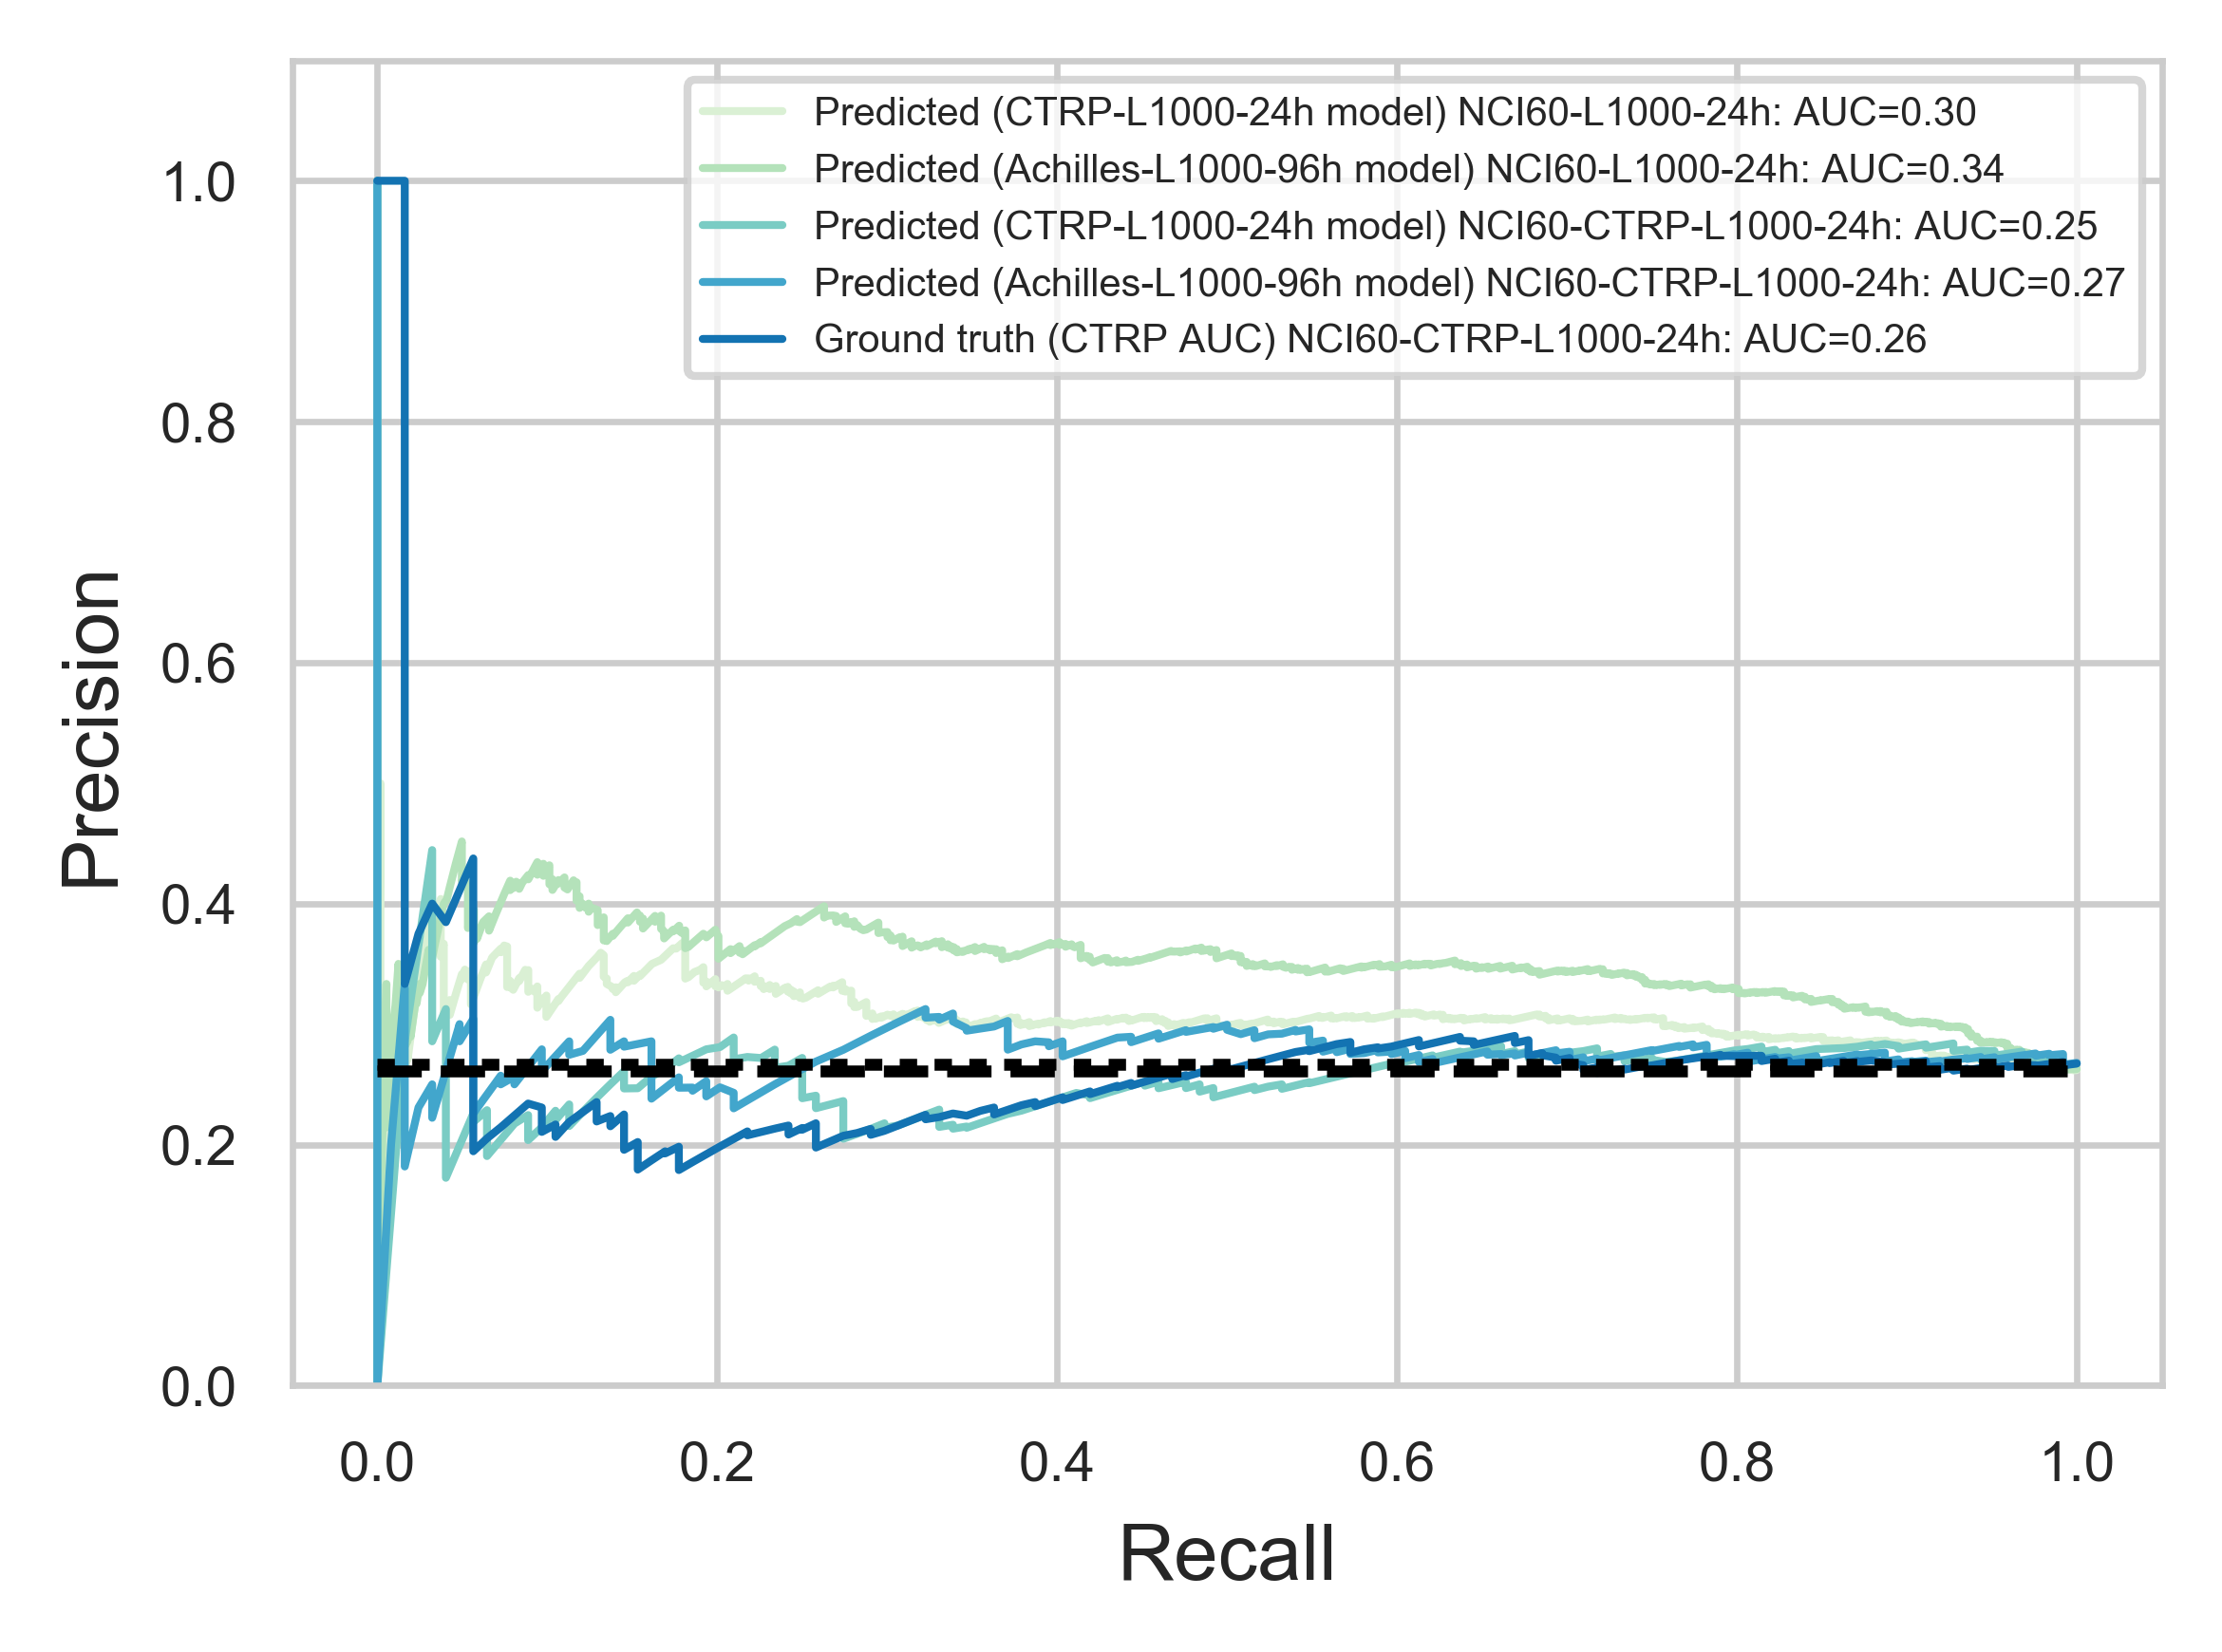

In [19]:
make_roc_or_prc('CANCER60LC50_validation.csv','SFig5C_PRC.pdf',plot_type='PRC')

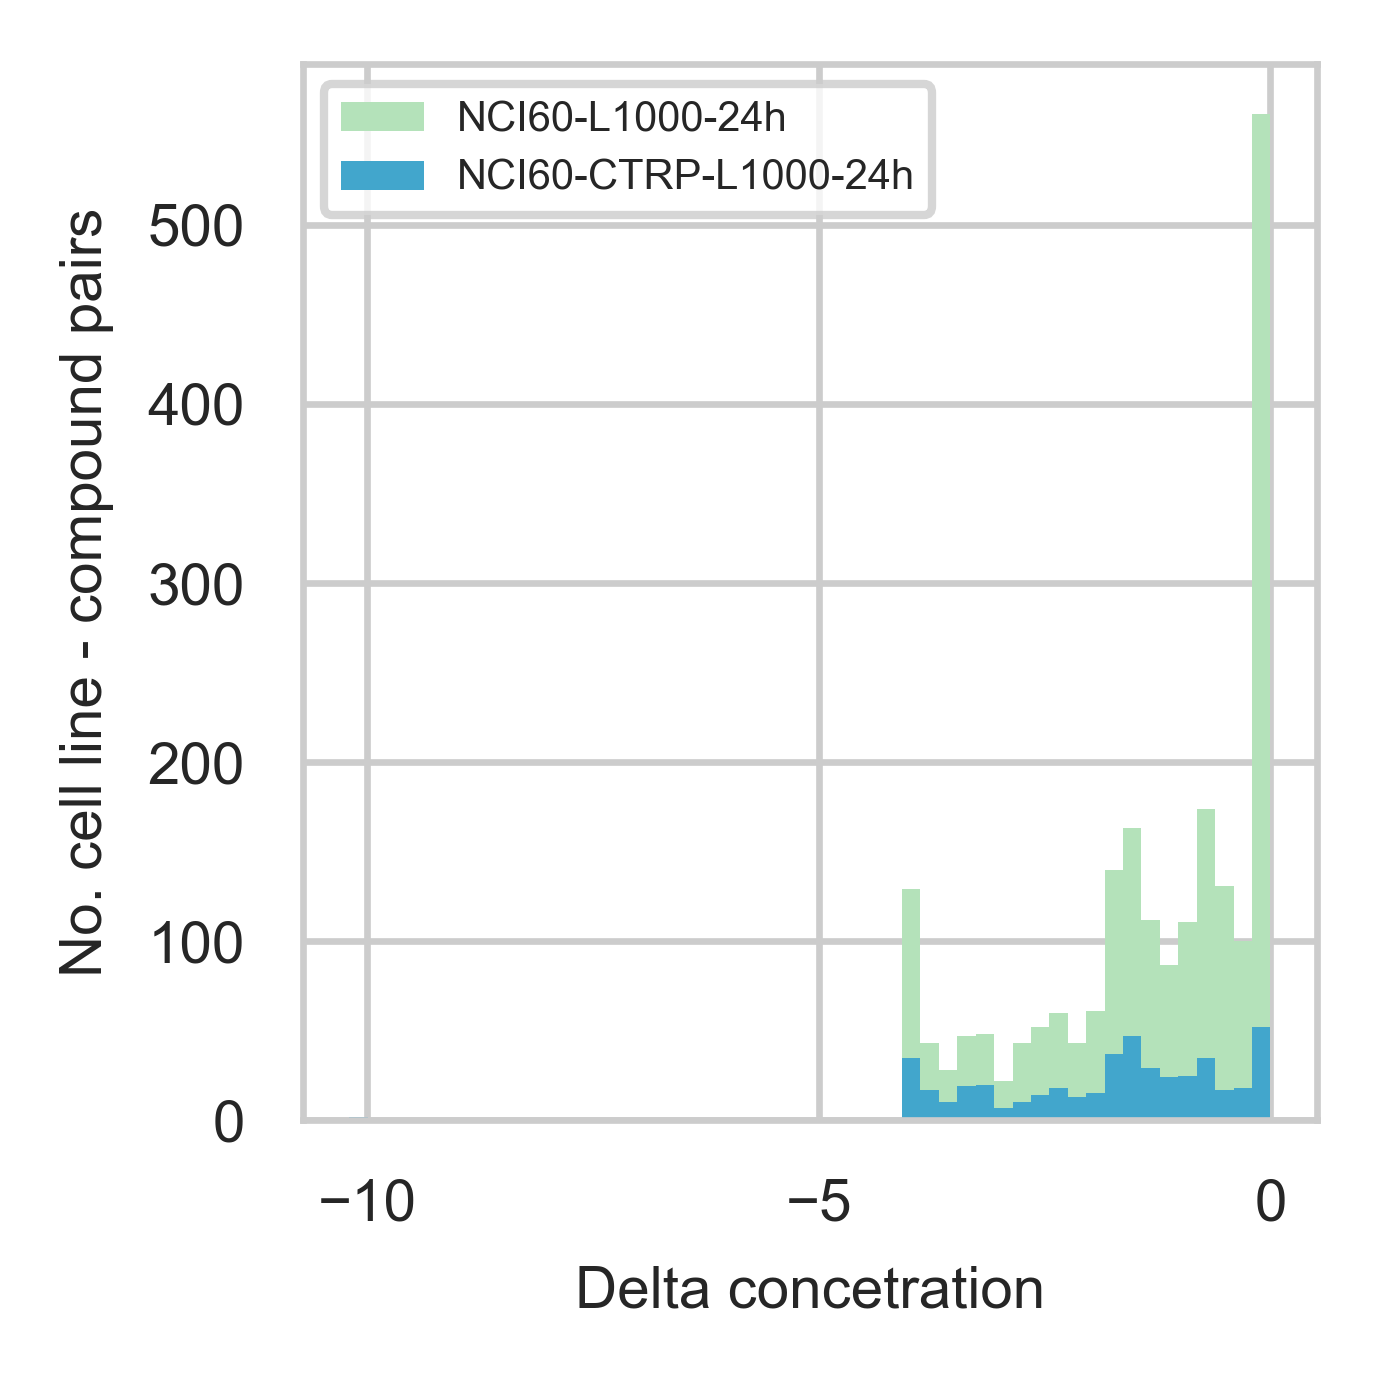

In [23]:
make_hist('CANCER60GI50_validation.csv','SFig5A_gi50.pdf')

In [2]:
from adjustText import adjust_text
from scipy.stats import fisher_exact

0.570093457944
0.0684711407737
(21.412361927144534, 5.9212377686603554e-130)
proli CGP-60474
proli PHA-767491
proli SB-239063
proli dinaciclib
proli mitoxantrone
proli thiocolchicoside
proli tipranavir
proli BTC
proli EGF
proli EPR
proli HRG
proli TGFa
toxi AP-26113
toxi PF-04691502
toxi PHA-848125
toxi PKI-179
toxi SN-38
toxi VU-0418939-2
toxi VU-0418947-2
toxi benzethonium
toxi bruceantin
toxi delanzomib
toxi genz-644282
toxi ixazomib-citrate
toxi methyl-benzethonium
toxi oprozomib
toxi romidepsin


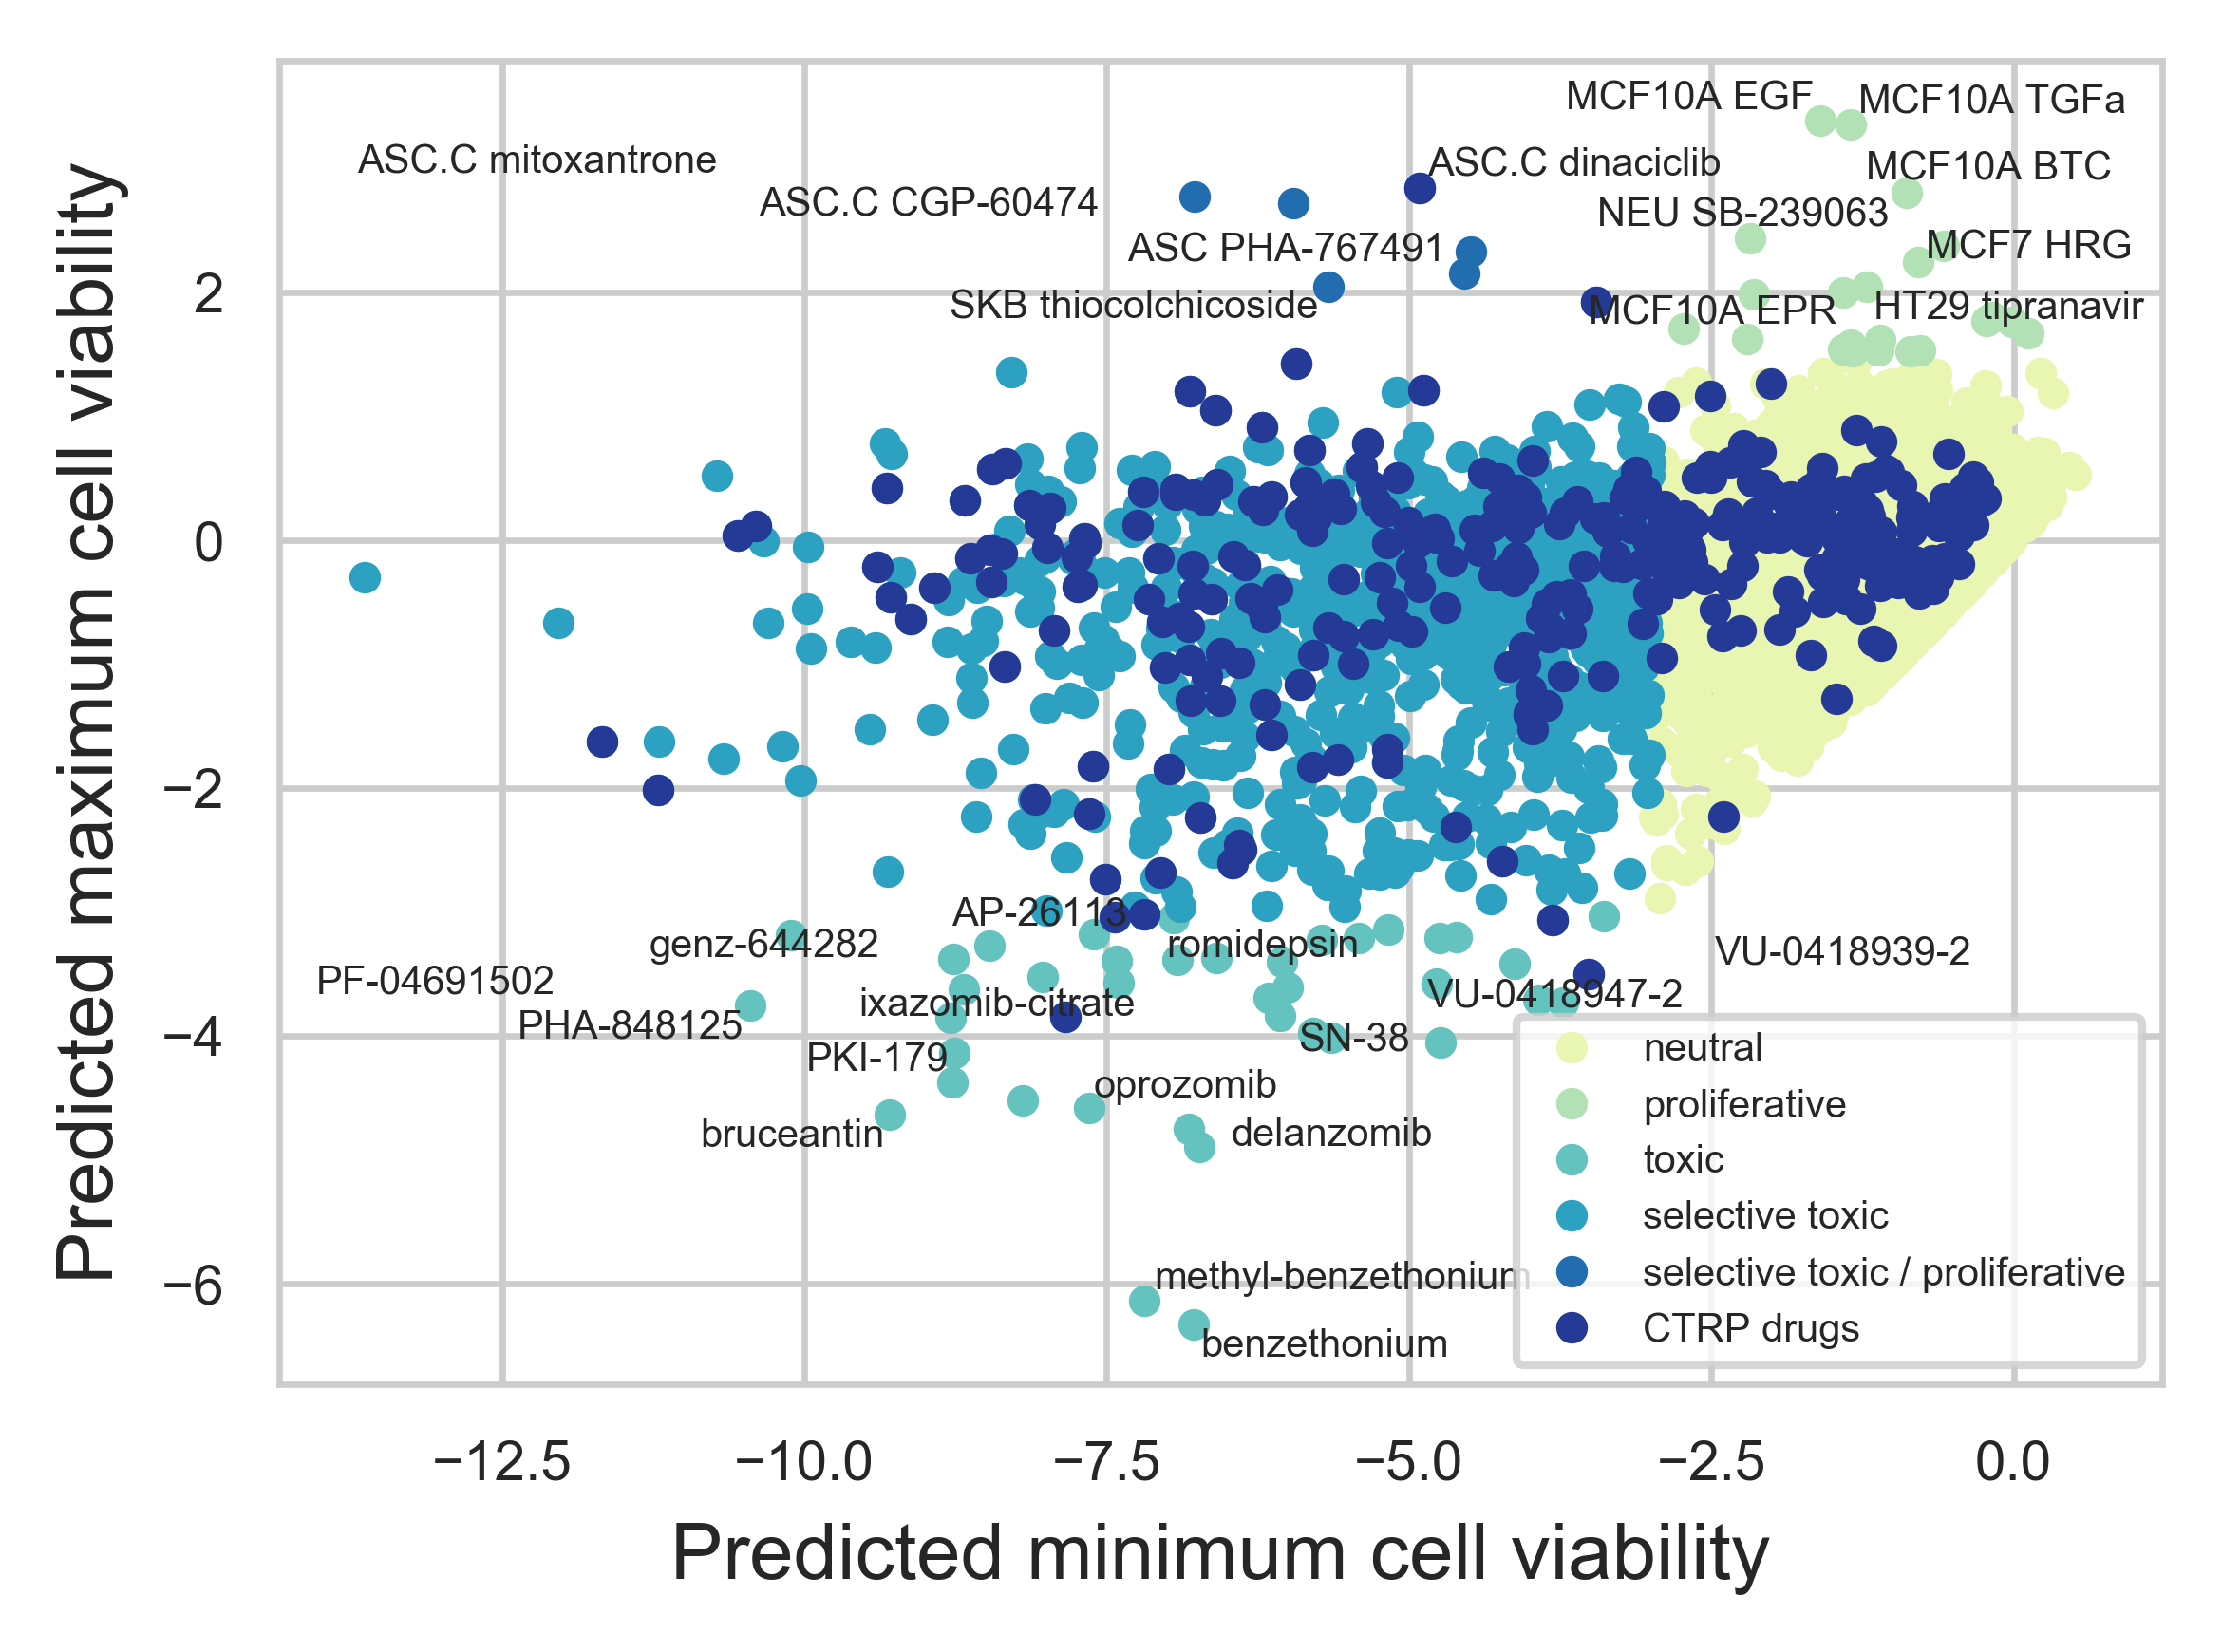

In [5]:
data=pd.read_table('../results/predictions/predicted_min_max.csv',sep=',',header=0,index_col=0)
#remove measurements with only 1 cell line
fil=data['pred_max']!=data['pred_min']
data=data[fil]
min_tox=data['pred_min']<-3
min_nor=data['pred_min']>-3
max_tox=data['pred_max']<-3
max_nor=(data['pred_max']>-3)&(data['pred_max']<1.5)
max_pro=data['pred_max']>1.5

sns.set_palette('YlGnBu',6)
plt.figure(dpi=600,figsize=(4,3))

ctrp=pd.read_table('../results/CTRP/sig_info_merged_lm.csv',sep=',',header=0,index_col=[0])
ctrp=list(set(ctrp['pert_iname']))

#fisher exact test for ctrp drugs
n1=np.sum((data['pred_min']<-3) & (np.in1d(data['pert_iname'],ctrp)))
n2=np.sum((data['pred_min']>-3) & (np.in1d(data['pert_iname'],ctrp)))
n3=np.sum((data['pred_min']<-3) & ~(np.in1d(data['pert_iname'],ctrp)))
n4=np.sum((data['pred_min']>-3) & ~(np.in1d(data['pert_iname'],ctrp)))

print(n1/float(n1+n2))
print((n1+n3)/float(n1+n2+n3+n4))
print(fisher_exact([[n1,n2],[n3,n4]]))

filts=[(min_nor,max_nor),(min_nor,max_pro),(min_tox,max_tox),(min_tox,max_nor),(min_tox,max_pro)]
for filt in filts:
    fil=filt[0]&filt[1]
    plt.plot(data[fil]['pred_min'],data[fil]['pred_max'],'.')
fil=np.in1d(data['pert_iname'],ctrp)
plt.plot(data[fil]['pred_min'],data[fil]['pred_max'],'.')

plt.xlabel('Predicted minimum cell viability',size=10)
plt.ylabel('Predicted maximum cell viability',size=10)
plt.xticks(size=7)
plt.yticks(size=7)
plt.legend(['neutral','proliferative','toxic','selective toxic',
            'selective toxic / proliferative','CTRP drugs'],fontsize=5,loc=4)
fil=data['pred_max']>2
indexes=data.index[fil]
texts=[]
for i in indexes:
    if data.loc[i,'pert_iname'][:3]!='BRD':
        texts.append(plt.text(data.loc[i,'pred_min'],data.loc[i,'pred_max'],data.loc[i,'cell_max']+' '+data.loc[i,'pert_iname'],
                    size=5,horizontalalignment='center'))
        print('proli',data.loc[i,'pert_iname'])
fil=(data['pred_max']<-3.5)&(data['pred_min']<-6)
indexes=data.index[fil]
for i in indexes:
    if data.loc[i,'pert_iname'][:3]!='BRD':
        texts.append(plt.text(data.loc[i,'pred_min'],data.loc[i,'pred_max'],data.loc[i,'pert_iname'],
                    size=5,horizontalalignment='center'))
        print('toxi',data.loc[i,'pert_iname'])
adjust_text(texts)
plt.tight_layout()
plt.savefig('../figures/raw/Fig4C.pdf')

In [8]:
#prostate cell lines
data=pd.read_table('../results/predictions/predicted_prostate.csv',sep=',',header=0,index_col=0)

In [11]:
data.index=data['pert_iname']

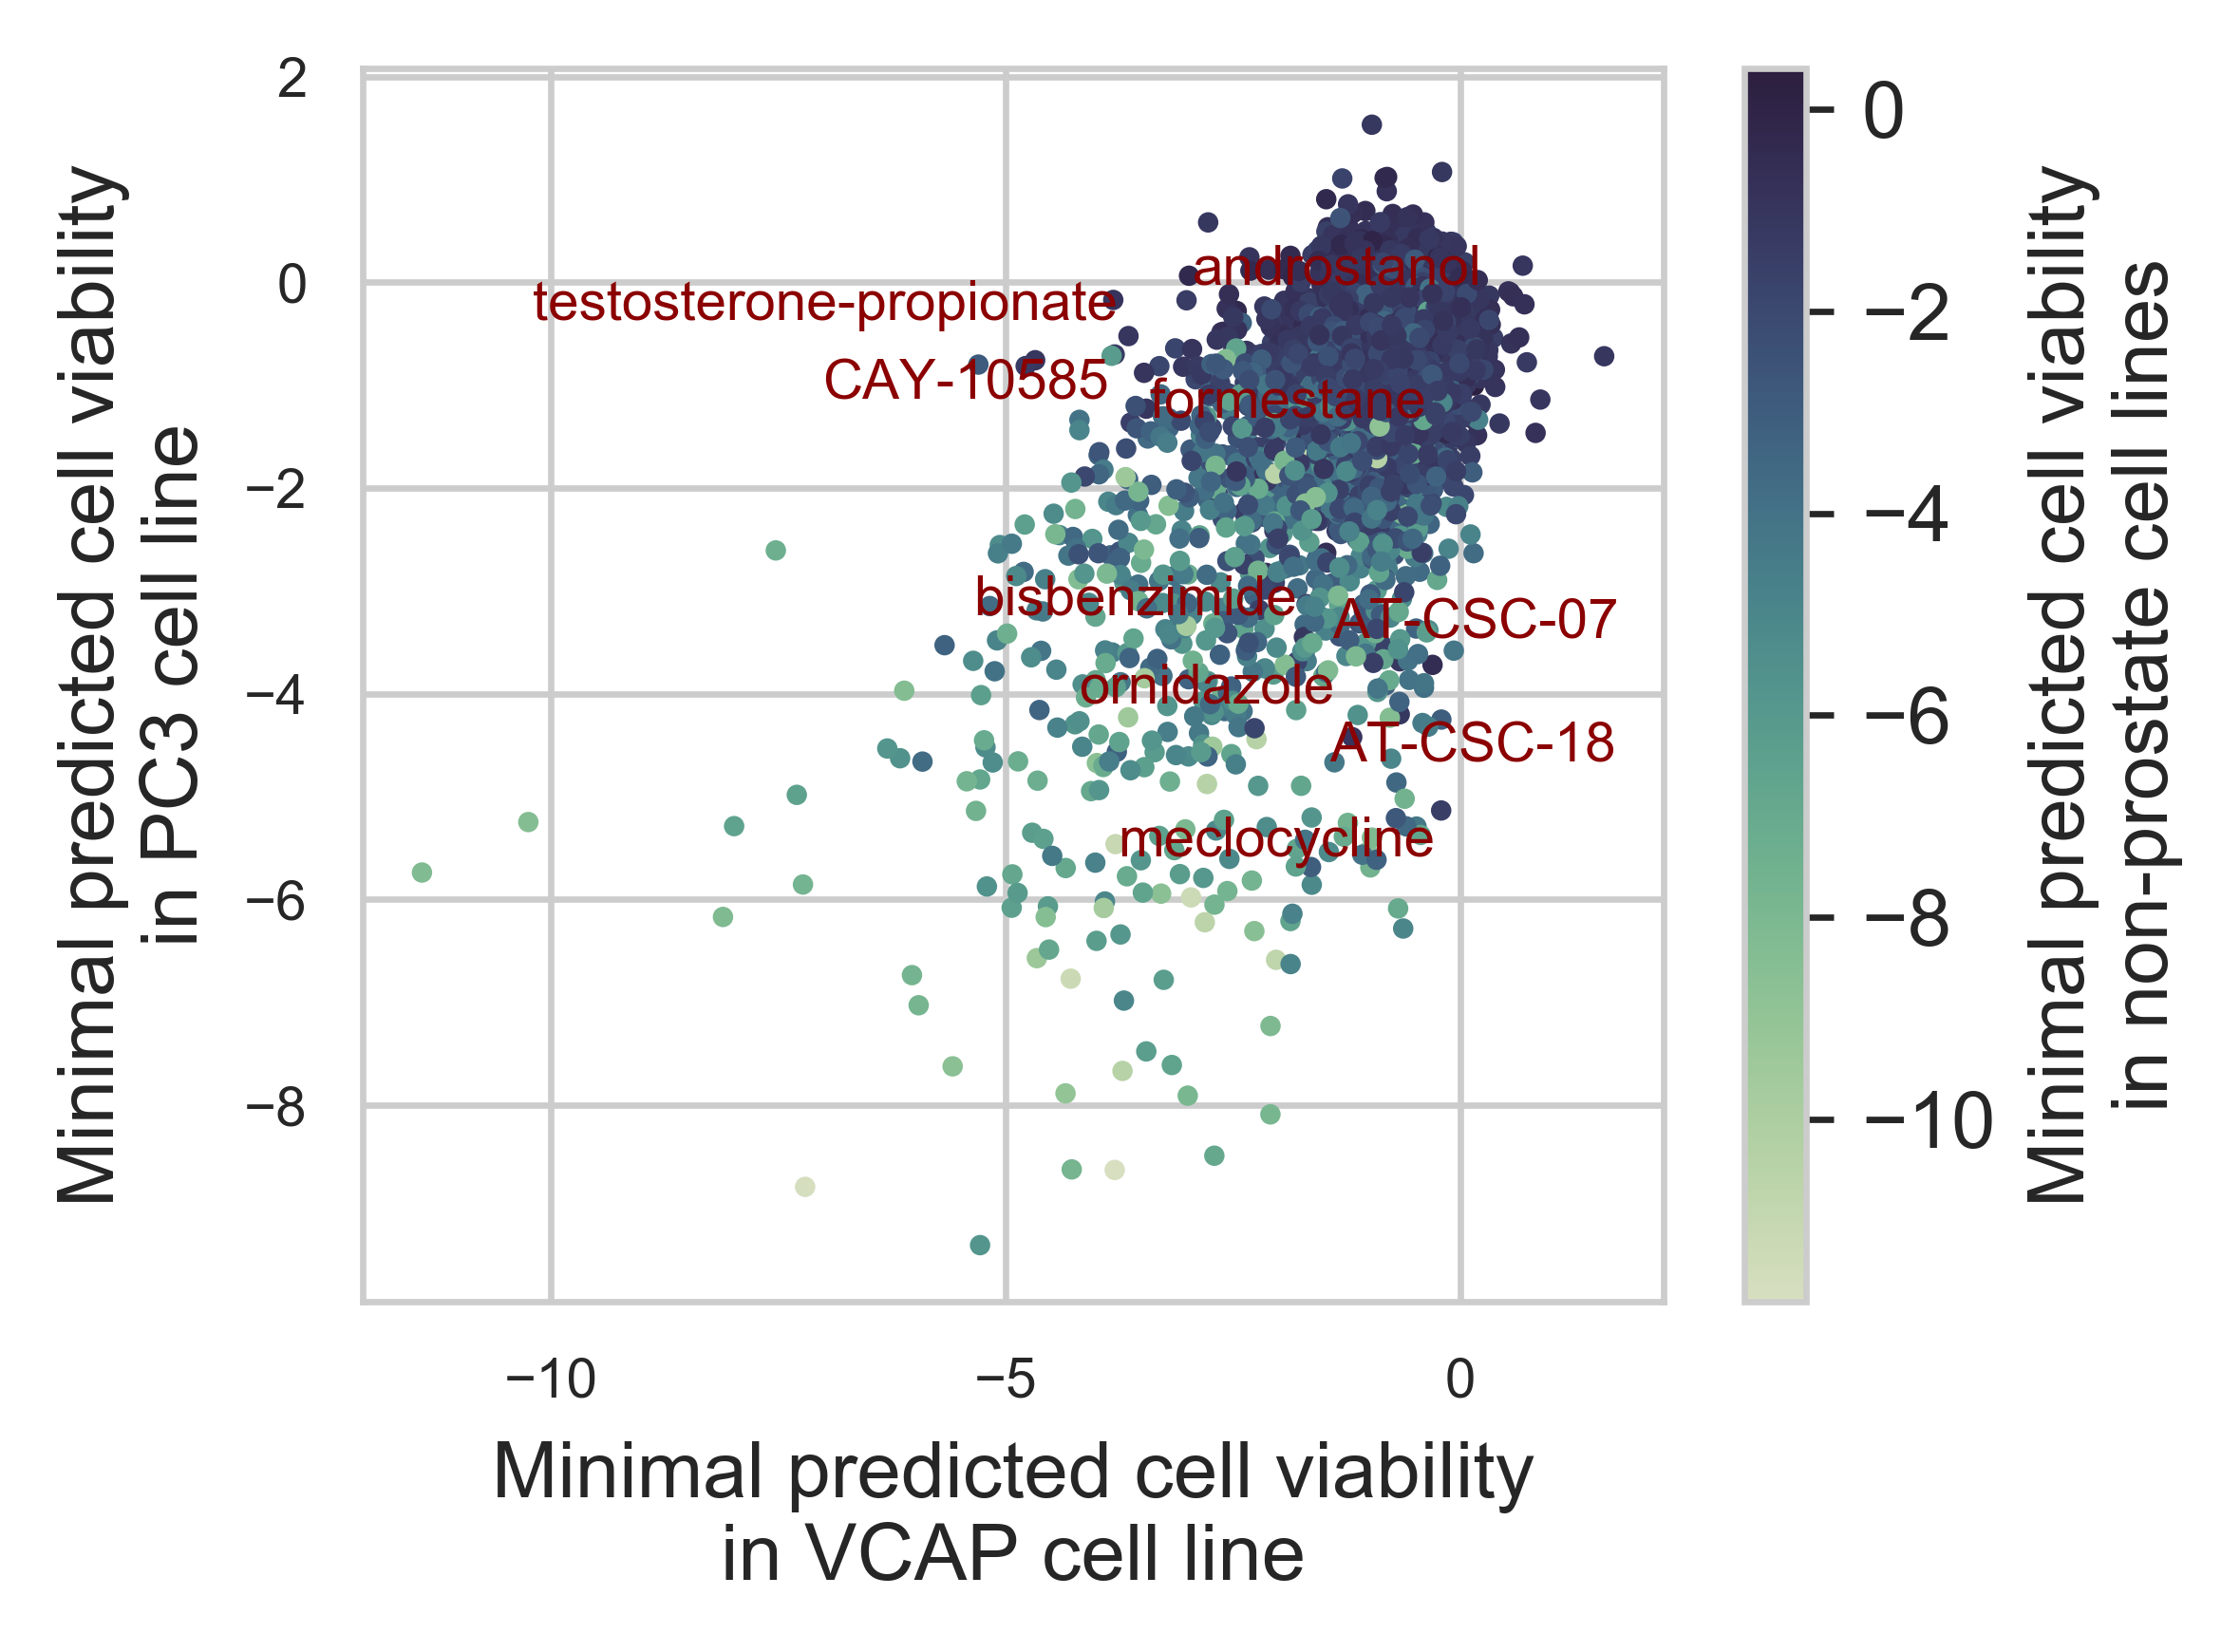

In [17]:
cmap = sns.cubehelix_palette(8, start=.5, rot=-.75,as_cmap=True)
f, ax = plt.subplots(dpi=600,figsize=(4,3))
points = ax.scatter(data['VCAP'],data['PC3'], c=data['Other'], s=10, cmap=cmap,marker='.')
f.colorbar(points,label='Minimal predicted cell viability\nin non-prostate cell lines')
fil=(data['Other']>-1.5)&((data['VCAP']<-3)|(data['PC3']<-3))
drugs=data.index[fil]
texts=[]
for drug in drugs:
    if drug[:3]!='BRD':
        texts.append(plt.text(data.loc[drug,'VCAP'],data.loc[drug,'PC3'],drug,size=7,color='darkred',
                horizontalalignment='center'))
adjust_text(texts)
plt.xlabel('Minimal predicted cell viability\nin VCAP cell line',size=10)
plt.ylabel('Minimal predicted cell viability\nin PC3 cell line',size=10)
plt.xticks(size=7)
plt.yticks(size=7)
plt.tight_layout()
plt.savefig('../figures/raw/Fig4D.pdf')

## Figure 5 and associated Supplementary Figures

In [2]:
from sklearn.manifold.t_sne import TSNE
from sklearn.metrics import silhouette_samples

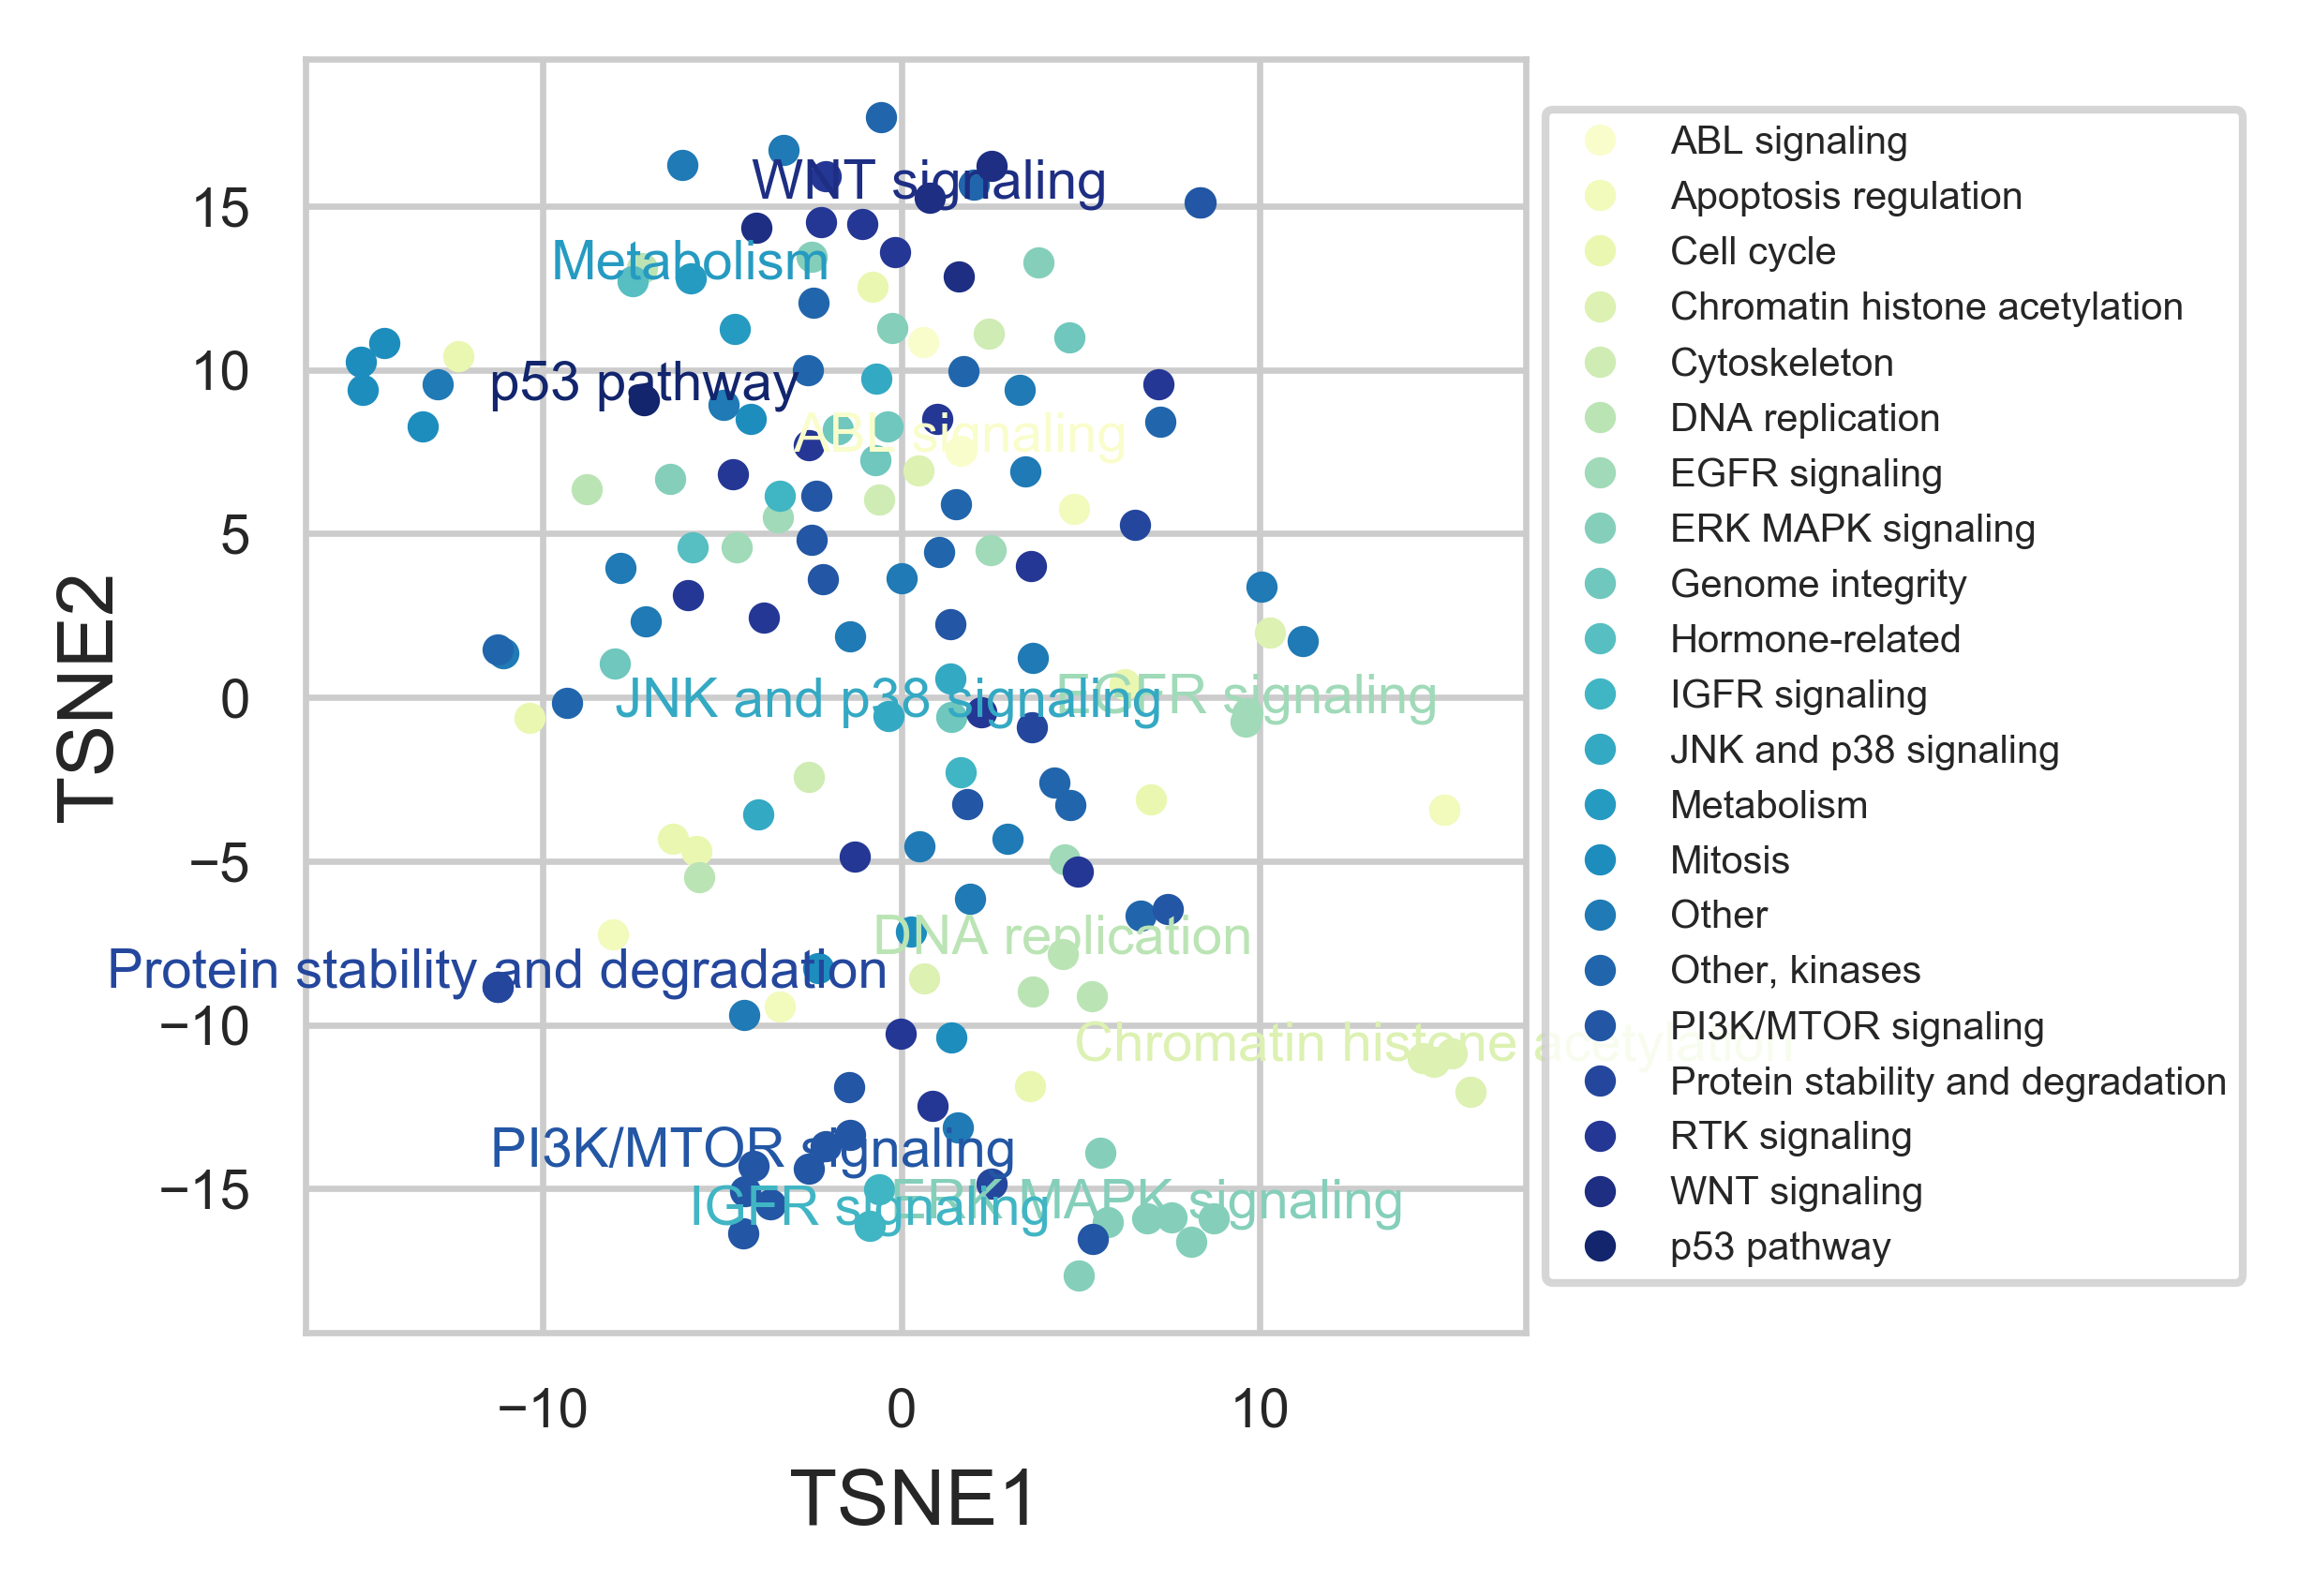

In [6]:
data=pd.read_csv('../data/GDSC/ML/drug_features/signatures.csv',sep=',',header=0,index_col=0)
anno=pd.read_excel('../data/GDSC/Screened_Compounds.xlsx')
anno.index=anno['DRUG_ID']
drug_ids=list(set(data.index)&set(anno.index))
data=data.loc[drug_ids,:]
anno=anno.loc[drug_ids,:]
pathways=list(set(anno['TARGET_PATHWAY']))
pathways.sort()
model=TSNE(n_components=2,random_state=19890904,method='exact',learning_rate=80,perplexity=20)
data_tsne=model.fit_transform(data)
data_tsne=pd.DataFrame(data_tsne,index=data.index,columns=range(2))
clustering=pd.DataFrame(index=data.index)
clustering['Silhouette score']=silhouette_samples(data_tsne,anno.loc[data.index,'TARGET_PATHWAY'])
clustering['TARGET_PATHWAY']=anno.loc[data.index,'TARGET_PATHWAY']
clustering=clustering.sort_values('Silhouette score',ascending=False)
clustering=clustering.drop_duplicates('TARGET_PATHWAY')
f,ax=plt.subplots(1,1,dpi=600,figsize=(4,3))
sns.set_palette('YlGnBu',len(pathways))
for j in range(len(pathways)):
        pw=pathways[j]
        fil=anno.loc[:,'TARGET_PATHWAY']==pw
        indexes=anno.index[fil]
        plt.plot(data_tsne.loc[indexes,0],data_tsne.loc[indexes,1],'.')
        fil=np.in1d(clustering.index,indexes)
        i=clustering[fil].index[0]
        if clustering.loc[i,'Silhouette score']>-0.2:
            plt.text(data_tsne.loc[i,0],data_tsne.loc[i,1],pw,size=7,
                     color= sns.color_palette('YlGnBu',len(pathways))[j],ha='center')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.7, box.height])
ax.legend(pathways,loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 5})    
plt.xticks(size=7)
plt.yticks(size=7)
plt.xlabel('TSNE1',size=10)
plt.ylabel('TSNE2',size=10)
plt.savefig('../figures/raw/Fig5A.pdf')

In [2]:
from scipy.stats import pearsonr as pcor

In [3]:
def make_ML_plot(dtype='auc',outname='Fig5C.pdf'):
    results=pd.DataFrame(index=range(240),columns=['method','features','s','r'])
    i=0
    for method in ['random','same_target','diff_target']:
        for feature in ['target','pathway','fingerprints','signatures_pca']:
            for s in range(20):
                fname='_'.join([dtype,method,feature,str(s)])+'.csv'
                data=pd.read_csv('../results/GDSC/ML_results//'+fname,sep=',',header=0,index_col=0)
                rs=[]
                #calculate cell line wise correlation
                for cosmic in list(set(data['COSMIC_ID'])):
                    fil=data['COSMIC_ID']==cosmic
                    r=pcor(data[fil]['RESPONSE'],data[fil]['Predicted'])[0]
                    rs.append(r)
                rs=np.array(rs)
                fil=pd.isnull(rs)
                rs[fil]=0
                r=np.mean(rs)
                results.loc[i,]=[method,feature,str(s),r]
                i+=1
    results.to_csv('../results/GDSC/%s.csv' % dtype,sep=',')
    replace_method={'same_target':'shared\ntarget','diff_target':'different\ntarget'}
    replace_feature={'target':'nominal\ntarget','pathway':'targeted\npathway',
                     'fingerprints':'chemical\nfingerprints','signatures_pca':'consensus\nsignature'}
    for m in replace_method:
        fil=results['method']==m
        results.loc[results.index[fil],'method']=replace_method[m]
    for f in replace_feature:
        fil=results['features']==f
        results.loc[results.index[fil],'features']=replace_feature[f]
    plt.figure(dpi=600,figsize=(4,3))
    sns.set_palette('YlGnBu',3)
    sns.boxplot(x='features',y='r',hue='method',data=results)
    plt.legend(fontsize=7)
    plt.xticks(size=7)
    plt.yticks(size=7)
    plt.xlabel('Drug features',size=10)
    plt.ylabel('Pearson correlation',size=10)
    plt.tight_layout()
    plt.savefig('../figures/raw/%s.pdf' % outname)            

/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/scipy/stats/stats.py:3013: RuntimeWarning: invalid value encountered in double_scalars
  prob = _betai(0.5*df, 0.5, df/(df+t_squared))


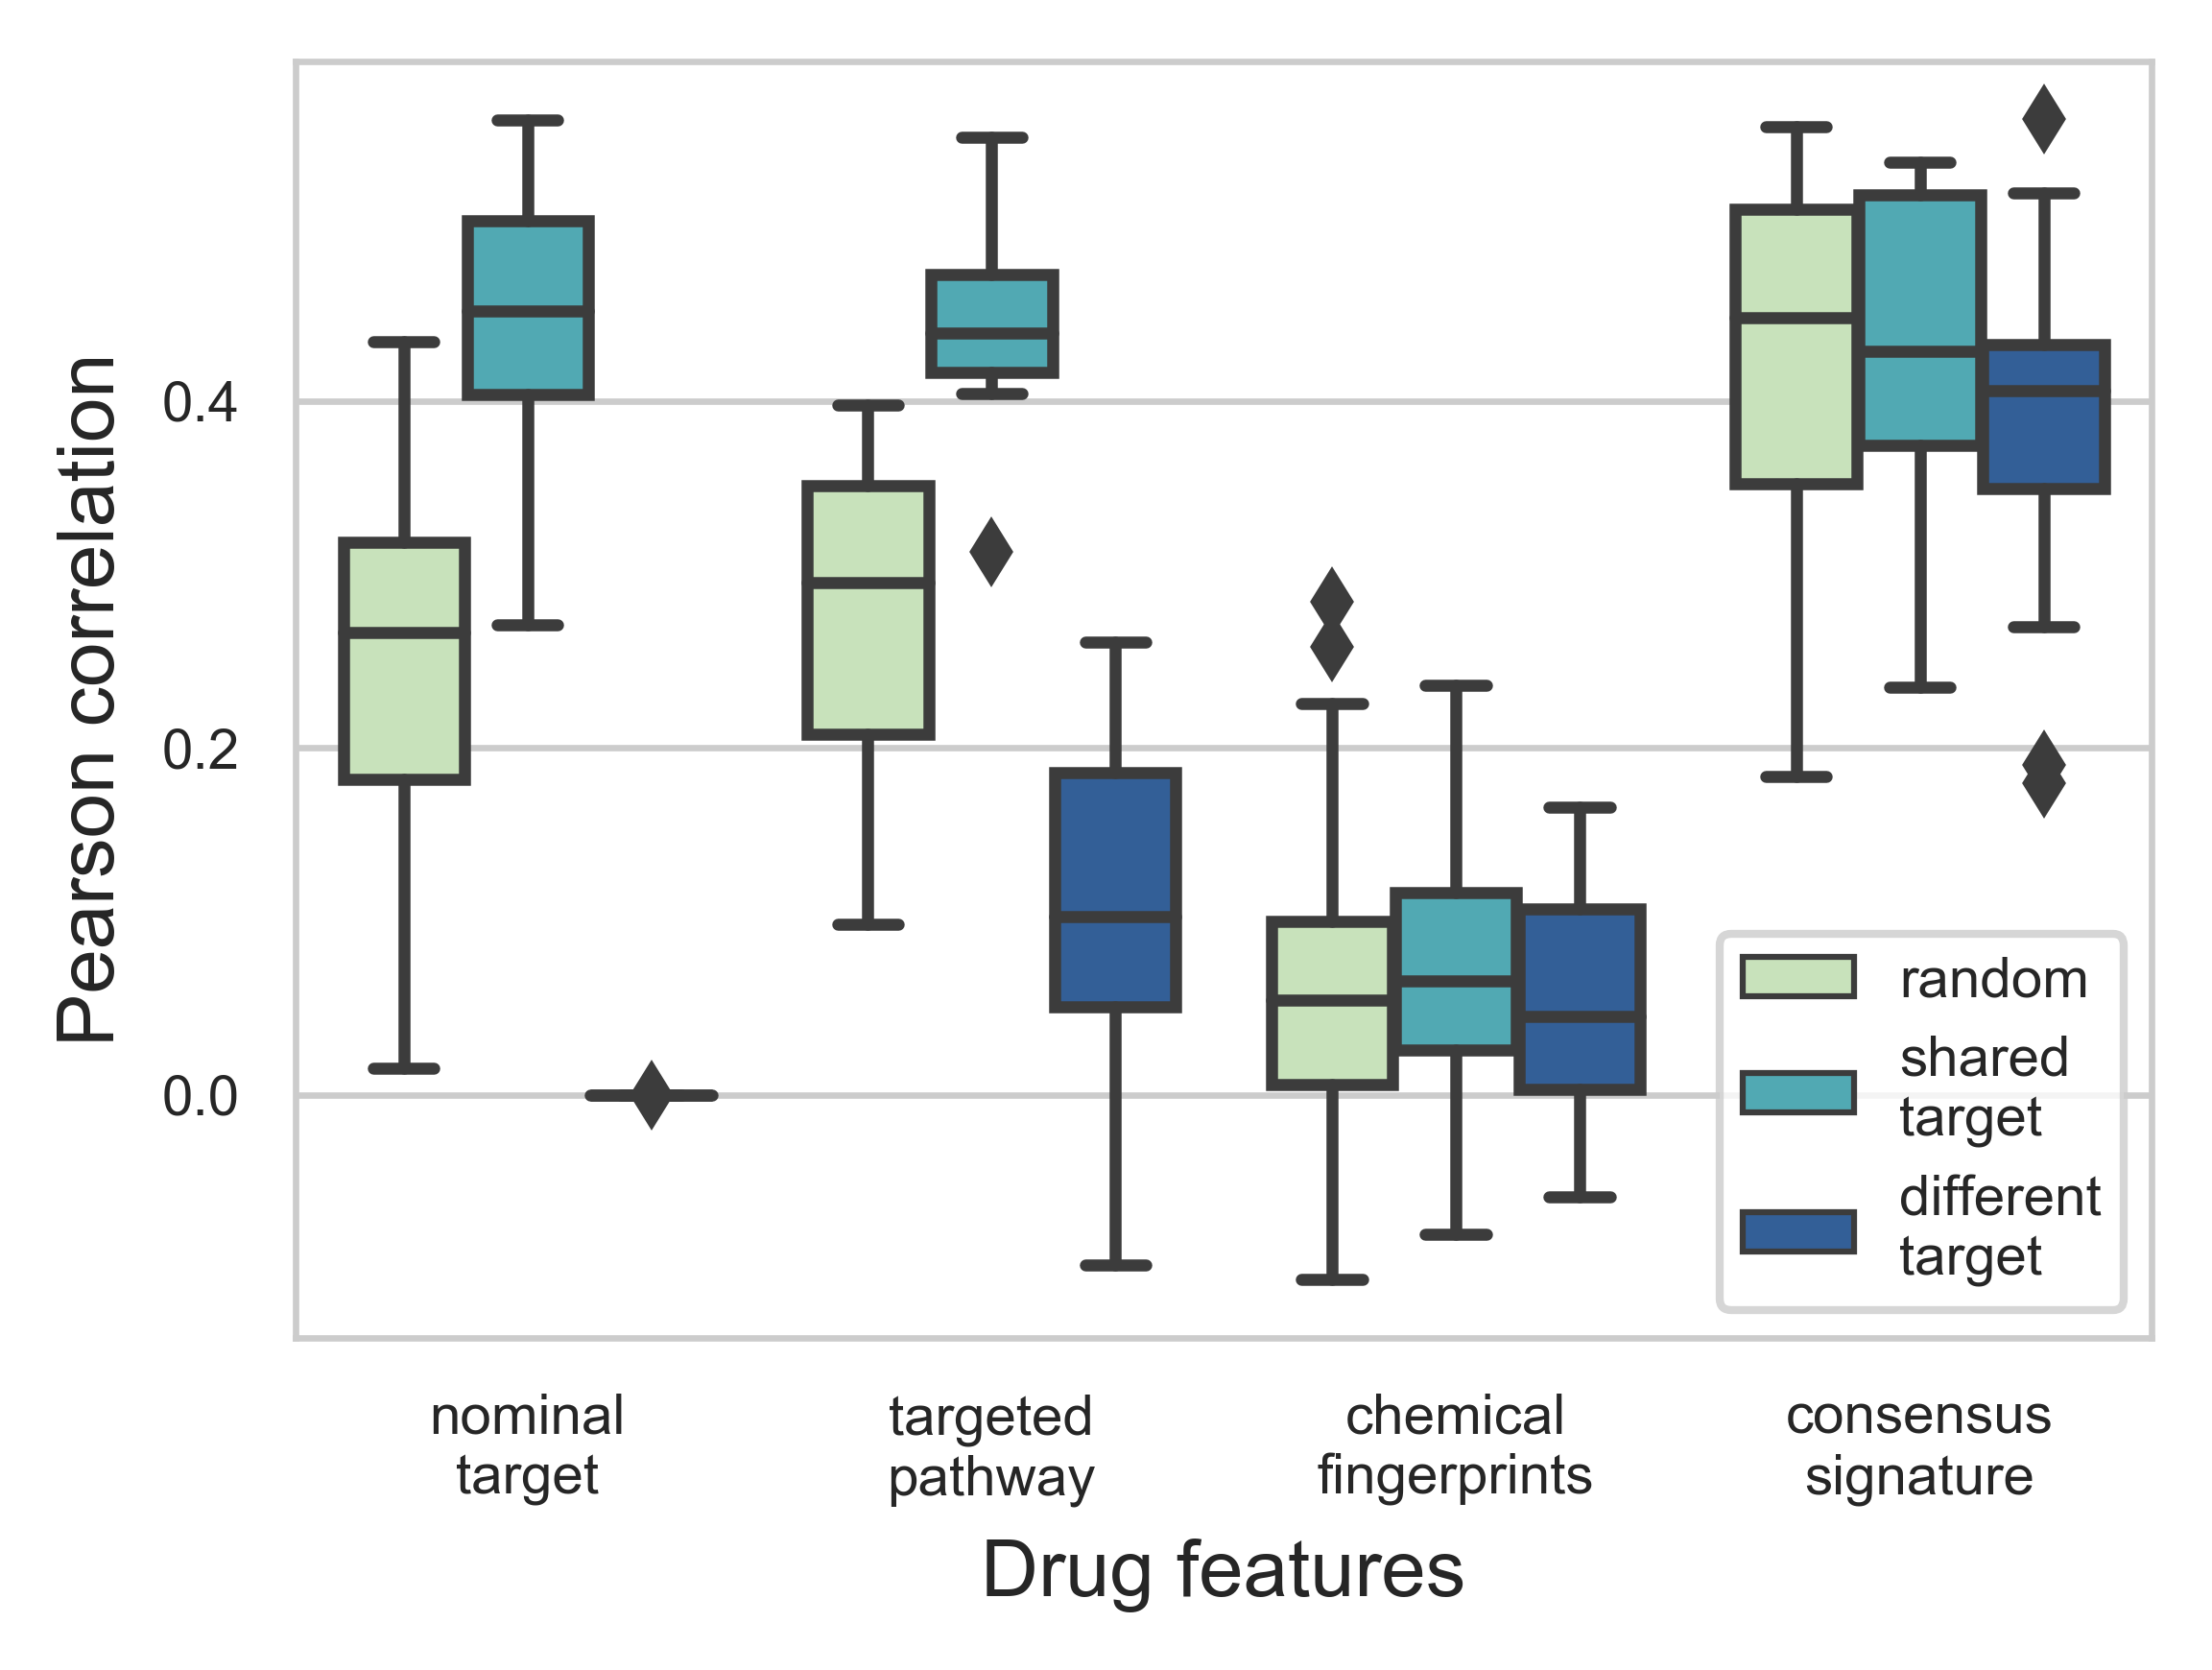

In [4]:
 make_ML_plot(dtype='auc',outname='Fig5C')

/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/scipy/stats/stats.py:3013: RuntimeWarning: invalid value encountered in double_scalars
  prob = _betai(0.5*df, 0.5, df/(df+t_squared))


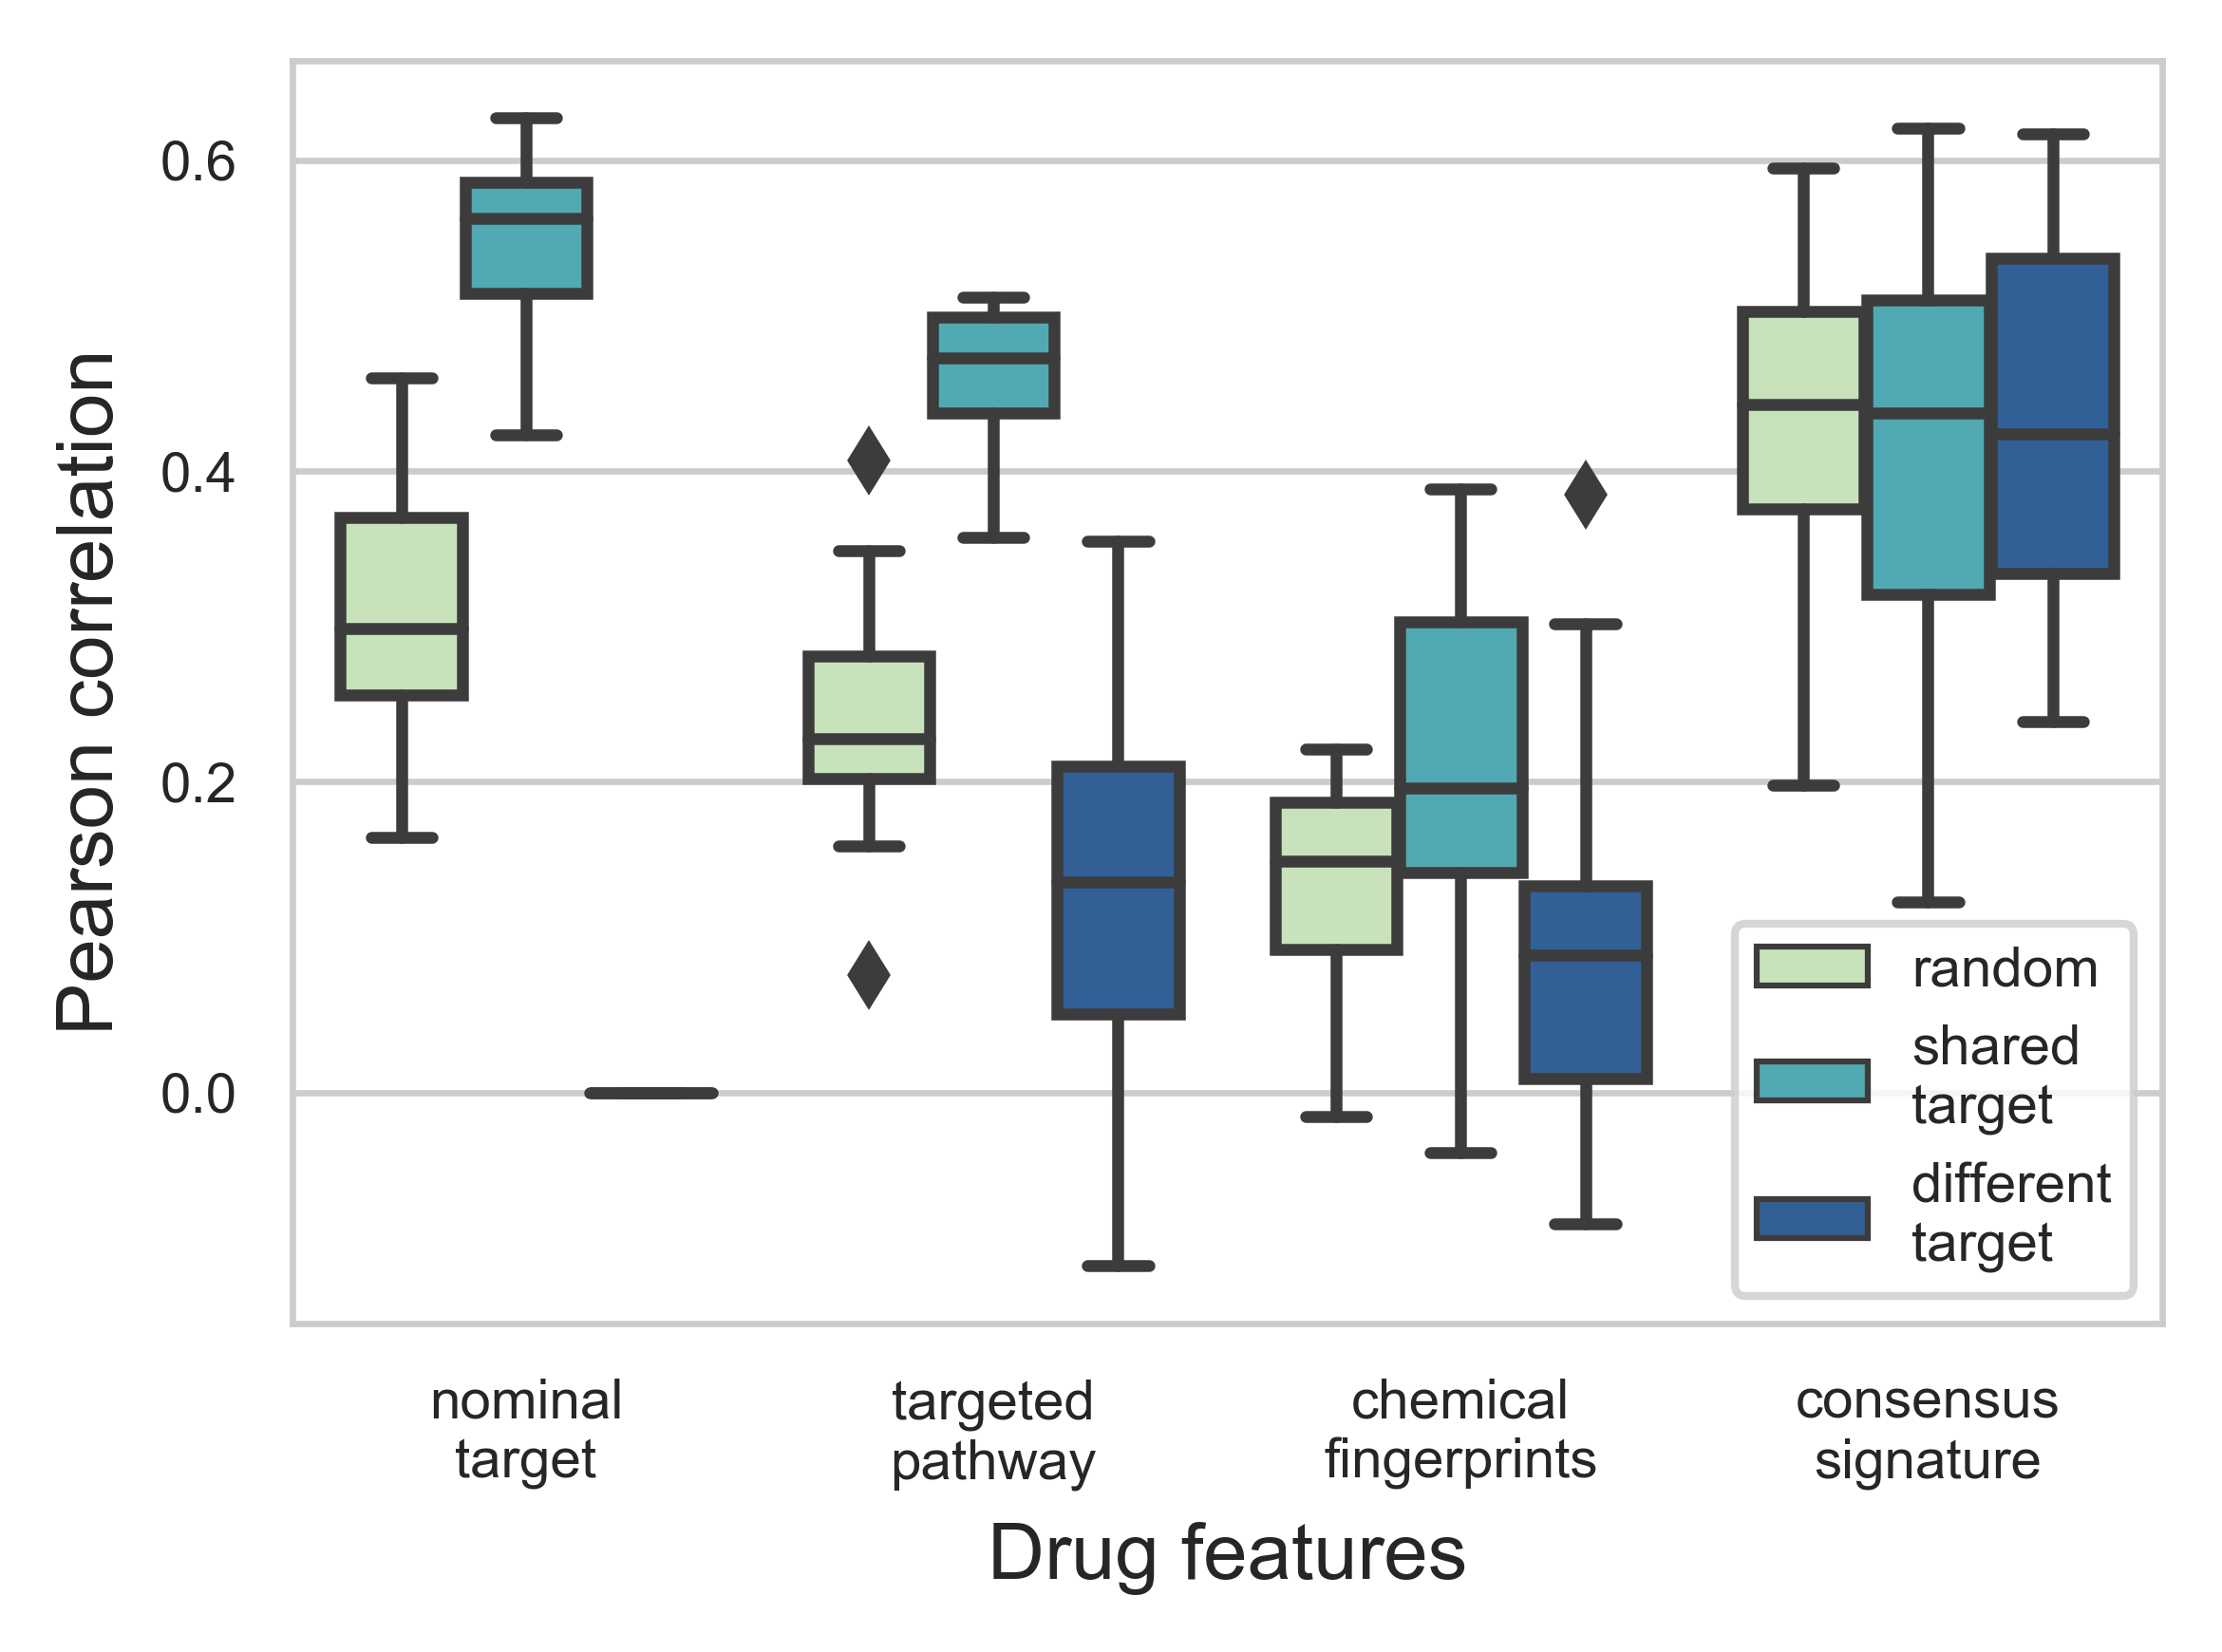

In [5]:
 make_ML_plot(dtype='ic50',outname='SFig7')